# Exploratory Data Analysis

# Índice 
1. [Introduction](#introduction)
2. [Import Materials](#importmaterials)    
    2.1. [Import Libraries](#importlibraries)     
    2.2. [Import the dataset](#importdataset)
3. [Data Exploration](#dataanalysis)    
    3.1. [Dataset Overview](#overview)   
    3.2. [Duplicates](#duplicates)     
    3.3. [Data Types](#datatypes)   
    3.4. [Strange Values](#strangevalues)    
    3.5. [Missing Values](#missingvalues)         
4. [Data Visualization](#datavisualizations)    
    4.1. [Feature Engineering](#features)      
    4.2. [Visualizations](#visuals)      

<hr>
<a class="anchor" id="introduction">
    
# 1. Introduction
    
</a>


This notebook analyzes customer data from ABCDEats Inc., a fictional food delivery service, over three months. The dataset will be explored in detail to better understand and make sense of its features. This exploration will include visualizations that form the basis for our further analysis and report on the overall data, including customer demographics, purchasing behaviors, and ordering patterns. <br><br>
**Project by** Dinis Pinto (20240612), Joana Rodrigues (20240603), João Marques (20240656), and Mara Simões (20240326) - **Group 27**.

<hr>
<a class="anchor" id="importmaterials">
    
# 2. Import Materials
    
</a>

<hr>
<a class="anchor" id="importlibraries">
    
## 2.1. Import Libraries
    
</a>

For this project, we'll install some helpful libraries to make analysis easier and add features like better plotting, data handling, and modeling tools. For example, `matplotlib` and `seaborn` allow us to create clear, customizable plots, while `pandas` and `numpy` make data processing smoother.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<hr>
<a class="anchor" id="importdataset">
    
## 2.2. Import Dataset
    
</a>

### Data in dataset
The different columns in the dataset give out the following information:   
- `customer_id` - Unique identifier for each customer.
- `customer_region` - Geographic region where the customer is located.
- `customer_age` - Age of the customer.
- `vendor_count` - Number of unique vendors the customer has ordered from.
- `product_count` - Total number of products the customer has ordered.
- `is_chain` - Indicates whether the customer’s order was from a chain restaurant.
- `first_order` - Number of days from the start of the dataset when the customer first placed an order.
- `last_order` - Number of days from the start of the dataset when the customer most recently placed an order.
- `last_promo` - The category of the promotion or discount most recently used by the customer.
- `payment_method` - Method most recently used by the customer to pay for their orders.
- `CUI_American`, `CUI_Asian`, `CUI_Chinese`, `CUI_Italian`... - The amount in monetary units spent by the customer from the indicated type of cuisine. 
- `DOW_0` to `DOW_6` - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- `HR_0` to `HR_23` - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).

In [2]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv',sep=',') # import the data

<hr>
<a class="anchor" id="datapreprocessing">
    
# 3. Data Exploration
</a>

<hr>
<a class="anchor" id="overview">
    
## 3.1. Dataset Overview
</a>
This subsection is meant to help visualize the data in the file to understand what the necessary steps will be in data cleaning and what visualizations can be done with it.

In [3]:
df.head() # To visualize the first lines of the dataset

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.tail(2) # to check if the last row is not the sum of all values in each column to avoid false outliers
# In this case there is no agreegation of values in the last column.

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30.0,1,1,0,NaN,0,-,CASH,...,0,0,1,0,0,0,0,0,0,0


In [5]:
df.shape

(31888, 56)

In [6]:
df.info() # Allows to verify the different types of data and the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

Describing the numerical variables gives us fundamental characteristics that can helps us through the analysis

In [7]:
df.describe().T # We invert the columns to be able to see all data

,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.506499,7.160898,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.102609,2.771587,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.668245,6.957287,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.818866,3.977529,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.478604,24.109086,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.675521,23.226123,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.960451,23.564351,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.300633,8.479734,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.801163,6.427132,0.0,0.0,0.0,0.00,326.10


In the next step, a description of the categorical variables is provided.

In [8]:
df.describe(include = ['O']).T

,count,unique,top,freq
customer_id,31888,31875,742ca068fc,2
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


The column `customer_id` only has values in 31'888 rows. However, only 31'875 of these are unique. This means there are customers appearing twice which can be caused by rows that are duplicated. We'll analyse this better in the next section to be able to jump into more fundamented conclusions. 

<hr>
<a class="anchor" id="duplicates">
    
## 3.2. Duplicates
</a>

Taking into account that there are customers appearing twice, we will go through the dataset to see if there are duplicated rows. 
As this dataset is very complex and with a lot of columns, if we find rows with exactly the same information, it is really likely that they are indeed duplicated and therefore should be erased.

In [9]:
df.duplicated().sum() # checks how many rows are duplicated rows

# For verification purposes we can use the following code, that shows the duplicates of 'customer_id' with all columns for better understanding
# df[df['customer_id'].duplicated(keep=False)].sort_values(by='customer_id')

13

We found 13 duplicates but as they are all repeated information and therefore don't add anything new to our analysis, we erase them.

In [10]:
df.drop_duplicates(inplace=True) # to drop duplicates

In [11]:
df.describe(include = ['O']).T

,count,unique,top,freq
customer_id,31875,31875,1b8f824d5e,1
customer_region,31875,9,8670,9761
last_promo,31875,4,-,16744
payment_method,31875,3,CARD,20153


As we drop the duplicates, the customer_id is left with only unique values.

<hr>
<a class="anchor" id="datatypes">
    
## 3.3. Data types
</a>

Accurate data types are essential, so we’ll adjust them accordingly: `customer_age` and `first_order` should be integers instead of floats. The metadata for `is_chain` suggests it’s binary, but it isn’t; we’ll investigate this discrepancy.

In [12]:
df.customer_age = df.customer_age.astype("Int64")
df.first_order = df.first_order.astype("Int64")

# Change customer_age and first order to Int64 (Int64 so they can handle missing values)
# We can use df.dtypes to confirm this change

### 3.3.1. Data Types - is_chain
The metadata of the column is_chain is implying that this is a binary column. However, it has values ranging from 0 to 83. We will analyse this in further detail to understand the reason behind this and what these number mean.

In [13]:
df['is_chain'].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80], dtype=int64)

To understand if there is any relation between this column and any other

In [14]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'Int64'])
correlation_matrix = numeric_df.corr()
is_chain_correlation = correlation_matrix[['is_chain']].drop(['is_chain'])
high_corr_vars = is_chain_correlation[is_chain_correlation['is_chain'].abs() > 0.7].round(2)
high_corr_vars_list = list(high_corr_vars['is_chain'].items())
print("Variables with correlation greater than 0.7 with 'is_chain':", high_corr_vars_list)

Variables with correlation greater than 0.7 with 'is_chain': [('vendor_count', 0.76), ('product_count', 0.83)]


To see the relation between is_chain and product_count

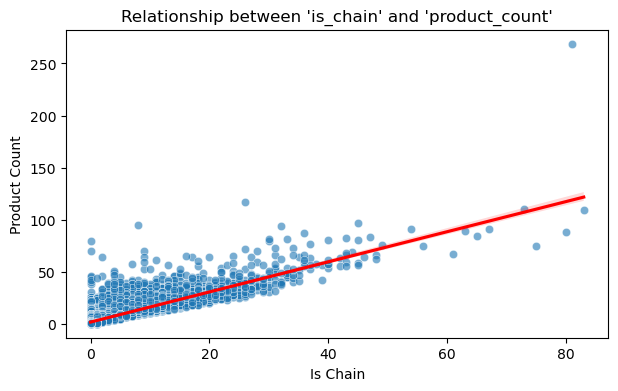

In [15]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x='is_chain', y='product_count', alpha=0.6)
sns.regplot(data=df, x='is_chain', y='product_count', scatter=False, color='red')  # Regression line
plt.title("Relationship between 'is_chain' and 'product_count'")
plt.xlabel("Is Chain")
plt.ylabel("Product Count")
plt.show()

In [16]:
if ((df['is_chain'] <= df['product_count']) | (df['product_count'] == 0)).all(): #df['product_count'] == 0 excludes errors (see 3.4.3.)
    print("is_chain is always smaller than product_count for all rows.")
else:
    print("Rows where is_chain is not always smaller than product_count and product_count is not 0:")
    display(df[(df['is_chain'] > df['product_count']) & (df['product_count'] != 0)])

is_chain is always smaller than product_count for all rows.


This way, we can conclude that the column is_chain is actually representing the total products that were ordered from a chain.
We choose not to turn this column into a binary since we think that the column as it is gives more relevant information.
We will assume `is_chain` - Indicates how many products order by the customer were chained.

<hr>
<a class="anchor" id="strangevalues">
    
## 3.4. Strange Values
</a>
Some columns in the descriptive analysis have shown to have values that can be considered as strange without any further analysis. This way, we will explore each of them more deeply to understand where they come from and whether they are indeed strange or can be intrepreted.

### 3.4.1. Strange Values - Region

In [17]:
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

The `-` character in the `customer_region` column likely represents unknown values, which causes it to be treated as categorical. While regions could be represented numerically, we'll keep this column as categorical for our analysis, as it aligns with specific geographic areas.

### 3.4.2. Strange Values - Promotion

In [18]:
df['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

The `-` in this column seem ambiguous initially, but it will be interpreted as indicating no promotion in future visualizations. This assumption is supported by the structure of the dataset, which shows that certain sorts of promotions are clearly represented by other values like DELIVERY, DISCOUNT, and FREEBIE.

### 3.4.3. Strange Values - product_count & vendor_count
As we saw in the previous descriptive statistics, the columns product_count & vendor_count have a minimum value of 0 orders, this is odd as this means that there were no products ordered by those customers. 

In [19]:
print(f"Number of rows where both product_count and vendor_count are 0: {df[(df['product_count'] == 0) & (df['vendor_count'] == 0)].shape[0]}")
print(f"Number of rows where vendor_count is 0: {df[df['vendor_count'] == 0].shape[0]}")
print(f"Number of rows where product_count is 0: {df[df['product_count'] == 0].shape[0]}")
# Print unique customer regions with zero product and vendor counts
unique_errors_region = df[(df['product_count'] == 0) & (df['vendor_count'] == 0)]['customer_region'].unique()
print('Errors were in region(s):', unique_errors_region)


df['DOW_all'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)
unique_values_array = df[(df['product_count'] == 0) & (df['vendor_count'] != 0)][['vendor_count', 'DOW_all', 'customer_region']].drop_duplicates().values

print('When the product_count is 0 and the vendor_count is not zero, the column DOW_all and vendor_count have values of', unique_values_array)
# df[(df['product_count'] == 0) & (df['vendor_count'] != 0)][['vendor_count', 'product_count', 'DOW_all']] # to visualize this better

Number of rows where both product_count and vendor_count are 0: 138
Number of rows where vendor_count is 0: 138
Number of rows where product_count is 0: 156
Errors were in region(s): ['8670']
When the product_count is 0 and the vendor_count is not zero, the column DOW_all and vendor_count have values of [[1 1 '4660']]


We can see that there are 138 orders that didn't have any product order nor vendor. These are most likely an error in the region 8670 since they imply that customers placed no orders.    
We can also see that there are rows where product_count is 0 and vendor_count is not. When looking through DOW_all with 1 order for each of these rows, we can conclude that, for these rows, the procut_count is of at least 1. 

<hr>
<a class="anchor" id="missingvalues">
    
## 3.5. Missing Values
</a>

As we previously saw, not all columns have 31'888 rows non-null, which means some of them have missing values. 
In the next steps, we can see with more details which of them have missing values and its amount.

In [20]:
missing_values = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing_values.columns = ['Total', 'Percentage']
missing_values.sort_values(by=['Total', 'Percentage'], ascending=False, inplace=True)
missing_values.T
#df.isna().sum() # To see how many missing values are in each column

,HR_0,customer_age,first_order,customer_id,customer_region,vendor_count,product_count,is_chain,last_order,last_promo,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_all
Total,1164.000000,727.000000,106.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,3.651765,2.280784,0.332549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.5.1. Missing values - HR_0

In [21]:
df['HR_0'].unique()

array([ 0., nan])

We observe that the values in the specified column are either zero or missing, suggesting missing values might represent zeros or an assignment error.
Since the columns are in the same unit, we can sum the totals of the DOW_s columns and compare them with the hours columns. We expect these totals to match. If they don't, we'll need to explore whether discrepancies relate to missing values in `HR_0`.


In [22]:
# Setting 2 new lists that amount the orders in the week and in the hours
# df['DOW_all'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1) defined above
df['HR_all'] = df.loc[:, 'HR_0':'HR_23'].sum(axis=1)

# Counting how many times DOW_all does not equal HR_all
(df['DOW_all'] != df['HR_all']).sum()

1164

We can see that there are as many rows where the sum of all days of the week is different from the sum of all hours as there are missing values in HR_0. Therefore we will see if they are the rows or if this number is just a coincidence.

In [23]:
# To check if DOW_all is not equal to HR_all
df['diff_check'] = df['DOW_all'] != df['HR_all']

# To check if all rows with differences have HR_0 missing
outcome = (df['diff_check'] == df['HR_0'].isna()).all()

if outcome == True:
    print('The rows where there are differences in the total using hours and using days of the week are the same as the rows where there are missing values in HR_0')
else:
    print('No conclusion to be made' )

The rows where there are differences in the total using hours and using days of the week are the same as the rows where there are missing values in HR_0


As the rows are exactly the same, we can conclude that the lack of values in HR_0 was an error and that its real value actually corresponds to the difference between the two summed columns. 
This way, we will substitute the missing values in HR_0 with the difference between the totals to guarantee more realistic visualizations.

In [24]:
df['HR_0'] = df['HR_0'].fillna(df['DOW_all'] - df['HR_all']) # Replace missing values in HR_0 with the calculated difference

df['HR_0'].isna().sum() # To confirm if the missing values were substituted

0

### 3.5.2. Missing values - first_order

There are 106 missing values in the column 'first_order'. To understand better this column, we will see if, when this value is NaN, there is any pattern in other variables. 
For example if any of them has the value 0.

In [25]:
df_filtered = df[df['first_order'].isna()]
statistics = df_filtered.describe().T

zero_range_columns = statistics[statistics['max'] == 0]
print("Columns where max is equal to 0:", zero_range_columns.index.tolist())

Columns where max is equal to 0: ['last_order', 'CUI_Cafe', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'HR_22', 'HR_23']


In [26]:
# df[df['first_order'].isna()]['last_order'].unique() was used to experiment if there are patterns between the missing values of 'first_order' and other columns
# Checking if this corresponds exactly to 'last_order' being 0
outcome = ((df['first_order'].isna()) == (df['last_order'] == 0)).all()

if outcome:
    print("The rows where 'first_order' is NaN correspond exactly to the rows where 'last_order' is 0.")
else:
    print("There is no exact correspondence between rows where 'first_order' is NaN and where 'last_order' is 0.")

The rows where 'first_order' is NaN correspond exactly to the rows where 'last_order' is 0.


To check if the orders where 'first_order' is NaN were always in the same day of the week

In [27]:
df_filtered = df[df['first_order'].isna()] 
statistics = df_filtered.describe().T 

non_zero_min = statistics[ statistics['min'] != 0]
print("Columns where the minimum is not zero:", non_zero_min.index.tolist())

Columns where the minimum is not zero: ['customer_age', 'vendor_count', 'product_count', 'first_order', 'DOW_6', 'DOW_all']


In [28]:
non_cafe_orders = df[(df['first_order'] == 0) & (df['CUI_Cafe'] != 0)]

order_count = non_cafe_orders.shape[0]

print(f"The number of orders where 'first_order' is 0 and 'CUI_Cafe' is not 0 is: {order_count}")

The number of orders where 'first_order' is 0 and 'CUI_Cafe' is not 0 is: 130


When `last_order` is 0, it means that the first and only time the customer ordered was on the day the company started its activity. From this, we conclude:
1. All rows with a missing value in the `first_order` column correspond exactly to rows where `last_order` is 0. This indicates that these customers' first and last order was on the first day of activity. Therefore, all missing values in `first_order` actually correspond to 0.
2. The fact that no customers ordered from `CUI_Cafe` when firday and last day is 0 raises a question: was the marketing for CUI_Cafe ineffective, leading to no customer interest on that day? This is not the case, as there were indeed `CUI_Cafe` orders on that day (130).
3. Analysis of the days of the week (DOW_0 to DOW_5) reveals no registered orders when `first_order` is NaN. This suggests that the company’s activity began on a Saturday, which we verified with a minimum value different than 0 in DOW_6.
4. No orders were placed during HR_22 and HR_23 from customers that ordered on the first day and didn't come back.

### 3.5.3. Missing values - customer_age


In [29]:
# # Filter the DataFrame for rows where 'first_order' is NaN
# df_filtered = df[df['customer_age'].isna()]
# # To see if there is any odd pattern
# df_filtered.describe().T

We could not identify a pattern in the missing age values, suggesting they are missing completely at random, in contrast to the previous ones.

<hr>
<a class="anchor" id="datavisualizations">
    
# 4. Data Visualization
    
</a>

<a class="anchor" id="features">
    
## 4.1. Feature engineering
    
</a>

### Variables Creation
Throught the project some features were created to help with the analysis.   
Previously, we created some features such as df['DOW_all'] and df['HR_all'] that we will call in the next cell to update them

- Number of the days as a customer

In [30]:
df['days_as_customer'] = df['last_order'] - df['first_order']

- Total Orders by Day of the Week

In [31]:
weekly_orders = df.loc[:, 'DOW_0':'DOW_6'].sum(axis=0)

- Total (Weekly) Orders per Customer

In [32]:
df['DOW_all'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)

- Total Orders by Hour of the Day

In [33]:
hourly_orders = df.loc[:, 'HR_0':'HR_23'].sum(axis =0) # Total of orders per hours

- Total (Daily) Orders per Customer

In [34]:
df['HR_all'] = df.loc[:, 'HR_0':'HR_23'].sum(axis=1)

- Aggregation of Orders by Time of Day

In [35]:
df['hours_night'] = df[['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5']].sum(axis=1)
df['hours_breakfast'] = df[['HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10']].sum(axis=1)
df['hours_lunch'] = df[['HR_11', 'HR_12', 'HR_13', 'HR_14']].sum(axis=1)
df['hours_afternoon'] = df[['HR_15', 'HR_16', 'HR_17', 'HR_18']].sum(axis=1)
df['hours_dinner'] = df[['HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']].sum(axis=1) 
hours_aggregated = ['hours_night', 'hours_breakfast', 'hours_lunch', 'hours_afternoon', 'hours_dinner']

time_of_day_replacement = {
    'hours_night': 'Night',
    'hours_breakfast': 'Breakfast',
    'hours_lunch': 'Lunch',
    'hours_afternoon': 'Afternoon',
    'hours_dinner': 'Dinner'
}

- Total Expenditure by Cuisine Type

In [36]:
type_orders = df.loc[:, 'CUI_American':'CUI_Thai'].sum(axis=0) 

- Total Expenditure on All Cuisines

In [37]:
df['cuisine_all'] = df.loc[:, 'CUI_American':'CUI_Thai'].sum(axis=1)

- Total Expenditure by Cuisine Grouping

In [38]:
# Summing up various cuisine categories according to what we think can be aggregated
df['asian_cuisines'] = df[["CUI_Asian", "CUI_Chinese", "CUI_Indian", "CUI_Japanese", "CUI_Noodle Dishes", "CUI_Thai"]].sum(axis=1)
df['american_cuisines'] = df[["CUI_American", "CUI_Chicken Dishes", "CUI_Street Food / Snacks"]].sum(axis=1)
df['cafe_desserts'] = df[["CUI_Desserts", "CUI_Cafe"]].sum(axis=1)

# List of aggregated cuisines
cuisines_aggregated = ['asian_cuisines', 'american_cuisines', 'CUI_Italian', 'cafe_desserts', 'CUI_Healthy', 'CUI_Beverages', 'CUI_OTHER']

# Replacement mapping for cuisine names
cuisine_replacement = {
    'asian_cuisines': 'Asian Cuisines',
    'american_cuisines': 'American Cuisines',
    'CUI_Italian': 'Italian',
    'CUI_Beverages': 'Beverages',
    'CUI_Healthy': 'Healthy',
    'CUI_Street Food / Snacks': 'Street Food / Snacks',
    'cafe_desserts': 'Cafe Desserts',
    'CUI_OTHER': 'Other'}


- Repeat customers

In [39]:
df['repeat_customers'] = (df['last_order'] - df['first_order']) > 0  

<a class="anchor" id="visuals">
    
## 4.2. Visualizations
    
</a>

### 4.2.1. Univariate - Numeric Variables

To better understand the distribution of each variable, we do an univariate analysis for each of the numeric variable.   

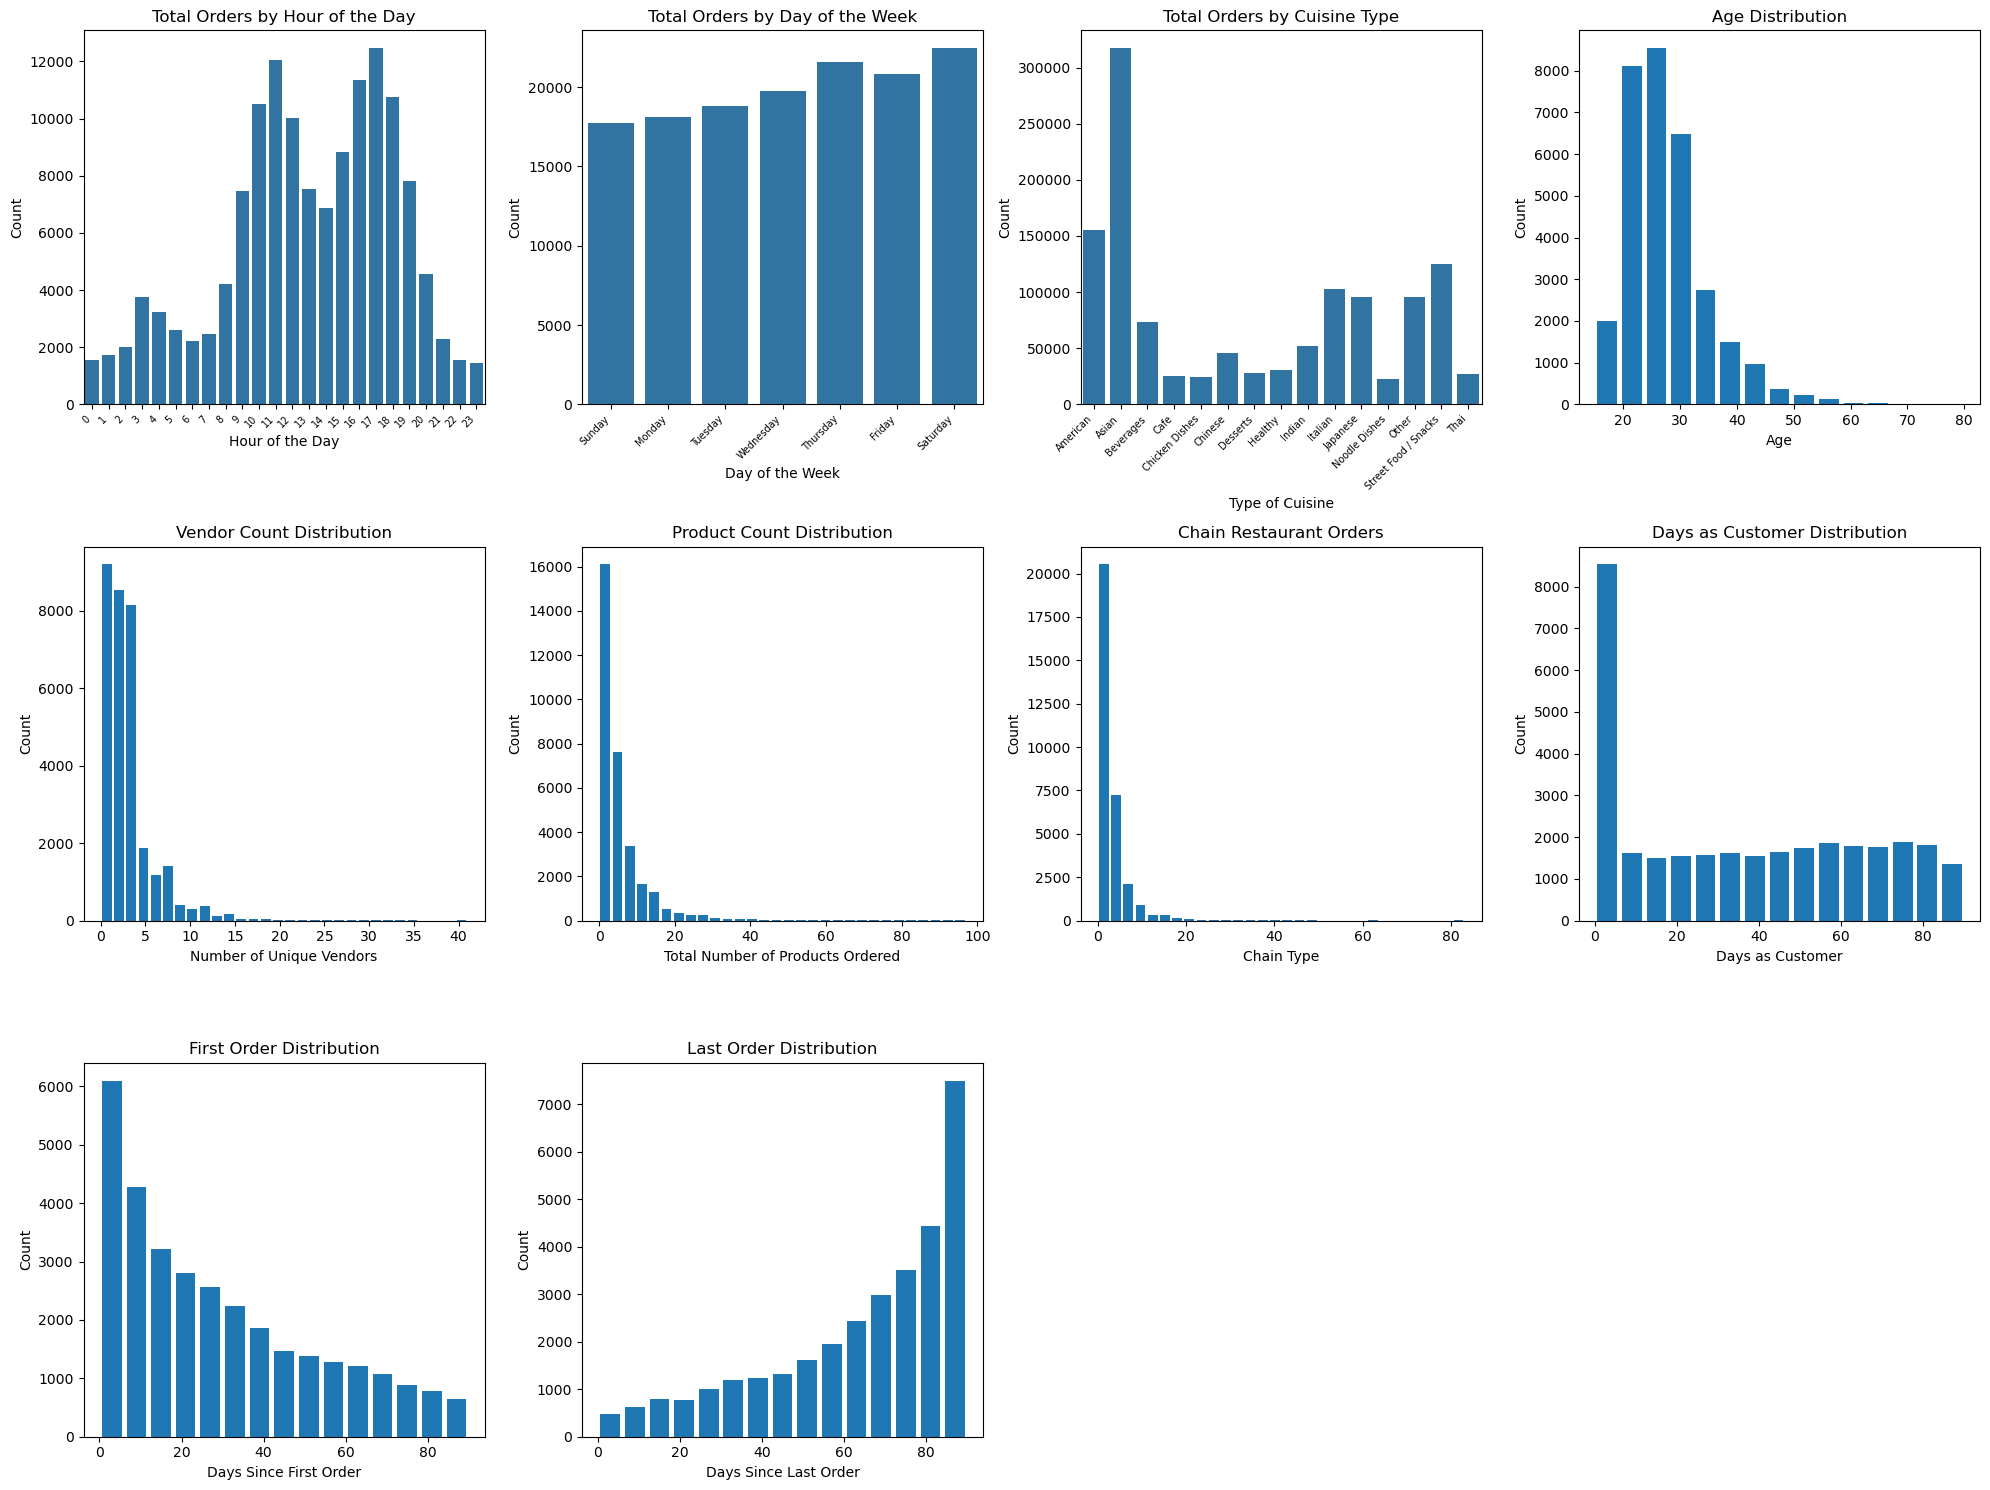

In [40]:
plots = [
    (hourly_orders.values, 'Total Orders by Hour of the Day', 'Hour of the Day', 'Count', 'barplot', hourly_orders.index),
    (weekly_orders.values, 'Total Orders by Day of the Week', 'Day of the Week', 'Count', 'barplot', ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']),
    (type_orders.values, 'Total Orders by Cuisine Type', 'Type of Cuisine', 'Count', 'barplot', [cuisine_replacement.get(name, name.replace('CUI_', '')) for name in type_orders.index]),
    (df['customer_age'], 'Age Distribution', 'Age', 'Count', 'hist', None),
    (df['vendor_count'], 'Vendor Count Distribution', 'Number of Unique Vendors', 'Count', 'hist', None),
    (df['product_count'], 'Product Count Distribution', 'Total Number of Products Ordered', 'Count', 'hist', None),
    (df['is_chain'], 'Chain Restaurant Orders', 'Chain Type', 'Count', 'hist', None),
    (df['days_as_customer'], 'Days as Customer Distribution', 'Days as Customer', 'Count', 'hist', None),
    (df['first_order'].dropna(), 'First Order Distribution', 'Days Since First Order', 'Count', 'hist', None),
    (df['last_order'], 'Last Order Distribution', 'Days Since Last Order', 'Count', 'hist', None)
]

filtered_plots = [plot for plot in plots if plot[0].size > 0]  

num_plots = len(filtered_plots)
subplot_rows = (num_plots + 3) // 4  
subplot_cols = min(num_plots, 4)  

fig, axes = plt.subplots(nrows=subplot_rows, ncols=subplot_cols, figsize=(20, 5 * subplot_rows))
axes = axes.flatten() if num_plots > 1 else [axes]  

for i, (data, title, x_label, y_label, kind, x_ticks) in enumerate(filtered_plots):
    ax = axes[i]
    if kind == 'barplot':
        sns.barplot(x=x_ticks, y=data, ax=ax)

        if title == 'Total Orders by Hour of the Day':
            formatted_ticks = [int(hour.replace('HR_', '')) for hour in x_ticks]  
            ax.set_xticks(range(len(data)))
            ax.set_xticklabels(formatted_ticks, rotation=45, ha="right", size=7)
        else:
            ax.set_xticks(range(len(data)))
            ax.set_xticklabels(x_ticks, rotation=45, ha="right", size=7)
    elif kind == 'hist':
        if title == 'Product Count Distribution':  
            filtered_data = data[data <= 100]
            ax.hist(filtered_data, bins=30, rwidth=0.8) 
        elif title == 'Vendor Count Distribution': 
            ax.hist(data, bins=30, rwidth=0.8) 
        elif title == 'Chain Restaurant Orders': 
            ax.hist(data, bins=30, rwidth=0.8) 
        else:
            ax.hist(data, bins=15, rwidth=0.8)
    else:
        ax.bar(x_ticks, data.values)  
        ax.set_xticks(range(len(data)))

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### 4.2.1.1 Anomalies
The previous descriptive table shows that, for example, HR_8 has a high maximum comparing to the mean, that can possibly be an outlier therefore we can see the different distributions of the data by boxplots to see the different outliers at each hour.

#### Outliers in the orders per Hours
Boxplots are graphs that intend to show the outliers of the variables. This way, to explore the anomalies in each hour we can do subplots of each of them.
In the following subplots we can see that there are outliers in many of them. The more visible ones are 'HR_8', 'HR_16' and 'HR_19'. These don't represent the distribution at all and therefore in most cases they are taken out of the analysis. Sometimes they are errors and in these cases they should definetly be taken out of the analysis. 

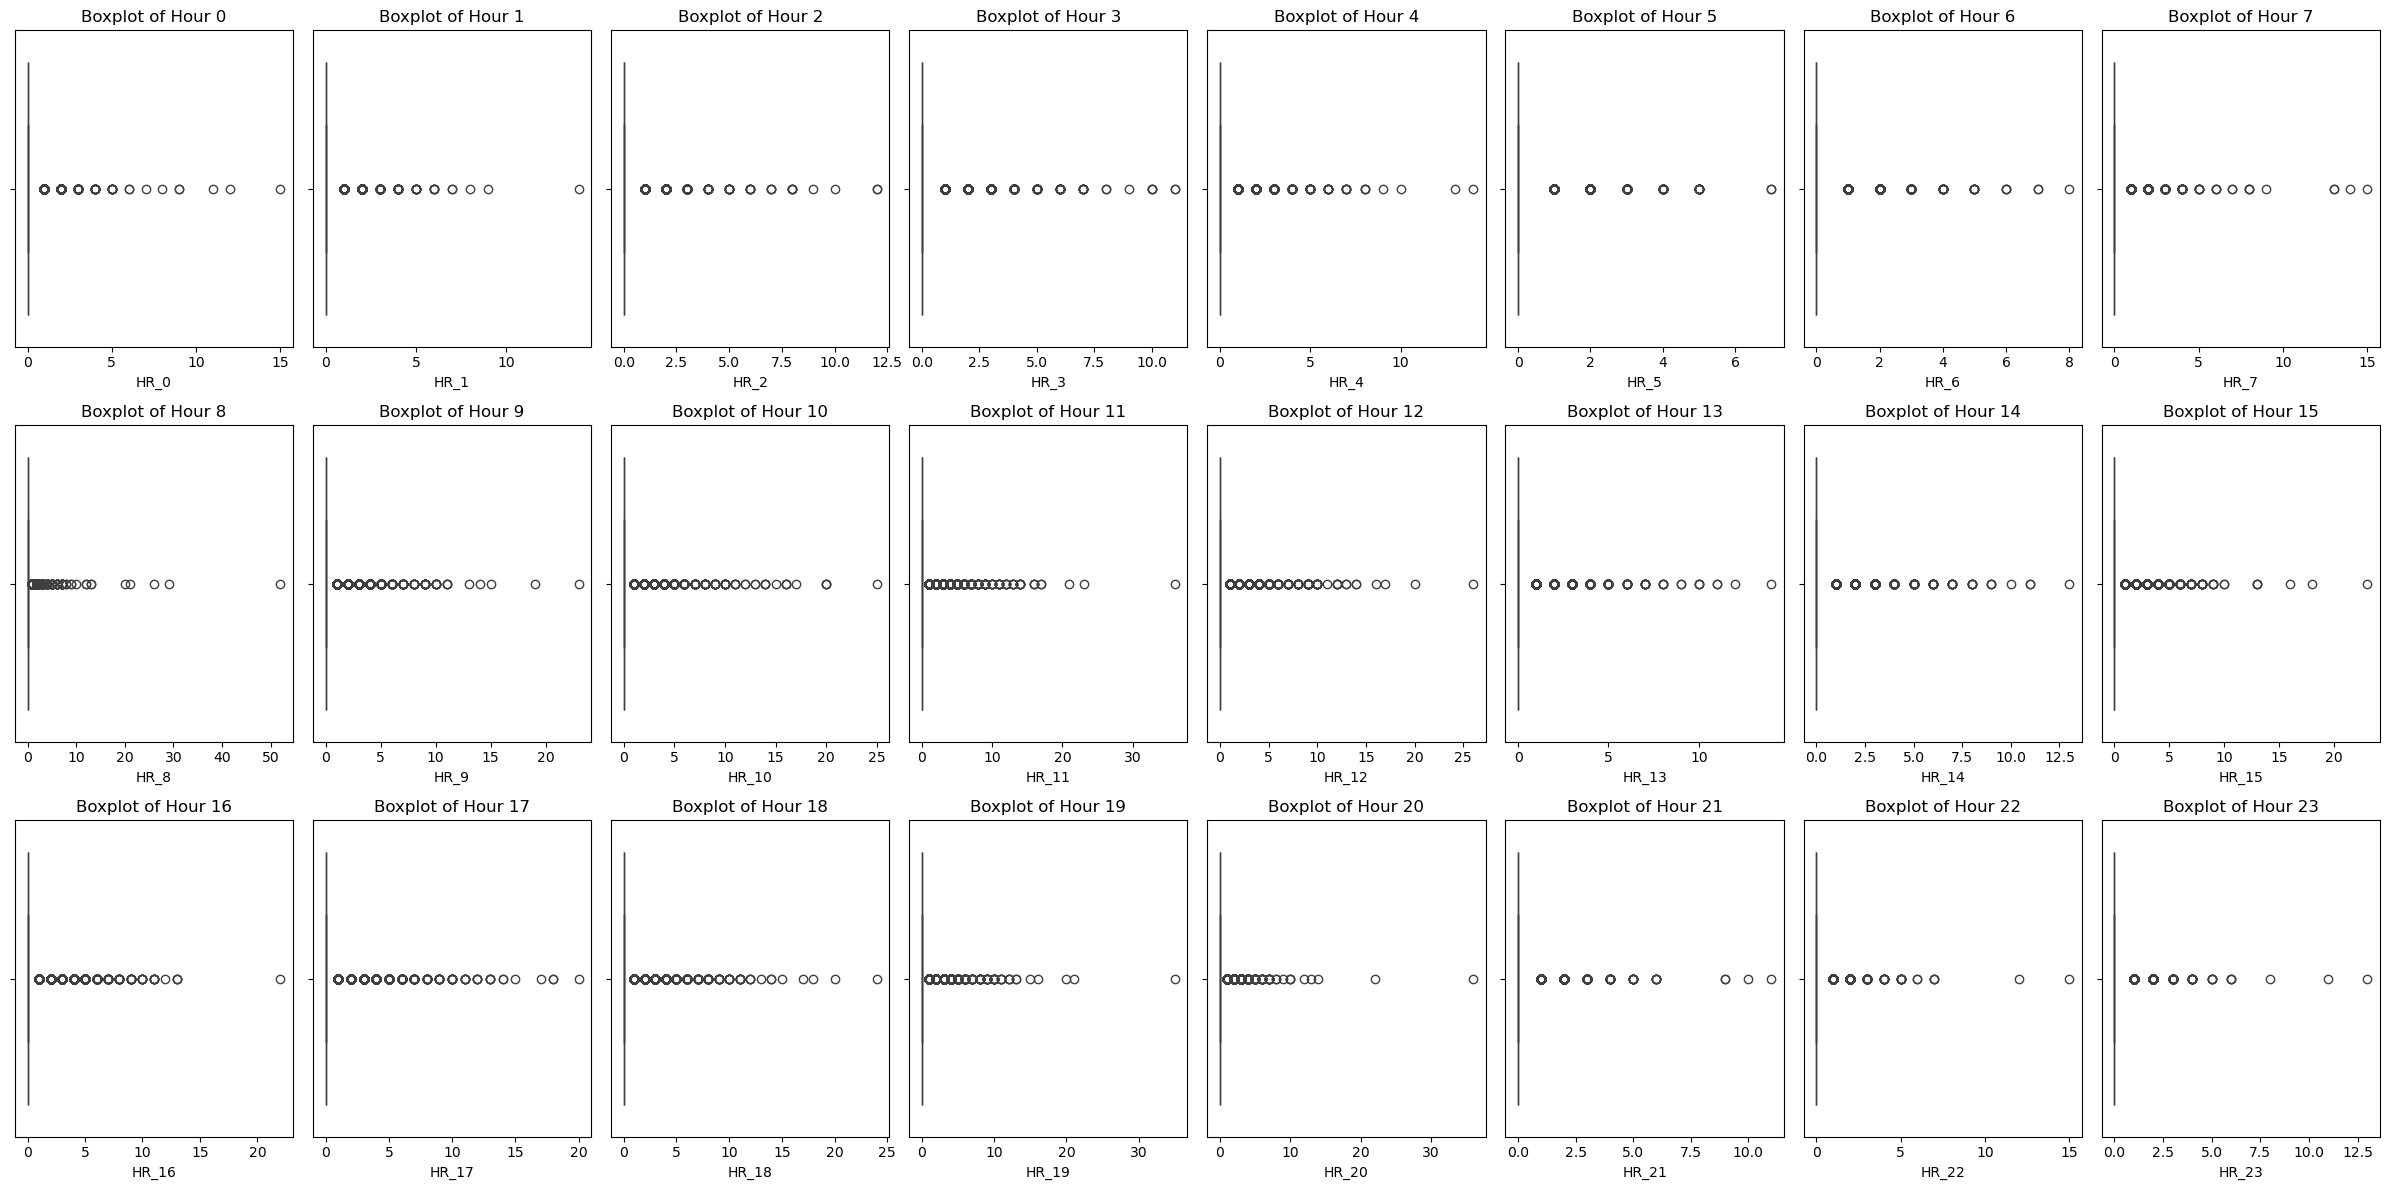

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=8, figsize=(24, 12)) 
for i, (col, value) in enumerate(hourly_orders.items()): 
    row = i // 8 
    col_idx = i % 8  
    
    sns.boxplot(data=df, x=col, ax=axes[row, col_idx]) 
    
    hour_number = int(col.replace('HR_', ''))
    axes[row, col_idx].set_title(f'Boxplot of Hour {hour_number}')

plt.tight_layout() 
plt.show()


#### Outliers in the orders per type of cusine
In this case there are some outliers in cusine types as well, for example in CUI_Asian, CUI_Chicken Dishes, CUI_Chinese and CUI_Japanese

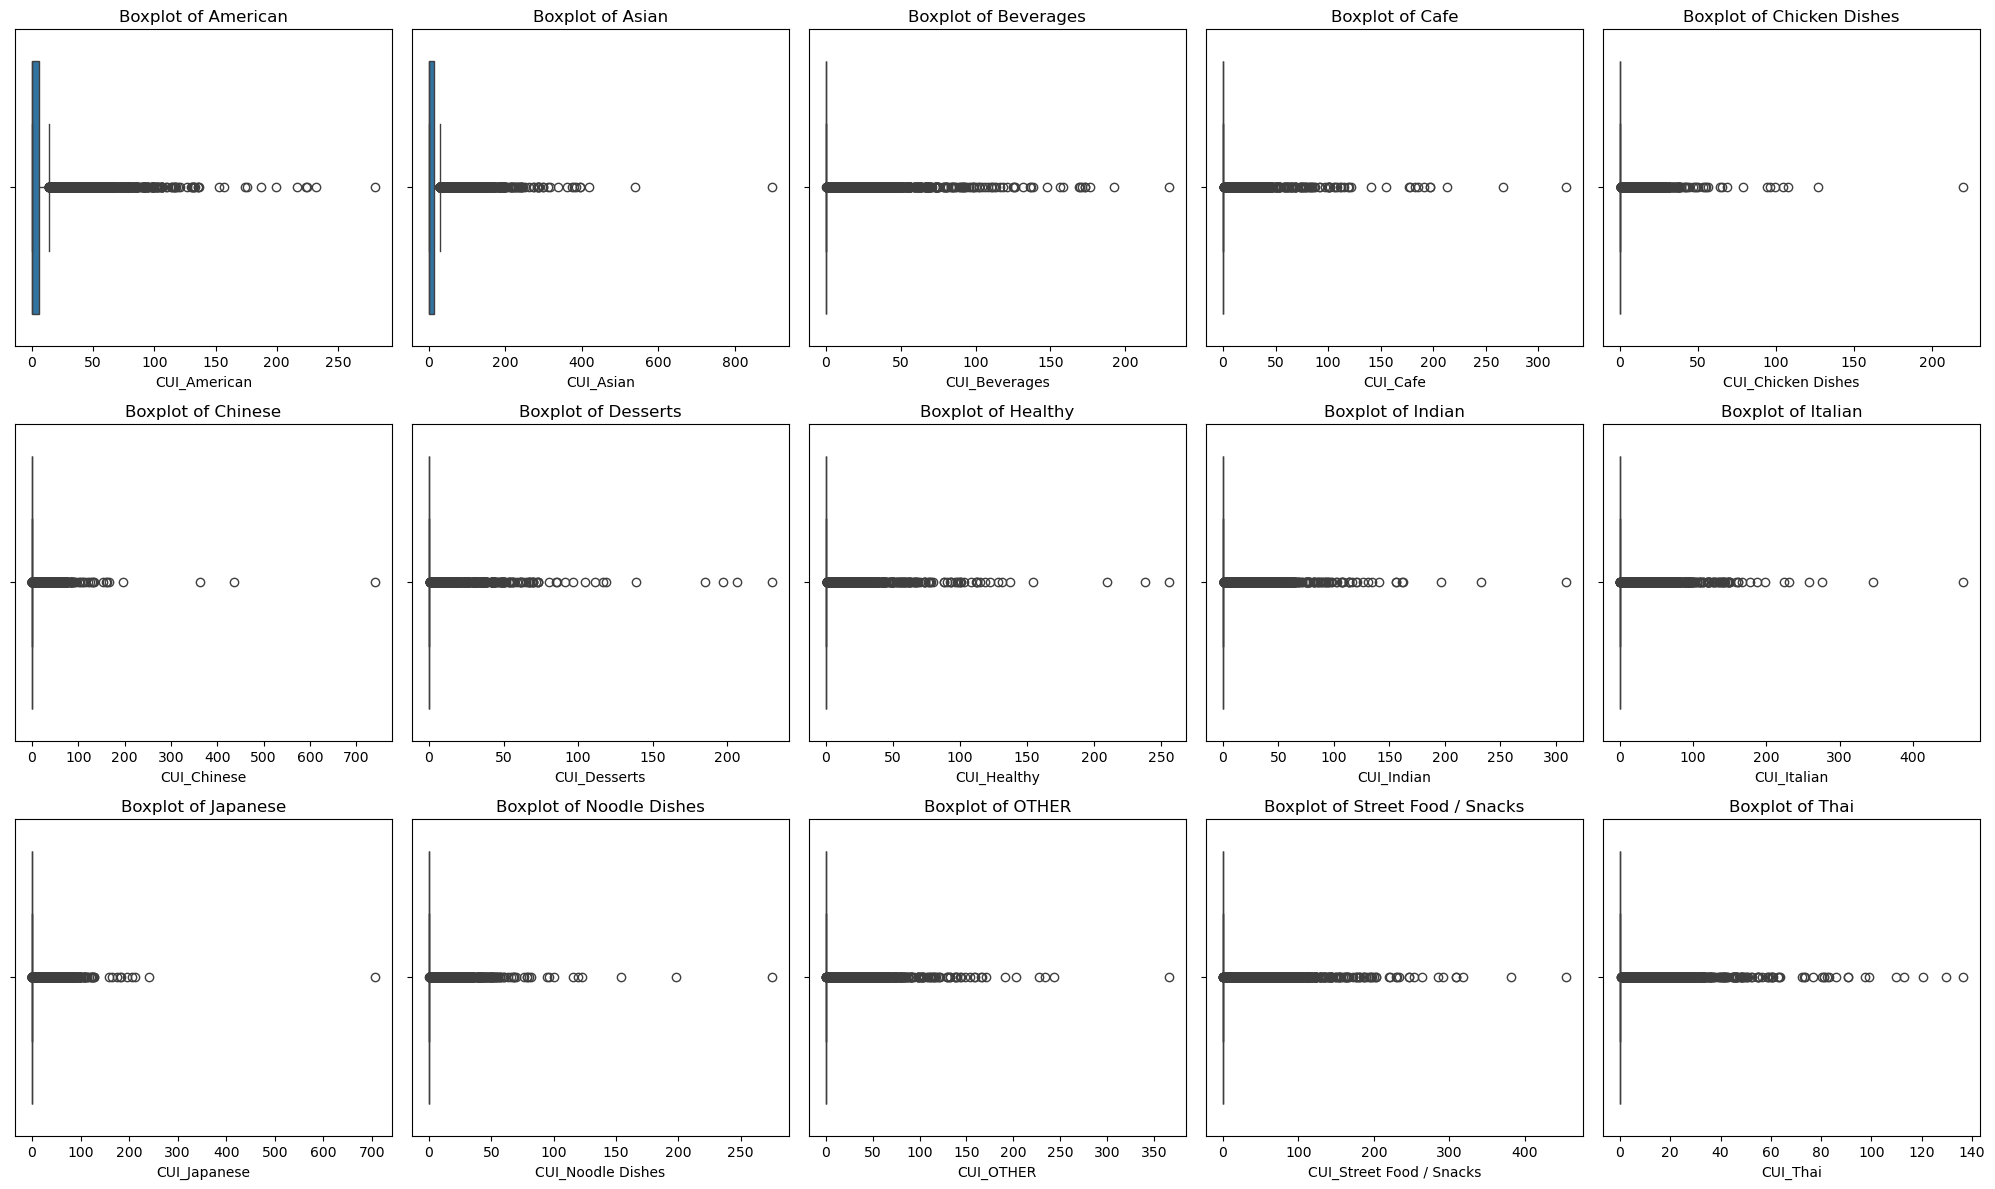

In [42]:
type_cusine = df.loc[:, 'CUI_American':'CUI_Thai']
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12)) 
for i, col in enumerate(type_cusine.columns):  
    row = i // 5 
    col_idx = i % 5  
    
    sns.boxplot(data=df, x=col, ax=axes[row, col_idx]) 
    
    cuisine_name = col.replace('CUI_', '')
    axes[row, col_idx].set_title(f'Boxplot of {cuisine_name}')
    
plt.tight_layout()
plt.show()


#### Outliers in the orders per days of the week

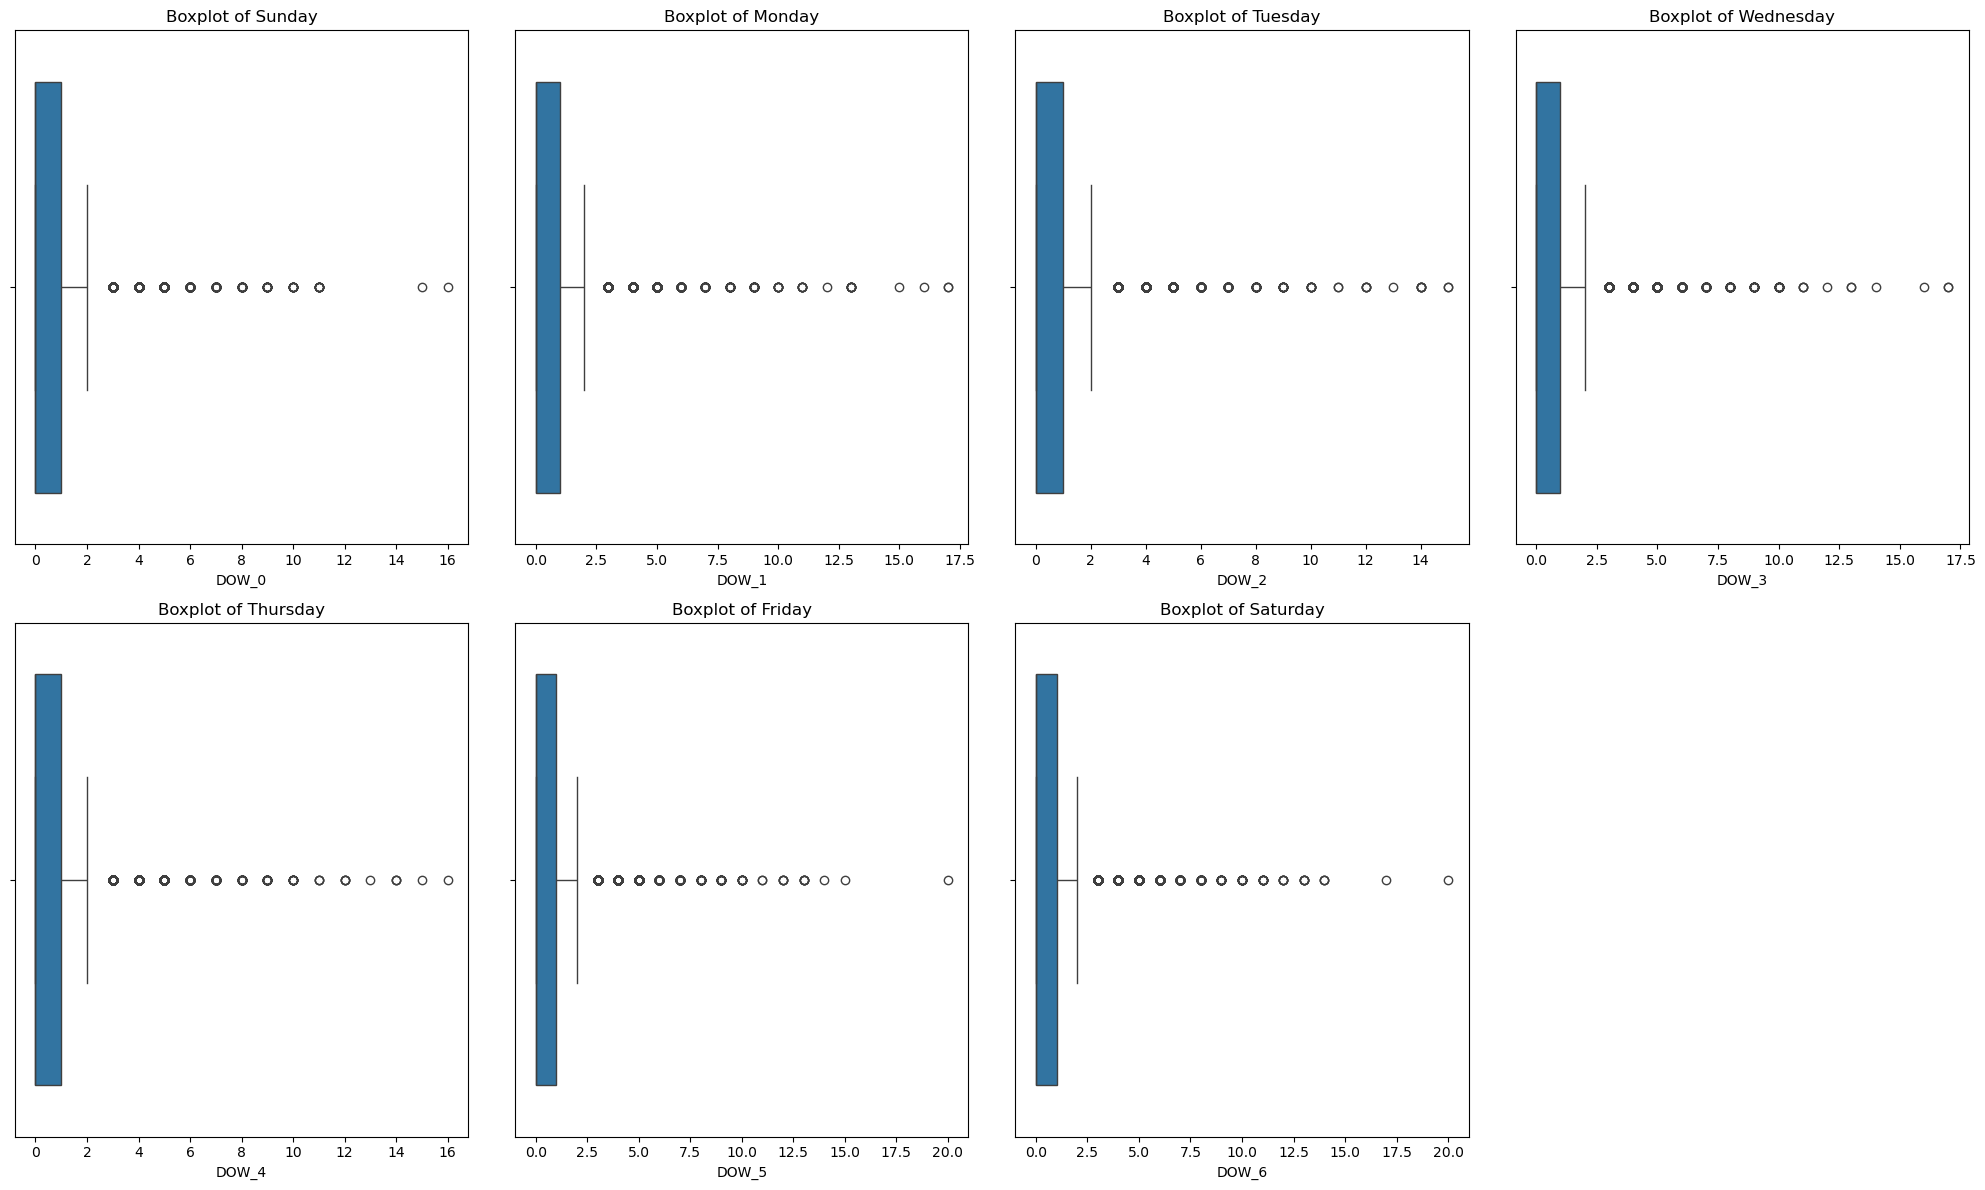

In [43]:
day_mapping = {'DOW_0': 'Sunday', 'DOW_1': 'Monday', 'DOW_2': 'Tuesday', 'DOW_3': 'Wednesday', 'DOW_4': 'Thursday', 'DOW_5': 'Friday',
    'DOW_6': 'Saturday'}
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))  

for i, (day, ax) in enumerate(zip(day_mapping.keys(), axes.flatten())):
    sns.boxplot(data=df, x=day, ax=ax)
    ax.set_title(f'Boxplot of {day_mapping[day]}')

plt.tight_layout()

if len(day_mapping) < 8:
    axes[1, 3].set_visible(False) 

plt.show()


#### Outliers in the rest of the numerical variables
Analyzing the outliers in the remaining numerical variables is important, as extreme values can distort the overall distribution and summary statistics. Identifying these outliers allows us to focus on typical customer behavior, leading to more accurate interpretations of the data.

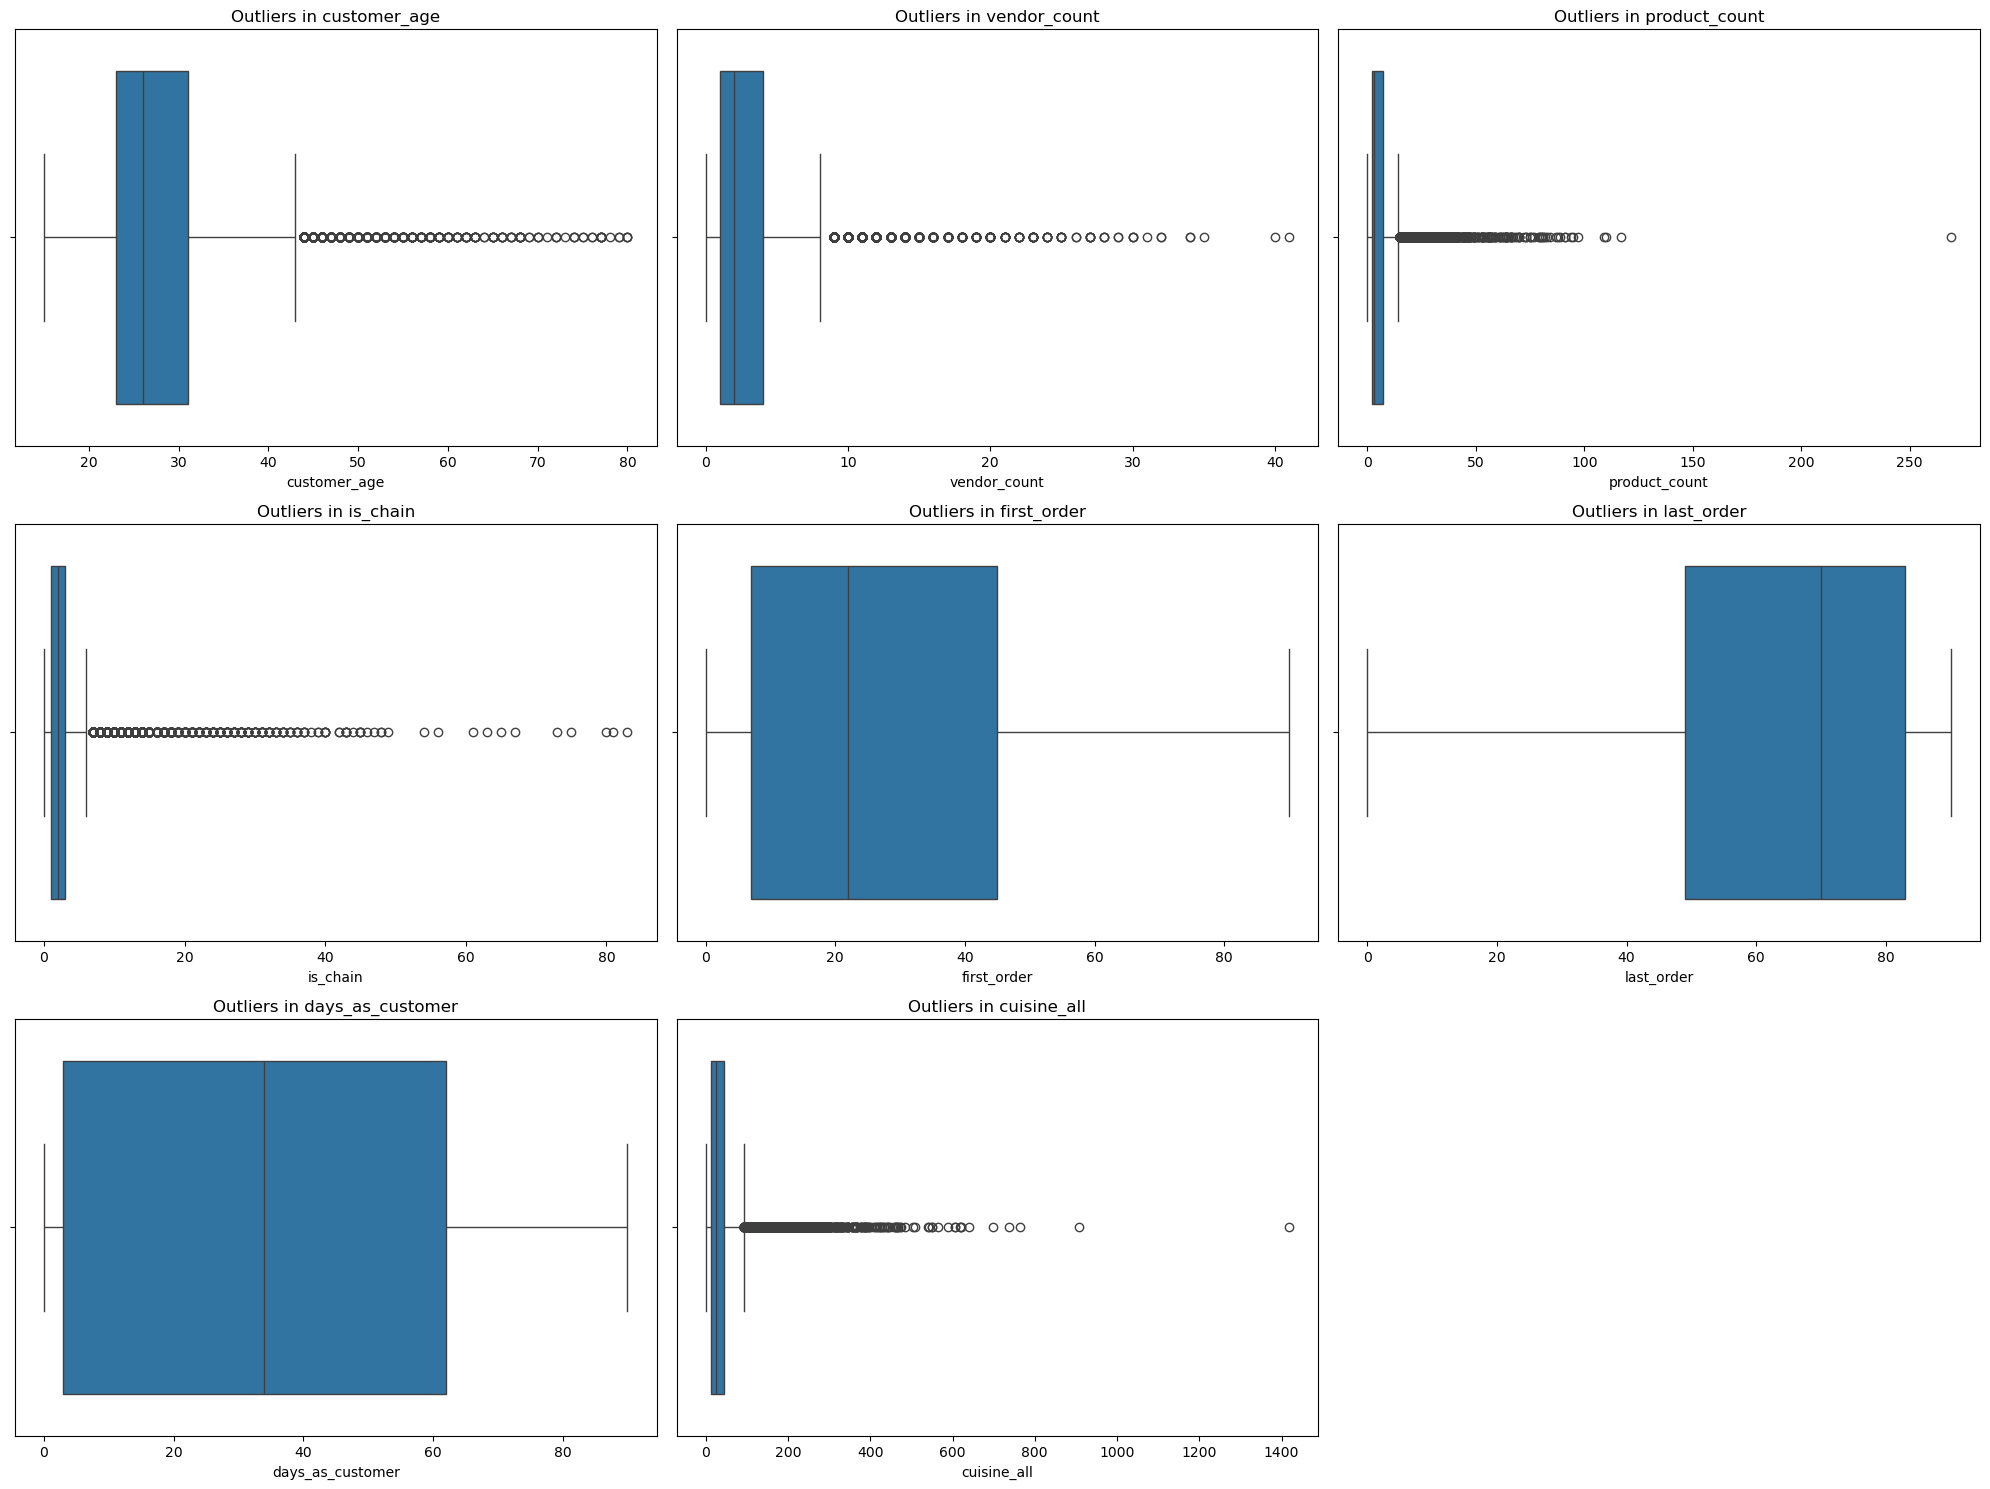

In [44]:
numeric_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
                   if not (col.startswith('CUI') or col.startswith('DOW') or col.startswith('HR_') or col.startswith('hours_') or col.startswith('asian') or col.startswith('american') or col.startswith('cafe'))]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for ax, col in zip(axes.flatten(), numeric_columns):
    sns.boxplot(data=df, x=col, ax=ax) 
    ax.set_title(f'Outliers in {col}')
    ax.set_xlabel(col)

for ax in axes.flatten()[len(numeric_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

##### Atypical Row
As we can see from the boxplot, both cuisine_total and product_count appear to have outlier values that are significantly distant from the others. This suggests that they might originate from the same row, indicating that this row is atypical and could represent an extreme case in the dataset.

In [45]:
max_index_cuisine = df['cuisine_all'].idxmax() # index of the maximum value in cuisine_total
max_index_product = df['product_count'].idxmax() # index of the maximum value in product_count
same_row = max_index_cuisine == max_index_product # check if the indices are the same
print(f"Are both maximum values in the same row? {'Yes' if same_row else 'No'}")

Are both maximum values in the same row? Yes


### 4.2.2 Univariate - Categorical Variables

To better analyse the categorical variables of the dataset we can use bar charts or frequency tables since they help understand the distribution of the categories.
There are only four columns considered as object (non numeric columns) and two of them are not relevant for analysis we can proceed with a more concrete analysis by using a frequency table and by using a histogram.

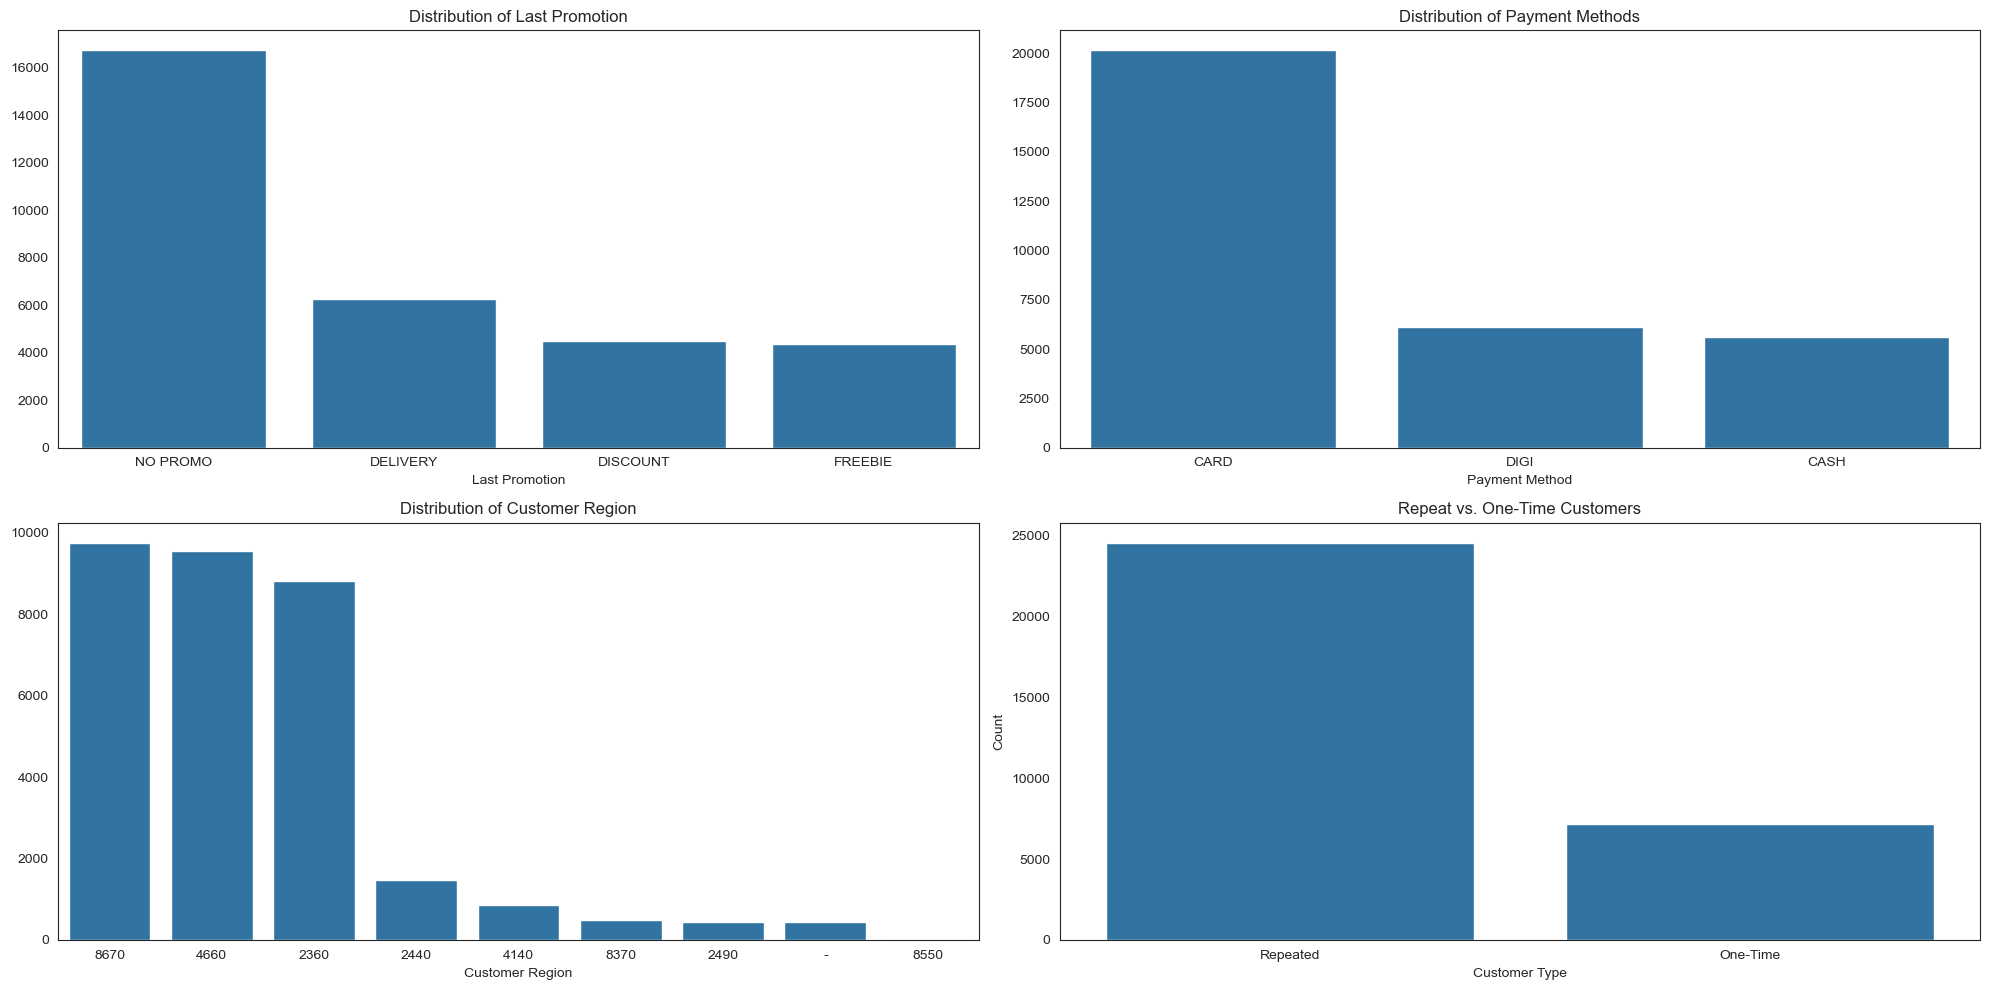

In [46]:
sns.set_style('white')

subplot_rows = 2
subplot_cols = 2  
subplot_figsize = (20, 10)  
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=subplot_figsize)

last_promo_data = df['last_promo'].replace('-', 'NO PROMO').value_counts().sort_values(ascending=False)
sns.barplot(x=last_promo_data.index, y=last_promo_data.values, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Last Promotion')
axes[0, 0].set_xlabel('Last Promotion')

payment_method_data = df['payment_method'].value_counts().sort_values(ascending=False)
sns.barplot(x=payment_method_data.index, y=payment_method_data.values, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Payment Methods')
axes[0, 1].set_xlabel('Payment Method')

customer_region_data = df['customer_region'].astype(str).value_counts().sort_values(ascending=False)
sns.barplot(x=customer_region_data.index, y=customer_region_data.values, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Customer Region')
axes[1, 0].set_xlabel('Customer Region')

repeat_customers_data = df['repeat_customers'].value_counts().sort_values(ascending=False)
repeat_customers_data.index = repeat_customers_data.index.map({True: 'Repeated', False: 'One-Time'})  # Map True/False to custom labels
sns.barplot(x=repeat_customers_data.index, y=repeat_customers_data.values, ax=axes[1, 1])
axes[1, 1].set_title('Repeat vs. One-Time Customers')
axes[1, 1].set_xlabel('Customer Type')
axes[1, 1].set_ylabel('Count')



plt.tight_layout()
plt.show()

<a class="anchor" id="univariate">
    
## 4.3. Bivariate and Multivariate Analysis
    
</a>

### Correlation Matrix of Selected Numeric Features
This heatmap visualizes the correlation coefficients between selected numeric features, highlighting values with an absolute correlation greater than or equal to 0.5. Understanding these relationships can help identify patterns and dependencies among variables, guiding further analysis and decision-making.

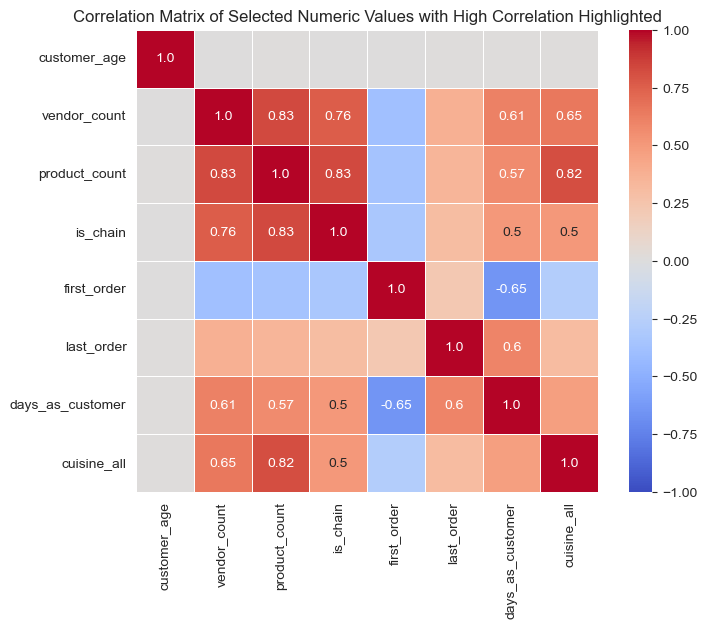

In [47]:
metric_feature_reduced = df[['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'days_as_customer', 'cuisine_all']]
heatmap_data = metric_feature_reduced.apply(pd.to_numeric, errors='coerce')

corr_matrix = heatmap_data.corr().round(2) 

mask_annot = np.abs(corr_matrix.values) >= 0.5  
annot = np.where(mask_annot, corr_matrix.values, "")  

plt.figure(figsize=(8, 6))
sns.heatmap(data=corr_matrix,annot=annot, fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cmap='coolwarm')

plt.title('Correlation Matrix of Selected Numeric Values with High Correlation Highlighted')
plt.show()

### Scatter Plot of Product Count vs. Days as Customer
This scatter plot illustrates the relationship between the number of products purchased by customers and the total number of days they have been customers. Each point represents a customer, allowing us to observe trends, clusters, and potential correlations between product count and customer longevity.

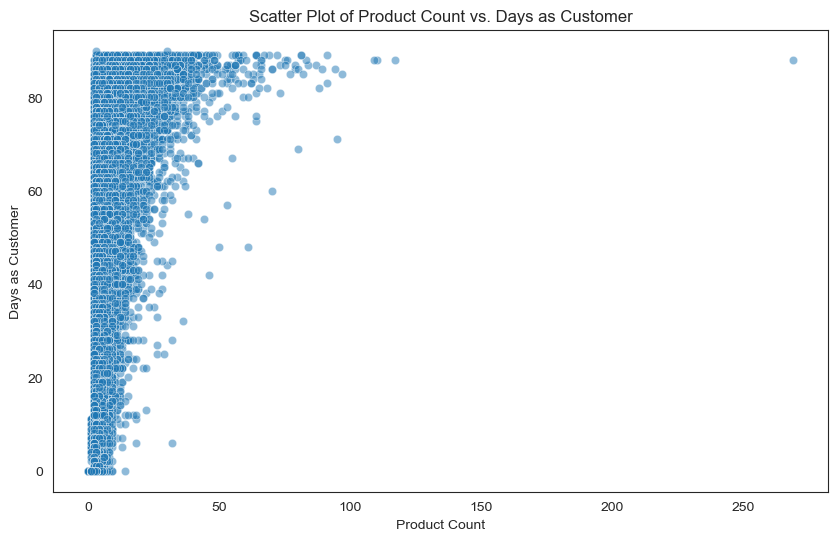

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="product_count", y="days_as_customer", alpha=0.5)
plt.title('Scatter Plot of Product Count vs. Days as Customer')
plt.xlabel('Product Count')
plt.ylabel('Days as Customer')
plt.show()

### Total and Percentage of Orders by Hour of the Day and Age Group
This figure presents two bar plots. The first plot shows the total number of orders placed across different hours of the day, segmented by customer age groups. The second plot illustrates the percentage of total orders for each age group during the same hours. Together, these visualizations provide insights into when different age demographics are most active in ordering, helping to identify peak times for various customer segments.

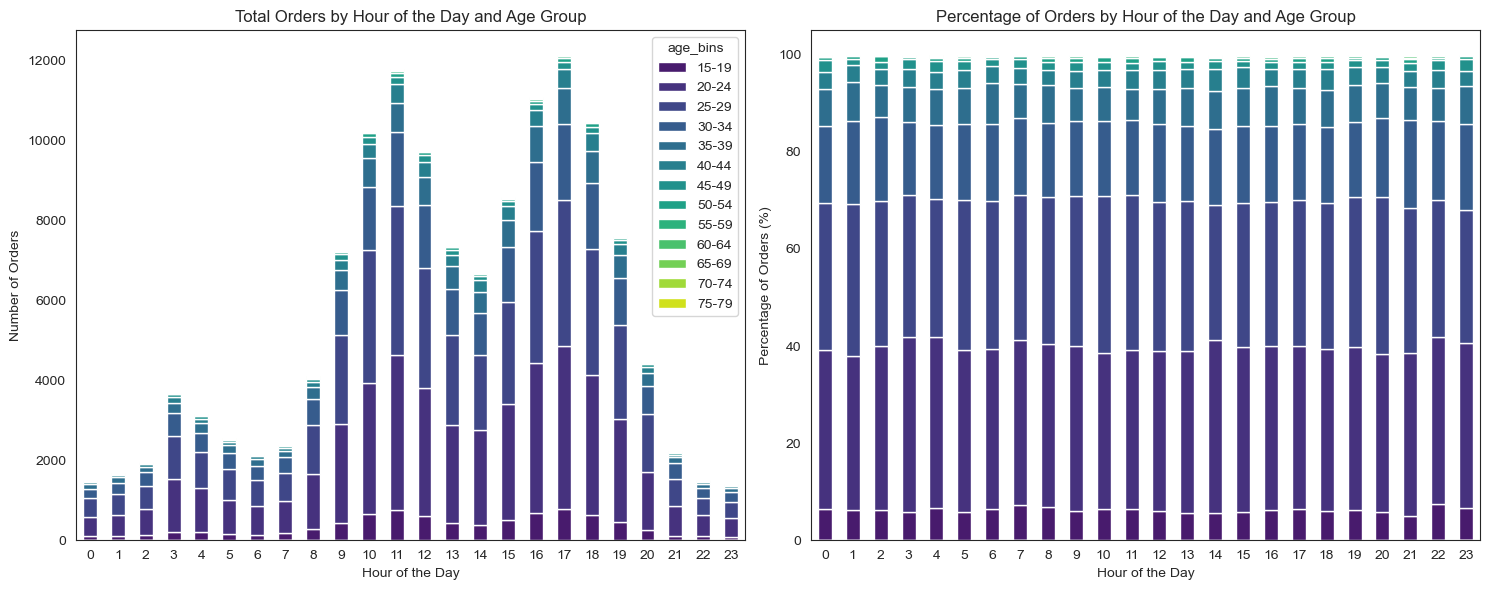

In [49]:
bins = range(15, 81, 5)  
labels = [f'{i}-{i+4}' for i in bins[:-1]]  
df['age_bins'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False) 

hourly_orders_melted = df.melt(id_vars=['age_bins'], value_vars=[f'HR_{i}' for i in range(0, 24)], var_name='hourly_order', value_name='order_count')

hourly_orders_melted['hourly_order'] = pd.Categorical(hourly_orders_melted['hourly_order'], categories=[f'HR_{i}' for i in range(0, 24)], ordered=True) 

grouped_data = hourly_orders_melted.groupby(['hourly_order', 'age_bins'], observed=False)['order_count'].sum().unstack()

total_orders_per_hour = grouped_data.sum(axis=1)

percentage_data = grouped_data.div(total_orders_per_hour, axis=0) * 100 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6)) 
viridis_palette = sns.color_palette('viridis', n_colors=len(grouped_data.columns))

grouped_data.plot.bar(stacked=True, ax=axes[0], color = viridis_palette, edgecolor='white')  
axes[0].set_title('Total Orders by Hour of the Day and Age Group')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Orders')
axes[0].set_xticks(range(len(grouped_data)))
axes[0].set_xticklabels([f'{i}' for i in range(0,24)], rotation=0)

percentage_data.plot.bar(stacked=True, ax=axes[1], legend=False, color=viridis_palette, edgecolor='white') 
axes[1].set_title('Percentage of Orders by Hour of the Day and Age Group')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Percentage of Orders (%)')
axes[1].set_xticks(range(len(percentage_data)))
axes[1].set_xticklabels([f'{i}' for i in range(0,24)], rotation=0)

plt.tight_layout()  
plt.show()

### Average of products and money spent ordered by age group
The bar chart shows the average product count for each age bin, while the red line graph indicates average spending on cuisines. This comparison highlights how product ordering and spending differ across age groups. 
The second bar chart also displays average product counts but includes error bars representing standard deviation. These bars reveal the variability in product ordering within each age bin.

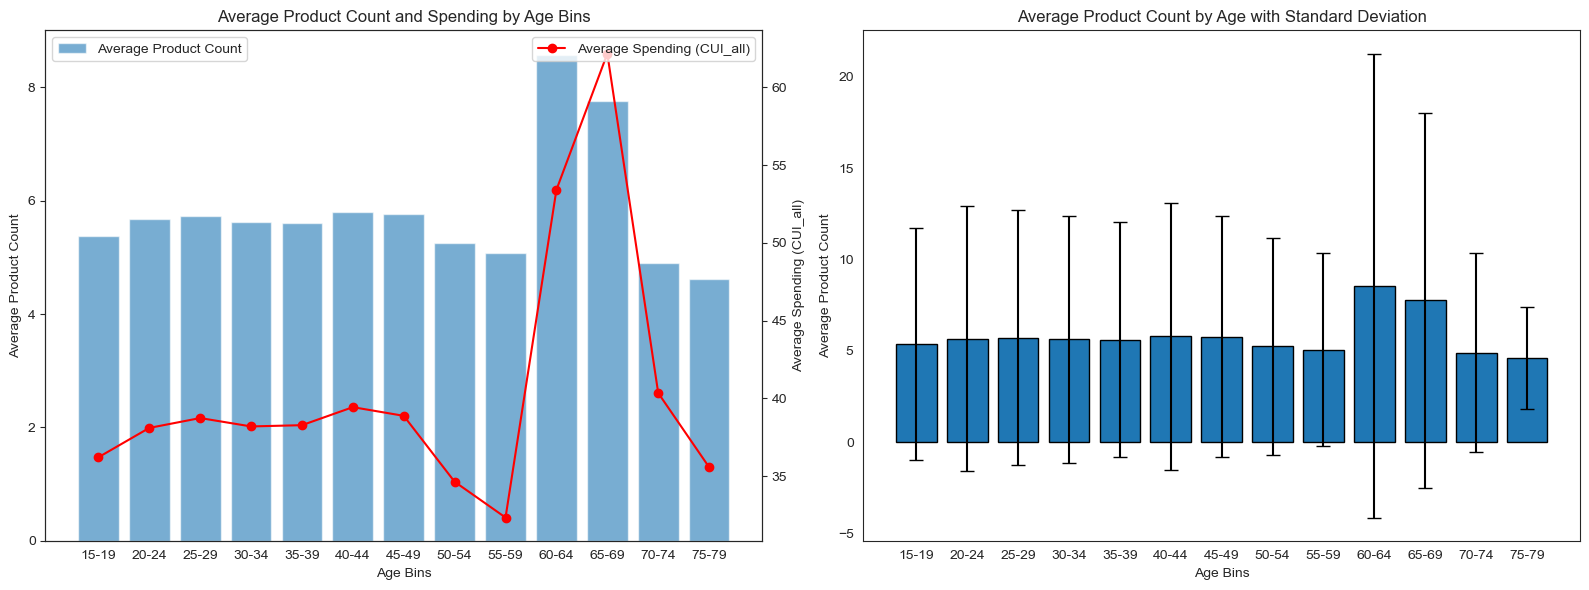

In [50]:
average_age_product_count = df.groupby('age_bins', observed=True)['product_count'].mean()
average_age_spending = df.groupby('age_bins', observed=True)['cuisine_all'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(average_age_product_count.index, average_age_product_count, alpha=0.6, label='Average Product Count')
ax1.set_title('Average Product Count and Spending by Age Bins')
ax1.set_xlabel('Age Bins')
ax1.set_ylabel('Average Product Count')

ax2_1 = ax1.twinx()
ax2_1.plot(average_age_spending.index, average_age_spending, color='red', marker='o', label='Average Spending (CUI_all)')
ax2_1.set_ylabel('Average Spending (CUI_all)')

ax1.legend(loc='upper left')
ax2_1.legend(loc='upper right')

std_age = df.groupby('age_bins', observed=True)['product_count'].std()
ax2.bar(average_age_product_count.index, average_age_product_count, yerr=std_age, edgecolor='black', capsize=5)
ax2.set_title('Average Product Count by Age with Standard Deviation')
ax2.set_xlabel('Age Bins')
ax2.set_ylabel('Average Product Count')
ax2.tick_params(axis='x')

plt.tight_layout() 
plt.show()


### Total Money Spent by Cuisine Each Day of the Week
This bar chart displays the total expenditure on various cuisines for each day of the week. Each bar represents the cumulative amount spent on different cuisine types, allowing for a clear comparison of spending patterns over the week. The use of friendly cuisine names enhances readability, offering insights into customer preferences and trends throughout the week.


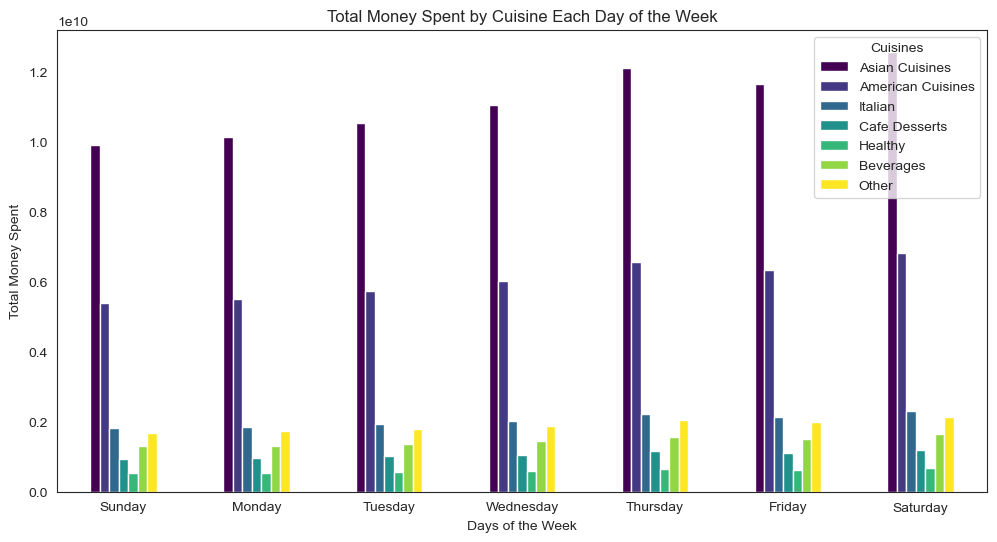

In [51]:
cuisine_replacement_updated = {
    'asian_cuisines': 'Asian Cuisines',
    'american_cuisines': 'American Cuisines',
    'CUI_Italian': 'Italian',
    'beverages': 'Beverages',
    'CUI_Healthy': 'Healthy',
    'cafe_desserts': 'Cafe Desserts',
    'CUI_Street Food / Snacks': 'Street Food / Snacks',
    'CUI_Desserts': 'Desserts',
    'CUI_OTHER': 'Other'
}
total_spent_by_cuisine = pd.DataFrame(index=weekly_orders.index, columns=cuisines_aggregated)
for day in total_spent_by_cuisine.index:
    for cuisine in cuisines_aggregated:
        if cuisine in df.columns:  
            total_spent_by_cuisine.loc[day, cuisine] = (weekly_orders[day] * df[cuisine]).sum()

total_spent_by_cuisine.index = [day_mapping.get(day, day) for day in total_spent_by_cuisine.index]

total_spent_by_cuisine.columns = [cuisine_replacement_updated.get(cuisine, cuisine.replace('CUI_', '')) 
                                  for cuisine in total_spent_by_cuisine.columns]

total_spent_by_cuisine.plot(kind='bar', figsize=(12, 6), colormap='viridis',
                            title='Total Money Spent by Cuisine Each Day of the Week',
                            xlabel='Days of the Week', ylabel='Total Money Spent')
plt.xticks(rotation=0)
plt.legend(title='Cuisines')
plt.show()


### Total Spent Per Type Of Cuisine and Per Hours Of The Day Frequency and Proportion
The first bar chart displays the total expenditure on various cuisines during each hour of the day, highlighting customer spending patterns. The second stacked bar chart illustrates the proportion of total money spent by each cuisine type for the same hours, allowing for a visual comparison of spending behavior. 



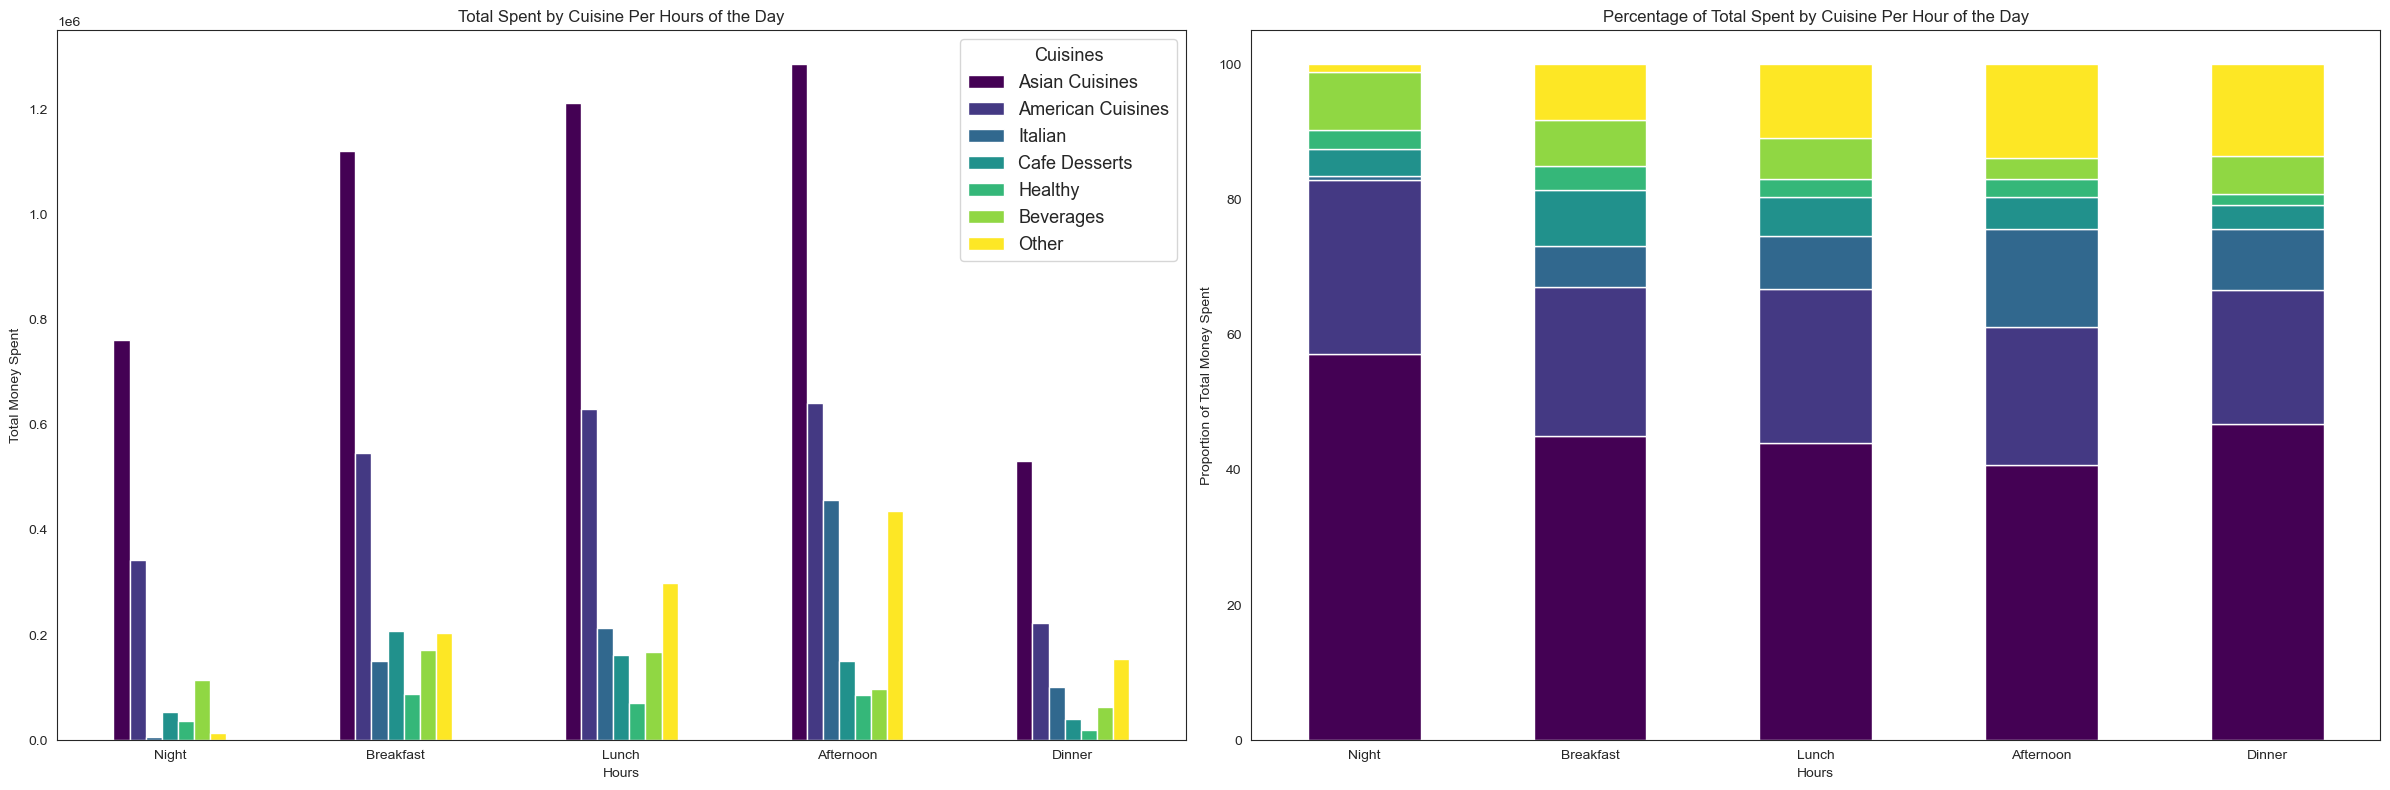

In [52]:
total_spent_by_cuisine = pd.DataFrame(index=hours_aggregated, columns=cuisines_aggregated) 
for hour in hours_aggregated:
    for cuisine in cuisines_aggregated:
        if cuisine in df.columns:  
            total_spent_by_cuisine.loc[hour, cuisine] = (df[hour] * df[cuisine]).sum()

total_spent_by_cuisine_percentage = total_spent_by_cuisine.div(total_spent_by_cuisine.sum(axis=1), axis=0) * 100

total_spent_by_cuisine.index = [time_of_day_replacement.get(hour, hour) for hour in total_spent_by_cuisine.index]
total_spent_by_cuisine_percentage.index = total_spent_by_cuisine.index 

total_spent_by_cuisine.columns = [cuisine_replacement_updated.get(cuisine, cuisine.replace('CUI_', '')) 
                                  for cuisine in total_spent_by_cuisine.columns]
total_spent_by_cuisine_percentage.columns = total_spent_by_cuisine.columns 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))  

total_spent_by_cuisine.plot(kind='bar', ax=axes[0], colormap='viridis', 
                            title='Total Spent by Cuisine Per Hours of the Day',
                            xlabel='Hours', ylabel='Total Money Spent')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Cuisines', fontsize=13, title_fontsize=13) 

total_spent_by_cuisine_percentage.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis',
                                       title='Percentage of Total Spent by Cuisine Per Hour of the Day',
                                       xlabel='Hours', ylabel='Proportion of Total Money Spent')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend().remove()

plt.tight_layout()  
plt.show()

### Average Cuisine Product Count by Age
The first bar chart illustrates the average number of products ordered from various cuisines across different age groups. Each bar represents an age bin, providing insights into culinary preferences among different demographics. The second chart presents these averages as percentages, offering a clearer view of how each cuisine contributes to the overall product count within age bins. 

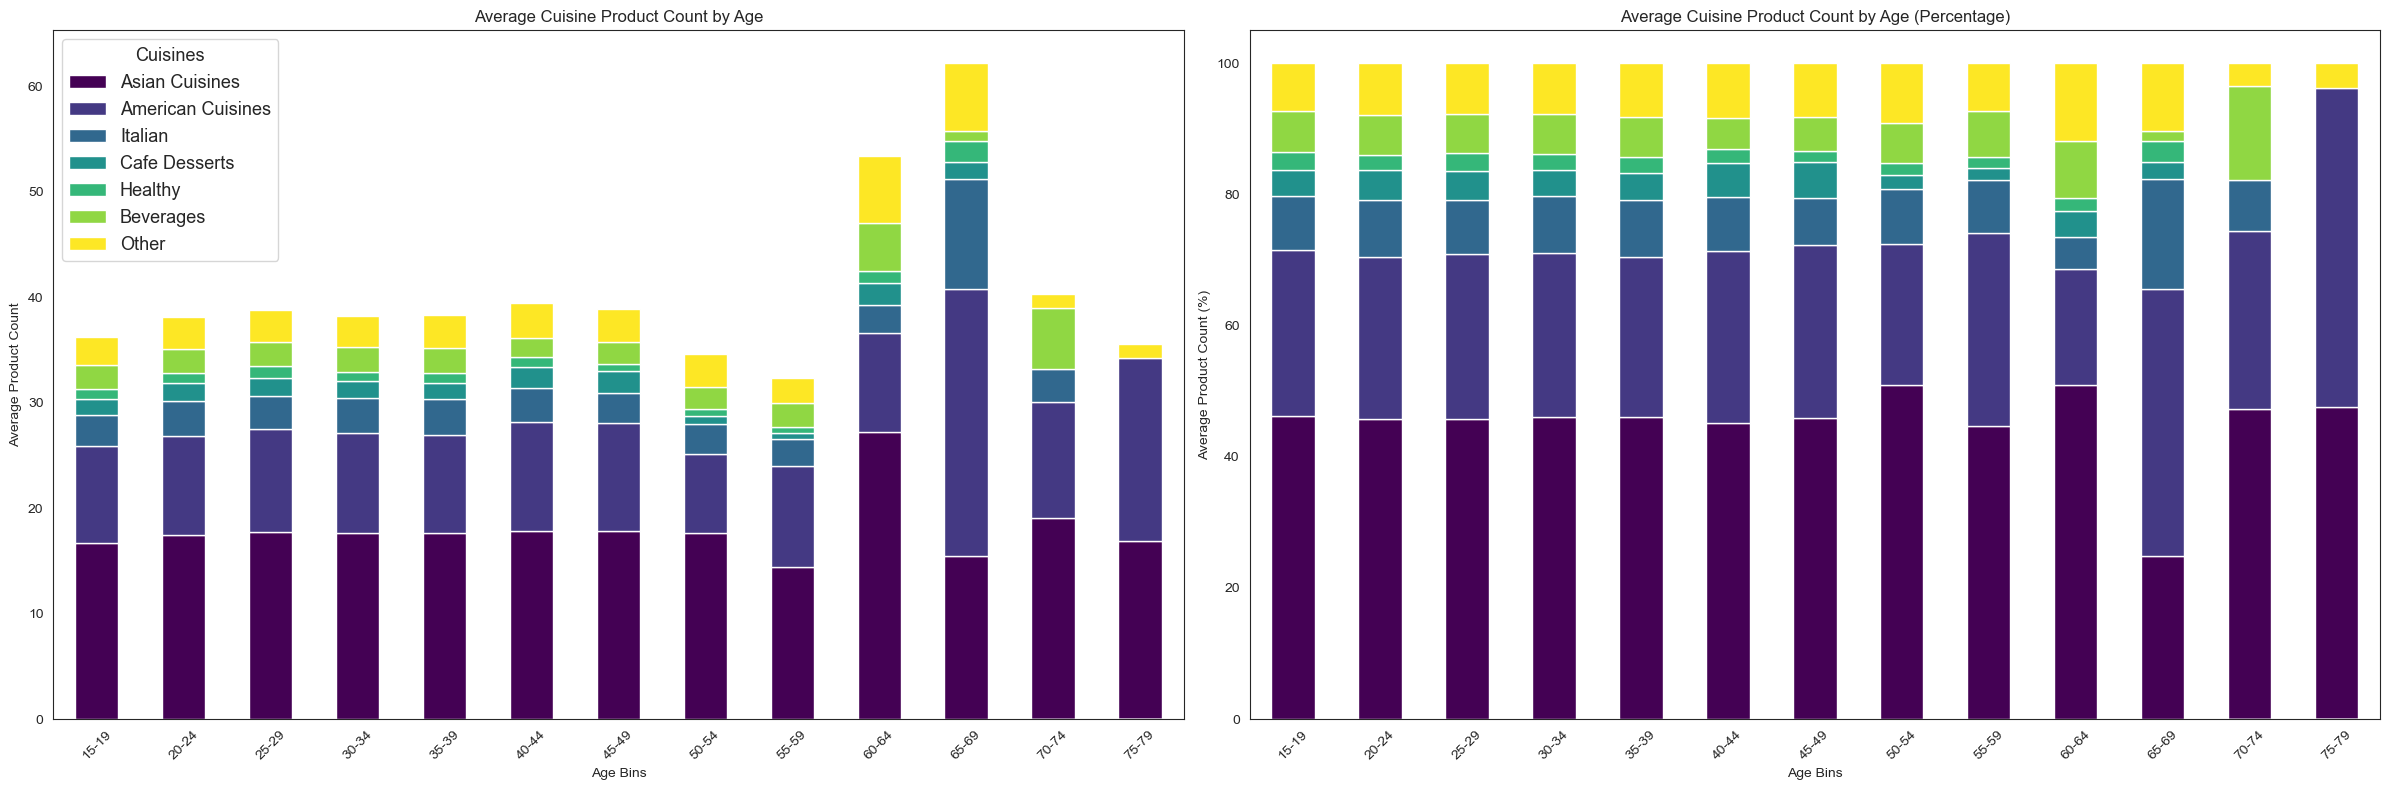

In [53]:
average_cuisine_age = df.groupby('age_bins', observed=True)[cuisines_aggregated].mean()

average_cuisine_age.columns = [cuisine_replacement_updated.get(cuisine, cuisine.replace('CUI_', '')) 
                                  for cuisine in total_spent_by_cuisine.columns]

average_cuisine_age_percentage = average_cuisine_age.div(average_cuisine_age.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))  

average_cuisine_age.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis',
                         title='Average Cuisine Product Count by Age',
                         xlabel='Age Bins', ylabel='Average Product Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Cuisines', fontsize=13, title_fontsize=13) 

average_cuisine_age_percentage.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis',
                                    title='Average Cuisine Product Count by Age (Percentage)',
                                    xlabel='Age Bins', ylabel='Average Product Count (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].get_legend().remove() 

plt.tight_layout() 
plt.show()

### Distribution of Promotions by Customer Age Groups
The first bar chart displays the distribution of customer promotions across various age groups. Each bar represents a specific age bin, with segments indicating the number of customers who received different types of promotions. The second chart provides a normalized view of these distributions, showcasing the proportion of customers receiving promotions relative to each age group. 

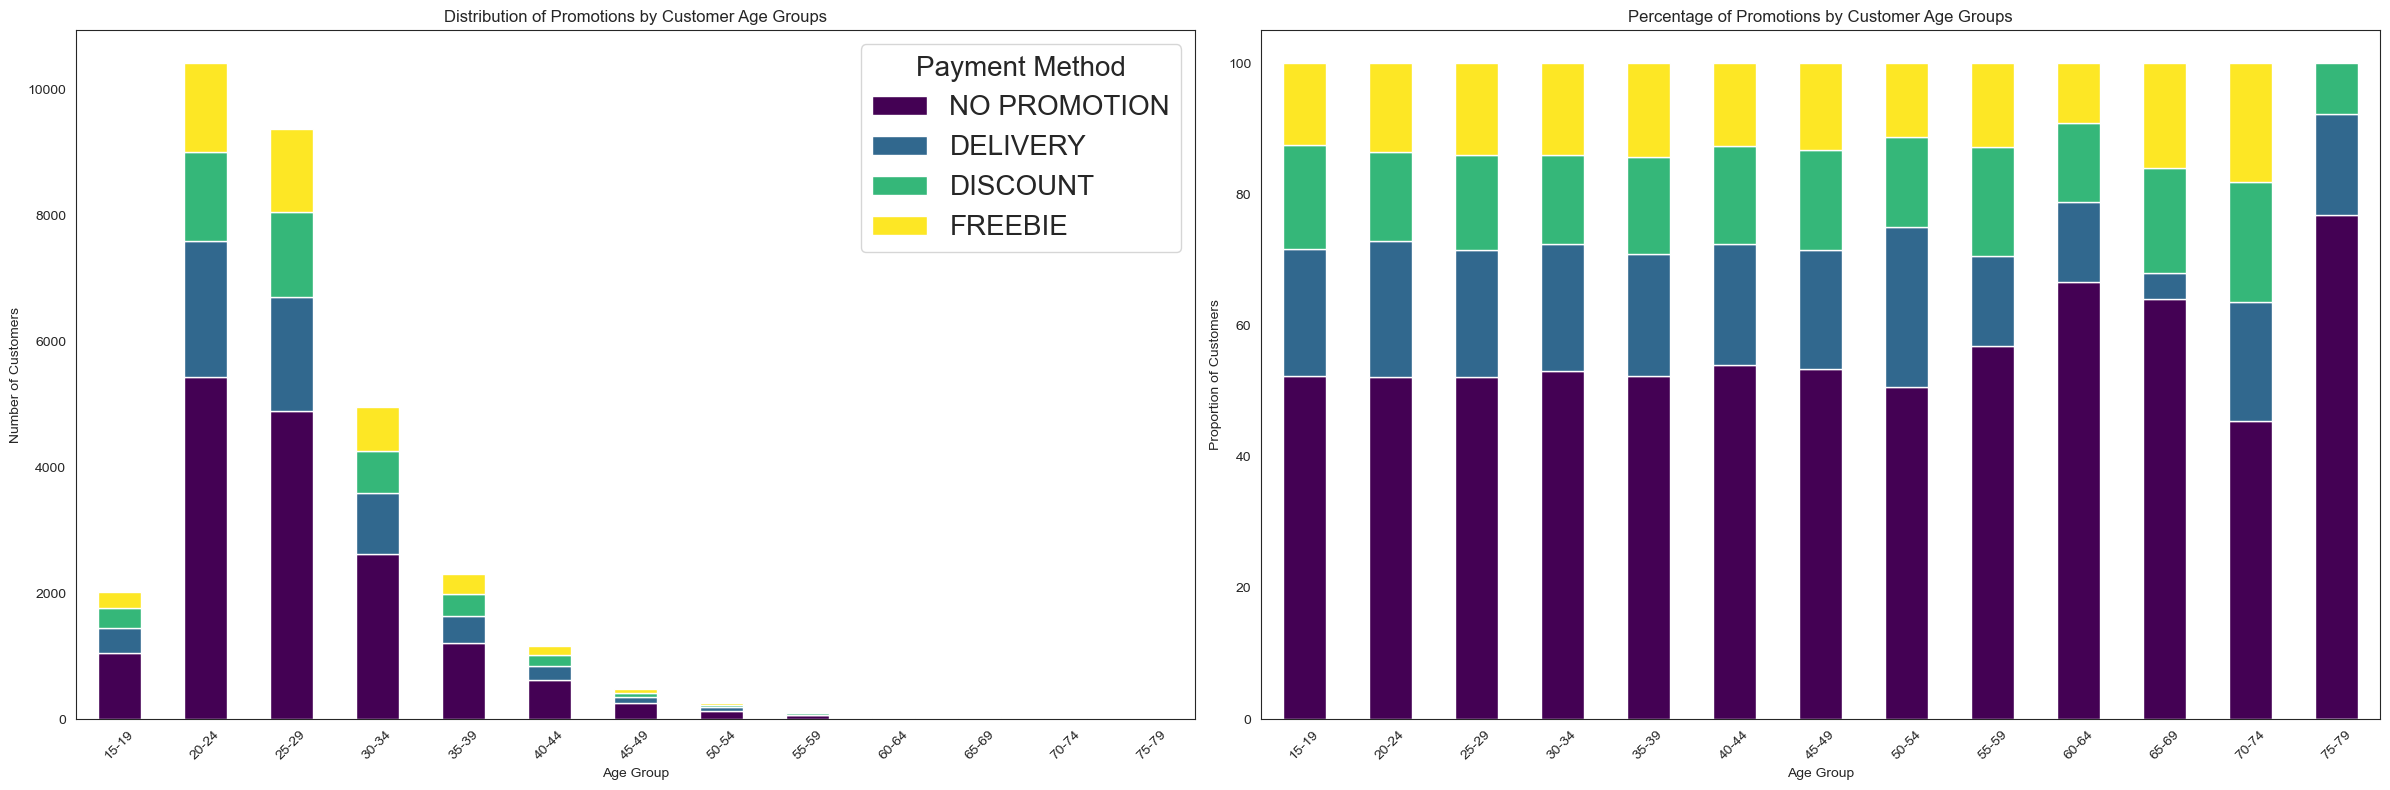

In [54]:
age_promo_crosstab = pd.crosstab(df['age_bins'], df['last_promo'])

age_promo_crosstab.columns = [label if label != '-' else 'NO PROMOTION' for label in age_promo_crosstab.columns]

age_promo_crosstab_percentage = age_promo_crosstab.div(age_promo_crosstab.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))  

age_promo_crosstab.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Distribution of Promotions by Customer Age Groups')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Payment Method', fontsize=20, title_fontsize=20)

age_promo_crosstab_percentage.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Percentage of Promotions by Customer Age Groups')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Proportion of Customers')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().remove()

plt.tight_layout() 
plt.show()

### Frequency and Proportion of Payment Methods by Customer Age Groups
The first bar chart illustrates the frequency of different payment methods utilized by customers across various age groups. Each bar represents a specific age bin, with segments indicating the number of transactions made using each payment method. The second chart presents the normalized proportions of payment method usage, showcasing how payment preferences vary among different demographics. 

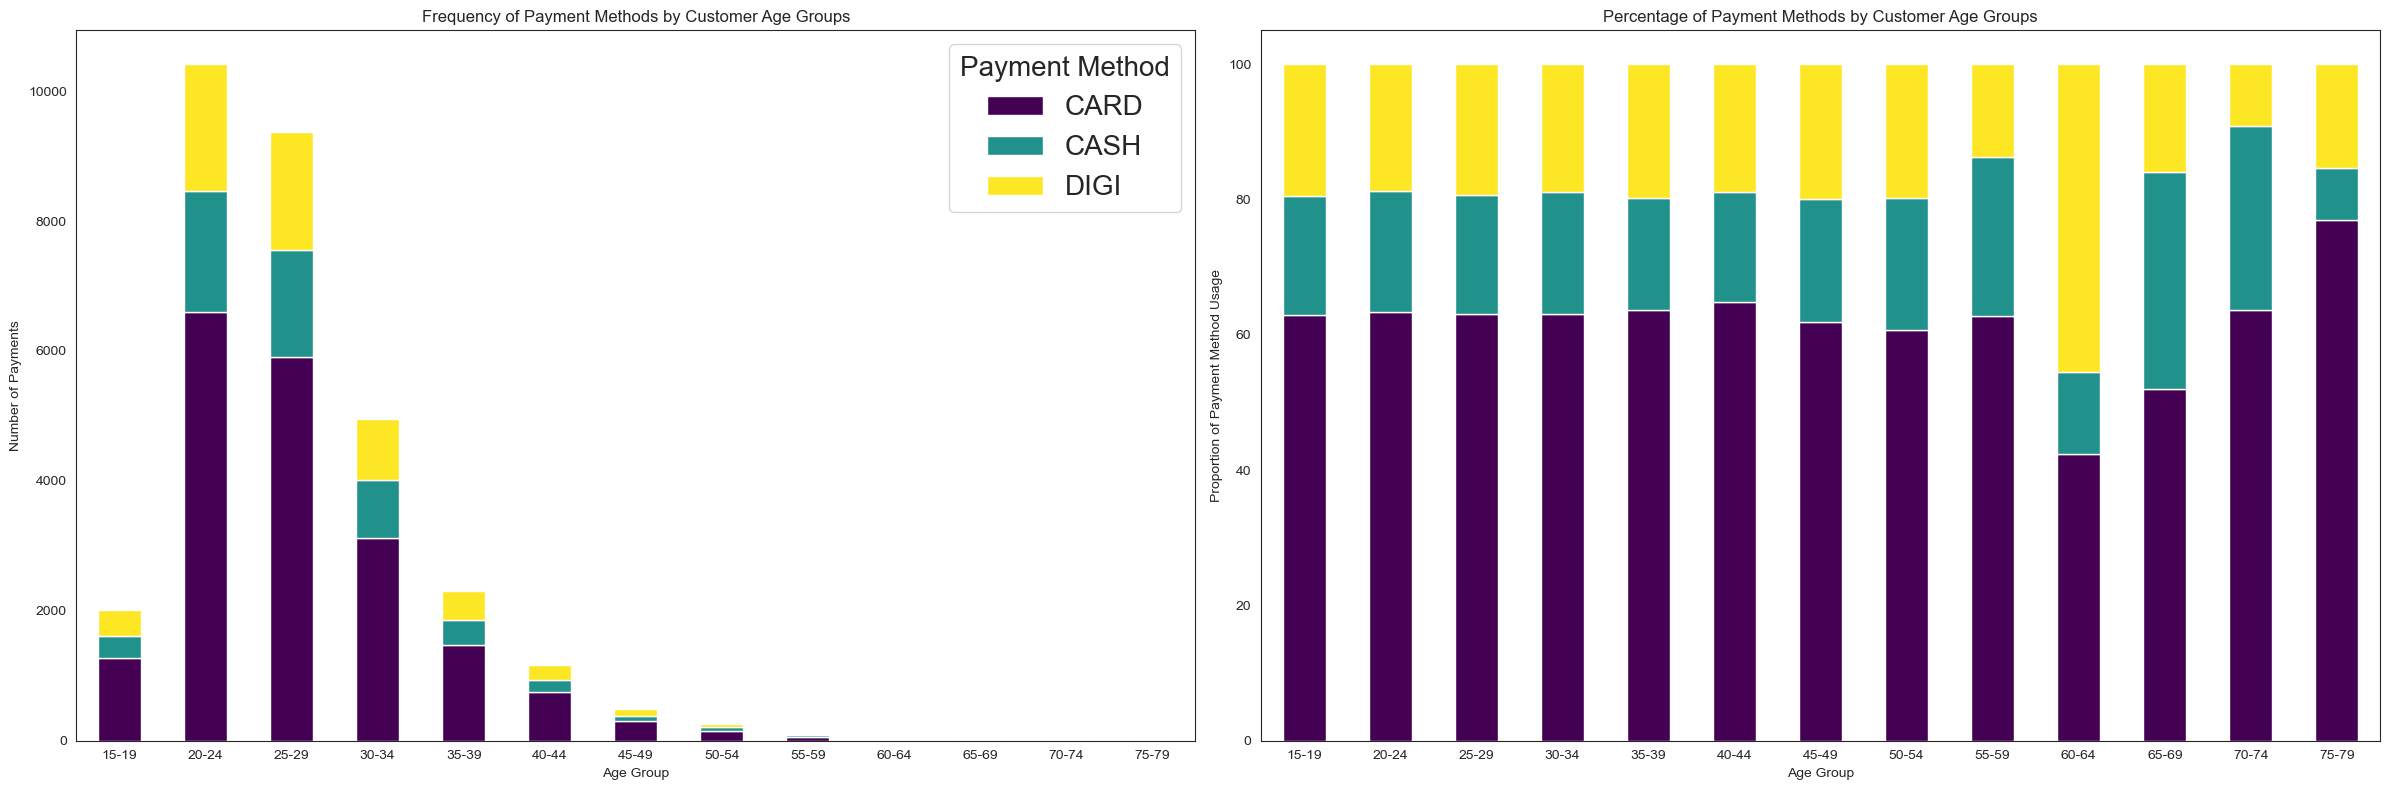

In [55]:
age_payment_crosstab = pd.crosstab(df['age_bins'], df['payment_method'])

age_payment_crosstab_norm = pd.crosstab(df['age_bins'], df['payment_method'], normalize='index') * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8)) 

age_payment_crosstab.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Frequency of Payment Methods by Customer Age Groups')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Payments')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Payment Method', fontsize=20, title_fontsize=20) 

age_payment_crosstab_norm.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Percentage of Payment Methods by Customer Age Groups')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Proportion of Payment Method Usage')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend().remove()

plt.tight_layout()  
plt.show()

### Proportion of Each Cuisine Type by Day of the Week
This heatmap visualizes the distribution of various cuisine types across the days of the week, highlighting the proportions of orders for each cuisine. Each cell represents the percentage of total orders attributed to a specific cuisine on a given day, with annotations providing exact values for clarity.

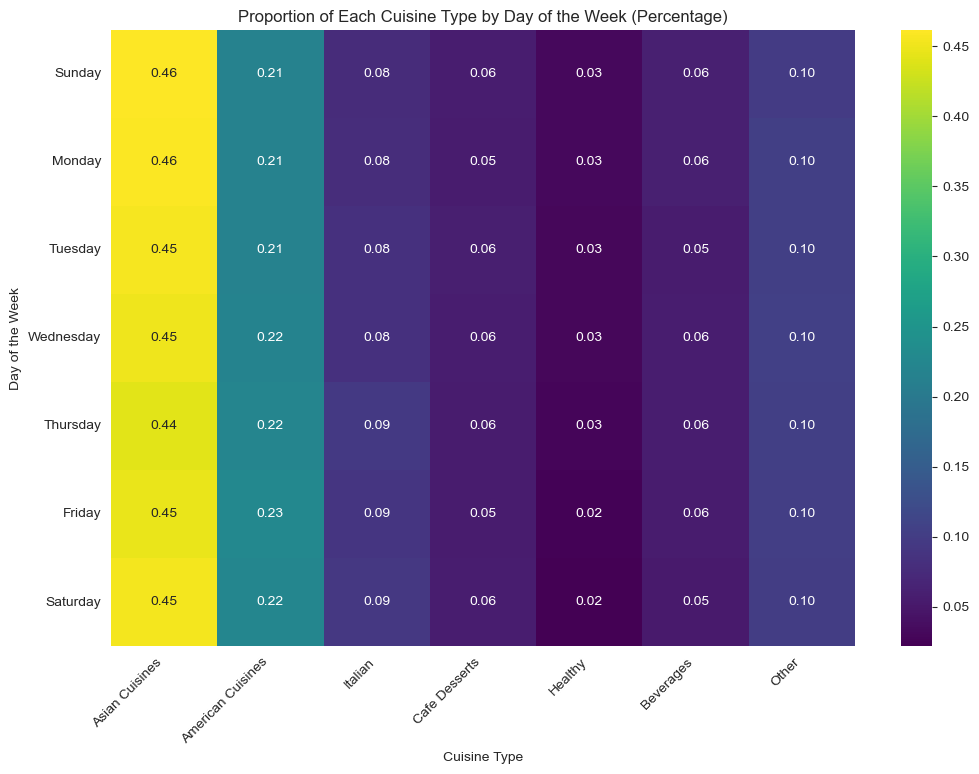

In [56]:
data_for_heatmap = pd.DataFrame()

for day in df.loc[:, 'DOW_0':'DOW_6'].columns:
    total_orders_for_day = df[cuisines_aggregated].multiply(df[day], axis="index").sum().sum()
    daily_proportions = df[cuisines_aggregated].multiply(df[day], axis="index").sum() / total_orders_for_day
    data_for_heatmap[day_mapping[day]] = daily_proportions

data_for_heatmap = data_for_heatmap.T

data_for_heatmap.columns = [cuisine_replacement_updated.get(col, col.replace('CUI_', '')) for col in data_for_heatmap.columns]

plt.figure(figsize=(12, 8))
sns.heatmap(data_for_heatmap, annot=True, fmt=".2f", cmap="viridis")  
plt.title('Proportion of Each Cuisine Type by Day of the Week (Percentage)')
plt.xlabel('Cuisine Type')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### Total Orders by Cuisine Type Throughout the Day
This set of bar charts illustrates the distribution of total orders for various cuisine types across each hour of the day. Each subplot represents a specific cuisine, showcasing how order volumes fluctuate throughout the day. The x-axis indicates the hour, while the y-axis reflects the total number of orders. This visualization provides insights into peak ordering times for different cuisines, aiding in understanding customer preferences and behavior over the course of the day.

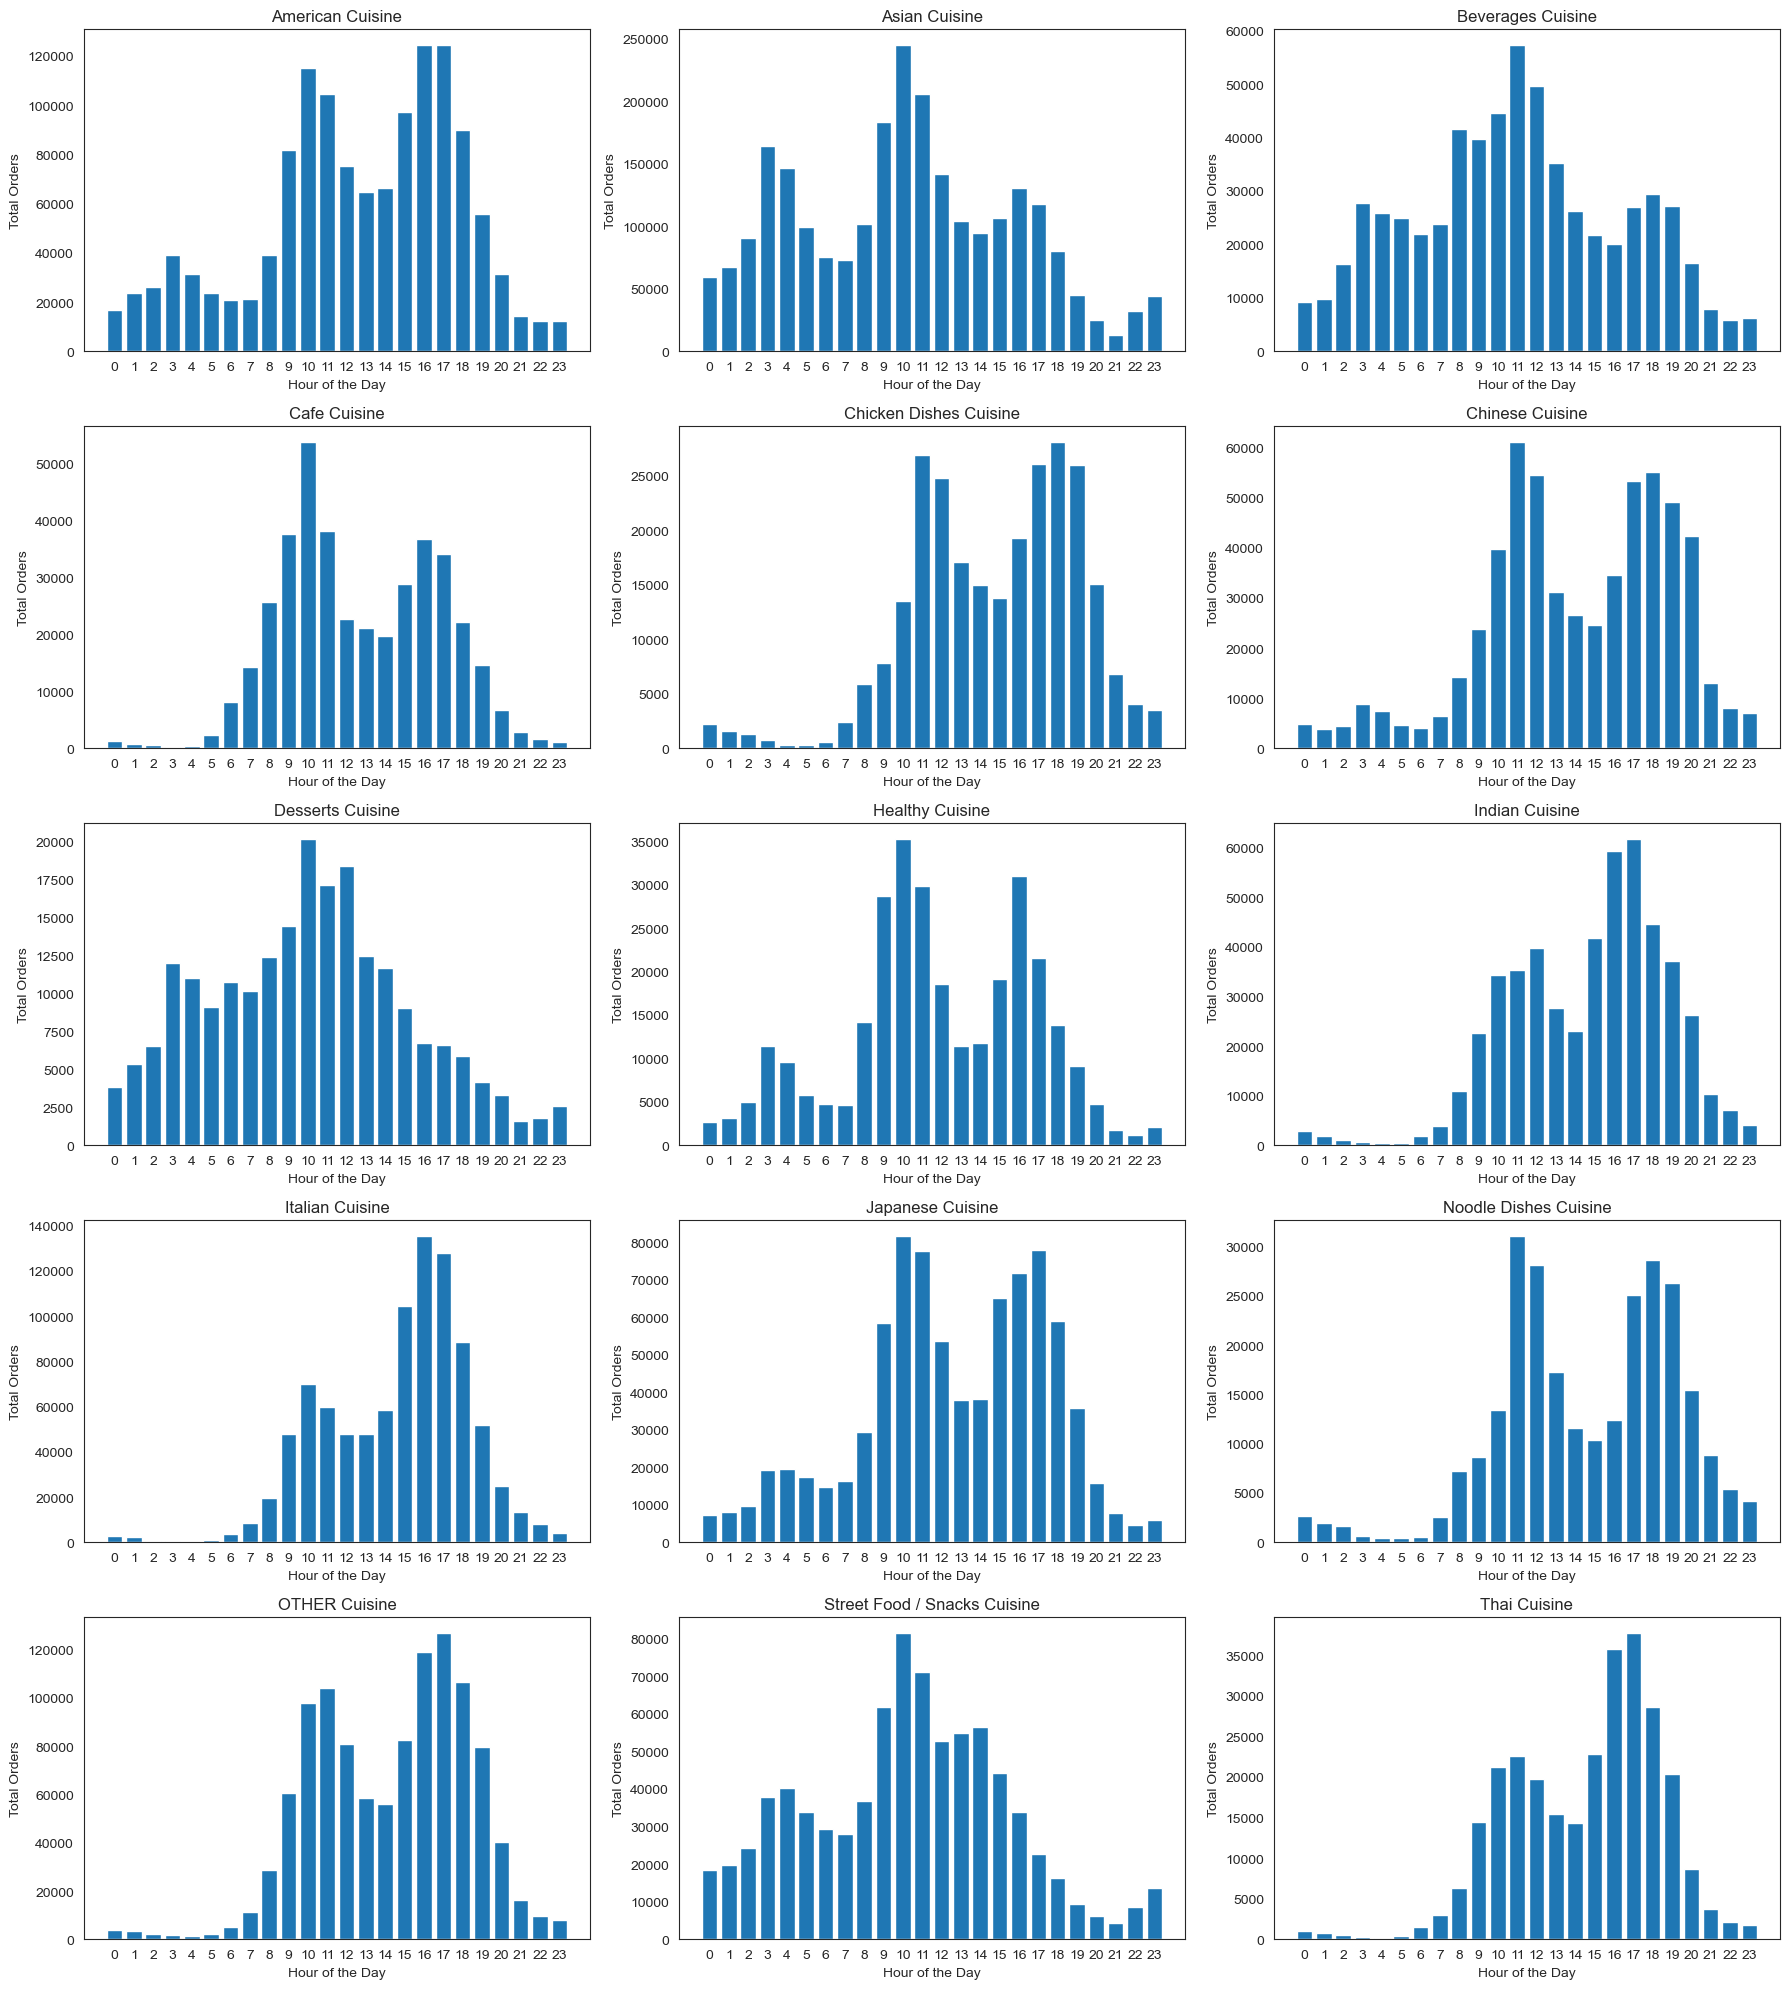

In [57]:
all_cuisine_columns = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']

hour_columns = [f'HR_{i}' for i in range(0, 24)]

hour_labels = [str(i) for i in range(0, 24)]

total_orders_per_hour = pd.DataFrame(index=hour_columns)

for cuisine in all_cuisine_columns:
    total_orders_per_hour[cuisine] = df[hour_columns].multiply(df[cuisine], axis=0).sum()

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))  
axes = axes.flatten()  

for i, cuisine in enumerate(all_cuisine_columns):
    axes[i].bar(hour_labels, total_orders_per_hour[cuisine])
    axes[i].set_title(f'{cuisine.split("_")[1]} Cuisine')
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Total Orders')
    axes[i].set_xticks(hour_labels)  
    axes[i].set_xticklabels(hour_labels)  

for ax in axes[len(all_cuisine_columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### Average Product Count and Chained Amount by Region
This dual-axis chart illustrates the average product count and the average amount spent on chain restaurants across different regions. The bar plot (in blue) represents the average product count, indicating the variety of products ordered by customers in each region. The line plot (in red) overlays the average chained amount, showing the extent of customer engagement with chain restaurants in those areas. 

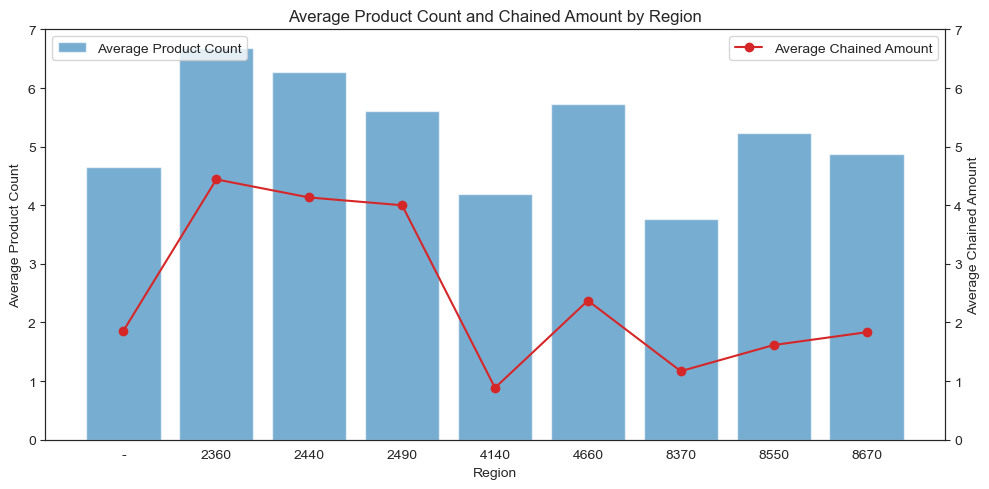

In [58]:
grouped_region_product_count = df.groupby('customer_region')['product_count'].mean()
grouped_region_chained_amount = df.groupby('customer_region')['is_chain'].mean()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel('Region')
ax1.set_ylabel('Average Product Count')
bars = ax1.bar(grouped_region_product_count.index, grouped_region_product_count.values, alpha=0.6, label='Average Product Count')
ax1.set_title('Average Product Count and Chained Amount by Region')
ax1.grid(False)  

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Chained Amount')
ax2.plot(grouped_region_chained_amount.index, grouped_region_chained_amount.values, color=color, marker='o', label='Average Chained Amount')
ax2.grid(False) 

ax1.set_ylim(0, 7)
ax2.set_ylim(0, 7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Products that were chained in the total of the products

In [59]:
df['is_chain'].sum() / df['product_count'].sum()

0.4973793592021297

### Proportion of Cuisine Preferences by Customer Age Groups
This stacked bar chart illustrates the proportions of different cuisine preferences among various customer age groups. Each segment of the bars represents a specific cuisine type, showcasing how preferences vary across age demographics. 

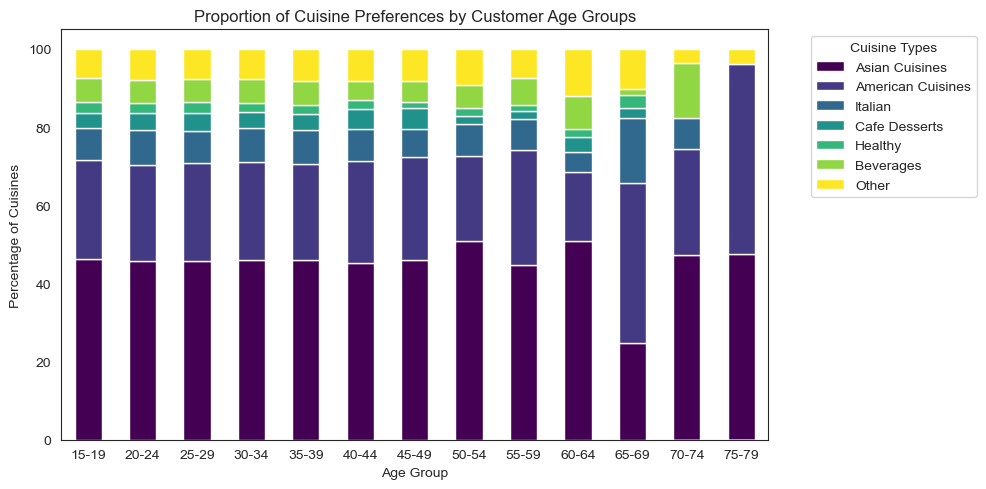

In [60]:
age_cuisine_totals = df.groupby('age_bins', observed=False)[cuisines_aggregated].sum()

age_cuisine_totals.columns = [col.replace('CUI_', '') for col in average_cuisine_age.columns]

age_cuisine_proportions = age_cuisine_totals.div(age_cuisine_totals.sum(axis=1), axis=0) * 100

age_cuisine_proportions.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')

plt.title('Proportion of Cuisine Preferences by Customer Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Cuisines')
plt.xticks(rotation=0)
plt.legend(title='Cuisine Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

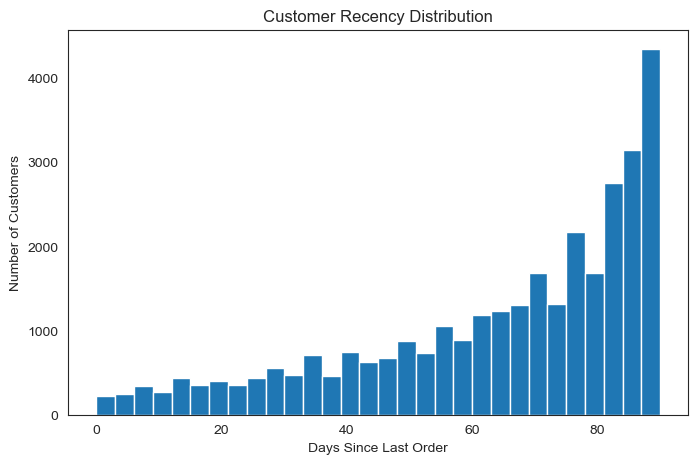

In [61]:
plt.figure(figsize=(8, 5))
df['last_order'].plot(kind='hist', bins=30)
plt.title('Customer Recency Distribution')
plt.xlabel('Days Since Last Order')
plt.ylabel('Number of Customers')
plt.grid(False)
plt.show()

### Average Vendor Count by Cuisine Type
This bar chart presents the average number of vendors associated with each cuisine type. 

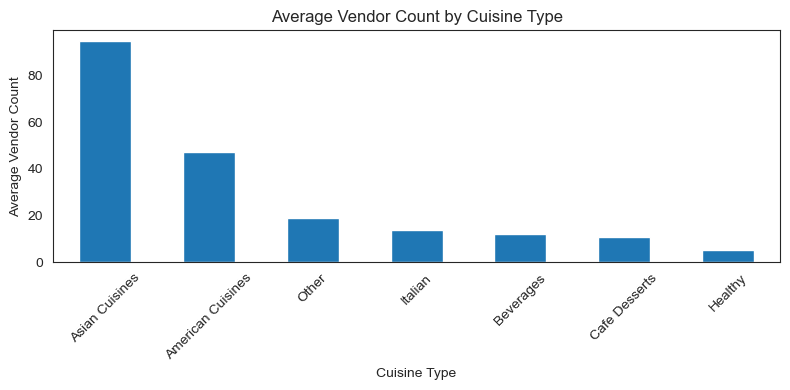

In [62]:
cuisine_vendor_data = df[cuisines_aggregated].multiply(df['vendor_count'], axis=0).mean()

cuisine_vendor_data.index = [cuisine_replacement_updated.get(col, col.replace('CUI_', '')) for col in cuisine_vendor_data.index]

cuisine_vendor_data = cuisine_vendor_data.loc[cuisine_vendor_data.sort_values(ascending=False).index]

plt.figure(figsize=(8, 4))
cuisine_vendor_data.plot(kind='bar')
plt.title('Average Vendor Count by Cuisine Type') 
plt.xlabel('Cuisine Type')
plt.ylabel('Average Vendor Count')  
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show() 

### Repeat Customers vs. One-Time Customers
This visualization compares spending distributions by cuisine, age group, and customer region between repeat and one-time customers.

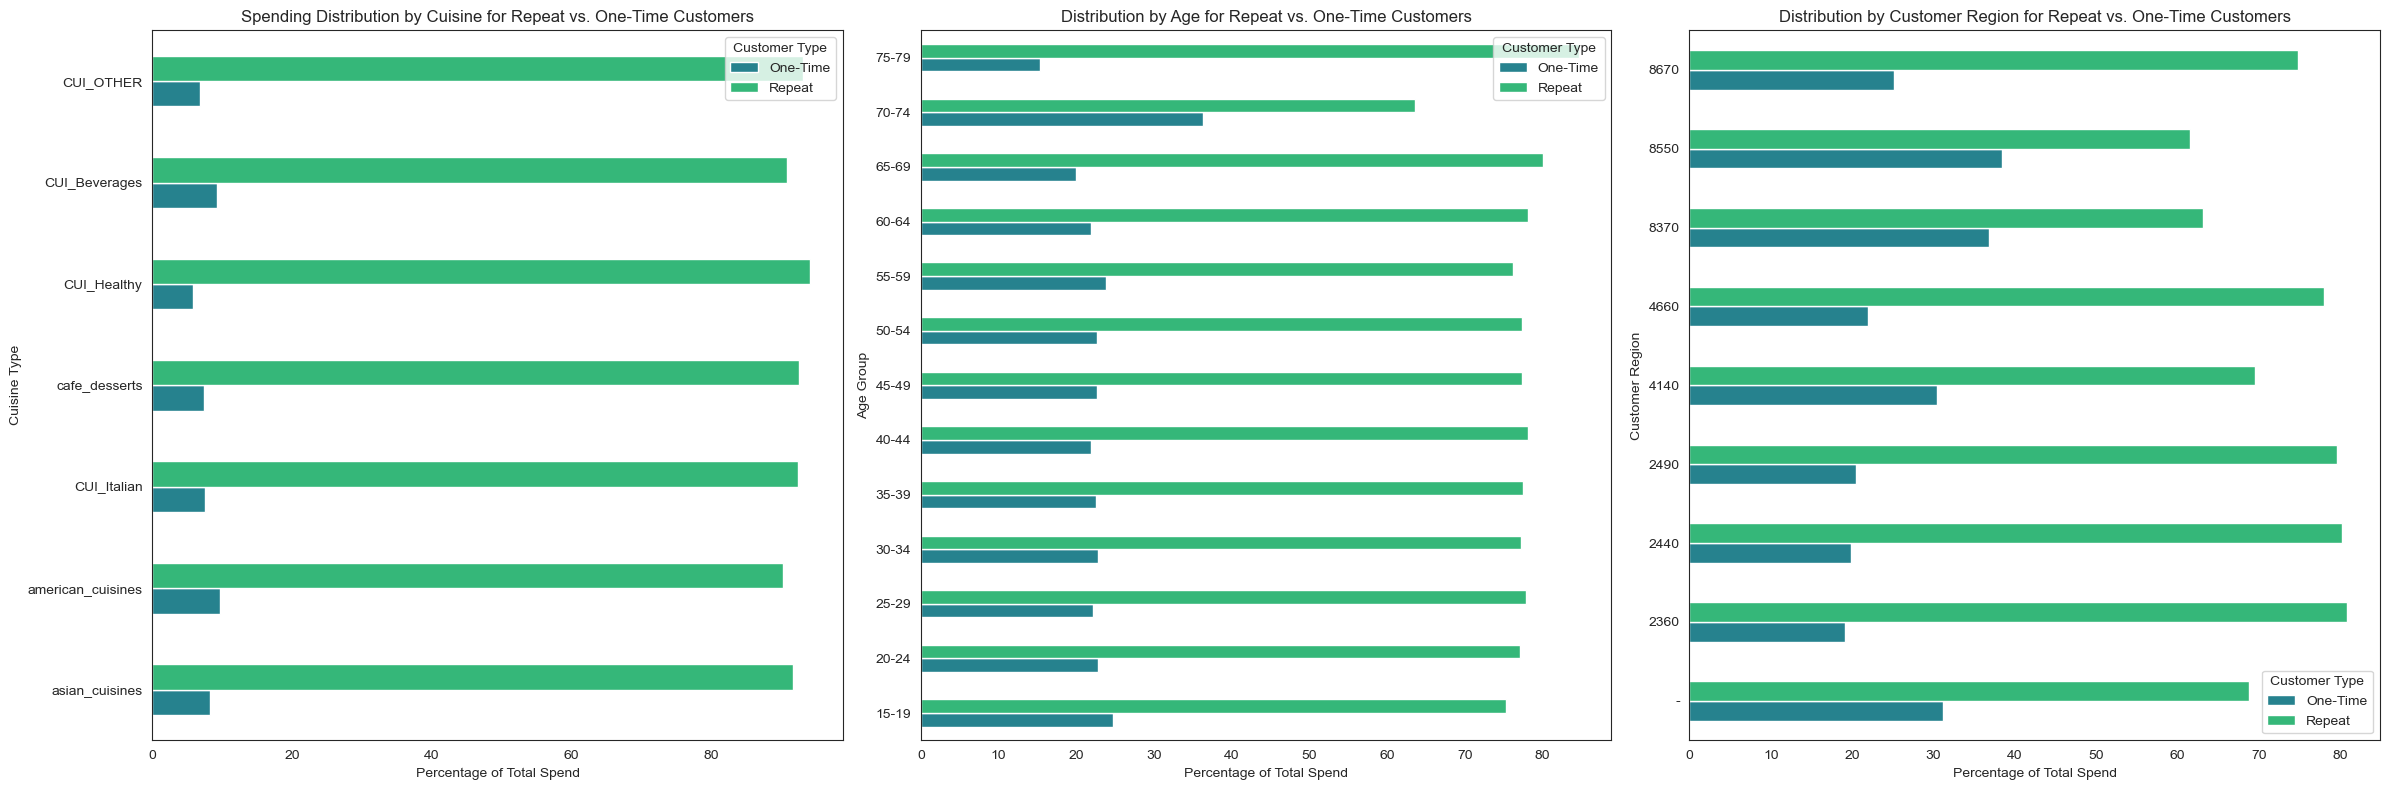

In [63]:
repeat_rate = df['repeat_customers'].value_counts()

repeat_rate.index = repeat_rate.index.map({True: 'Repeat', False: 'One-Time'})

fig, axs = plt.subplots(1, 3, figsize=(24, 8))  

repeat_by_cuisine = df.groupby('repeat_customers')[cuisines_aggregated].sum().T
repeat_by_cuisine = repeat_by_cuisine.div(repeat_by_cuisine.sum(axis=1), axis=0) * 100

repeat_by_cuisine.plot(kind='barh', ax=axs[0], color=['#26828e', '#35b779'])
axs[0].set_title('Spending Distribution by Cuisine for Repeat vs. One-Time Customers')
axs[0].set_xlabel('Percentage of Total Spend')
axs[0].set_ylabel('Cuisine Type')
axs[0].legend(title='Customer Type', labels=['One-Time', 'Repeat'])

repeat_by_age = df.groupby(['repeat_customers', 'age_bins'],observed=False).size().unstack().fillna(0)
repeat_by_age = repeat_by_age.div(repeat_by_age.sum(axis=0), axis=1) * 100  

repeat_by_age.T.plot(kind='barh', ax=axs[1], color=['#26828e', '#35b779'])
axs[1].set_title('Distribution by Age for Repeat vs. One-Time Customers')
axs[1].set_xlabel('Percentage of Total Spend')
axs[1].set_ylabel('Age Group')
axs[1].legend(title='Customer Type', labels=['One-Time', 'Repeat'])

repeat_by_region = df.groupby(['repeat_customers', 'customer_region'], observed=False).size().unstack().fillna(0)
repeat_by_region = repeat_by_region.div(repeat_by_region.sum(axis=0), axis=1) * 100  

repeat_by_region.T.plot(kind='barh', ax=axs[2], color=['#26828e', '#35b779'])
axs[2].set_title('Distribution by Customer Region for Repeat vs. One-Time Customers')
axs[2].set_xlabel('Percentage of Total Spend')
axs[2].set_ylabel('Customer Region')
axs[2].legend(title='Customer Type', labels=['One-Time', 'Repeat'])

plt.tight_layout()
plt.show()

### Cuisine Preferences by Region
This visualization showcases the preferences for different cuisines among various customer regions. The left bar chart illustrates the total number of cuisine orders per region, highlighting which types of food are most popular in each area. The right stacked bar chart represents the percentage distribution of these cuisines, providing insights into the relative popularity of each type within each region. 

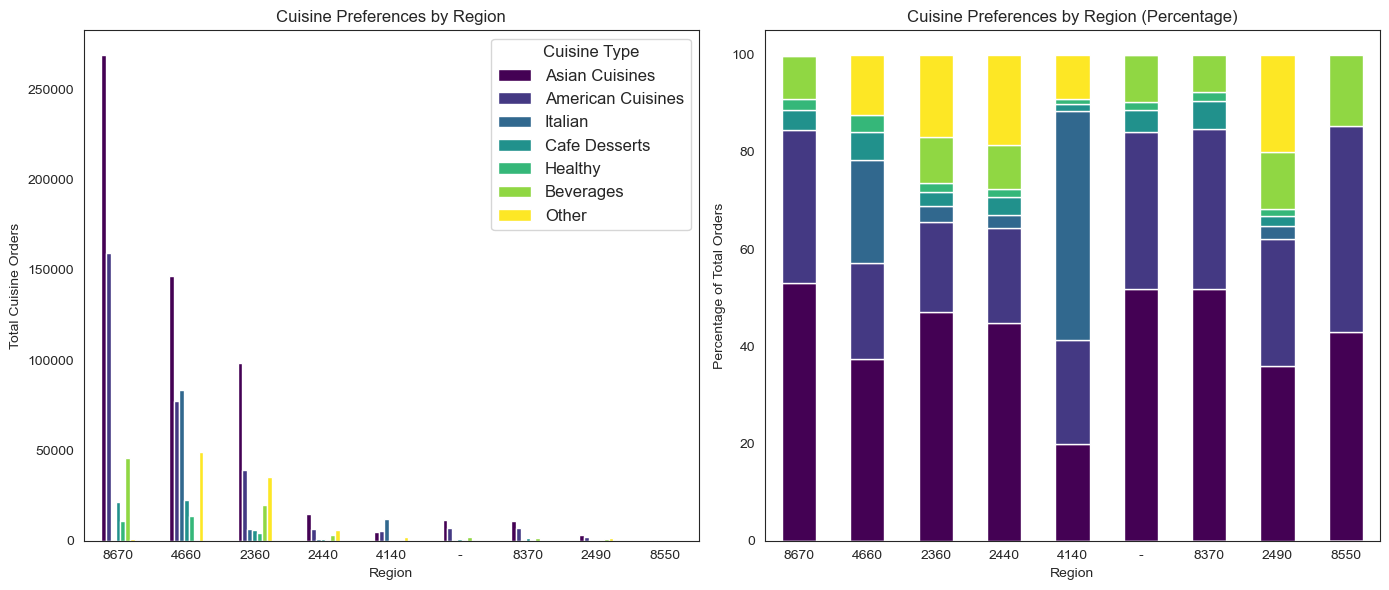

In [64]:
cuisine_per_region = df.groupby('customer_region')[cuisines_aggregated].sum()

cuisine_per_region.columns = [cuisine_replacement_updated.get(cuisine, cuisine.replace('CUI_', '')) 
                              for cuisine in cuisine_per_region.columns]

cuisine_percentage = cuisine_per_region.div(cuisine_per_region.sum(axis=1), axis=0) * 100

cuisine_per_region = cuisine_per_region.loc[cuisine_per_region.sum(axis=1).sort_values(ascending=False).index]
cuisine_percentage = cuisine_percentage.loc[cuisine_per_region.index]  

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

cuisine_per_region.plot(kind='bar', ax=axes[0], colormap='viridis', title='Cuisine Preferences by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Total Cuisine Orders')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Cuisine Type', fontsize=12, title_fontsize=12)

cuisine_percentage.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis', title='Cuisine Preferences by Region (Percentage)')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Percentage of Total Orders')
axes[1].legend().remove()
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

The next graph is done to avoid high cardinality

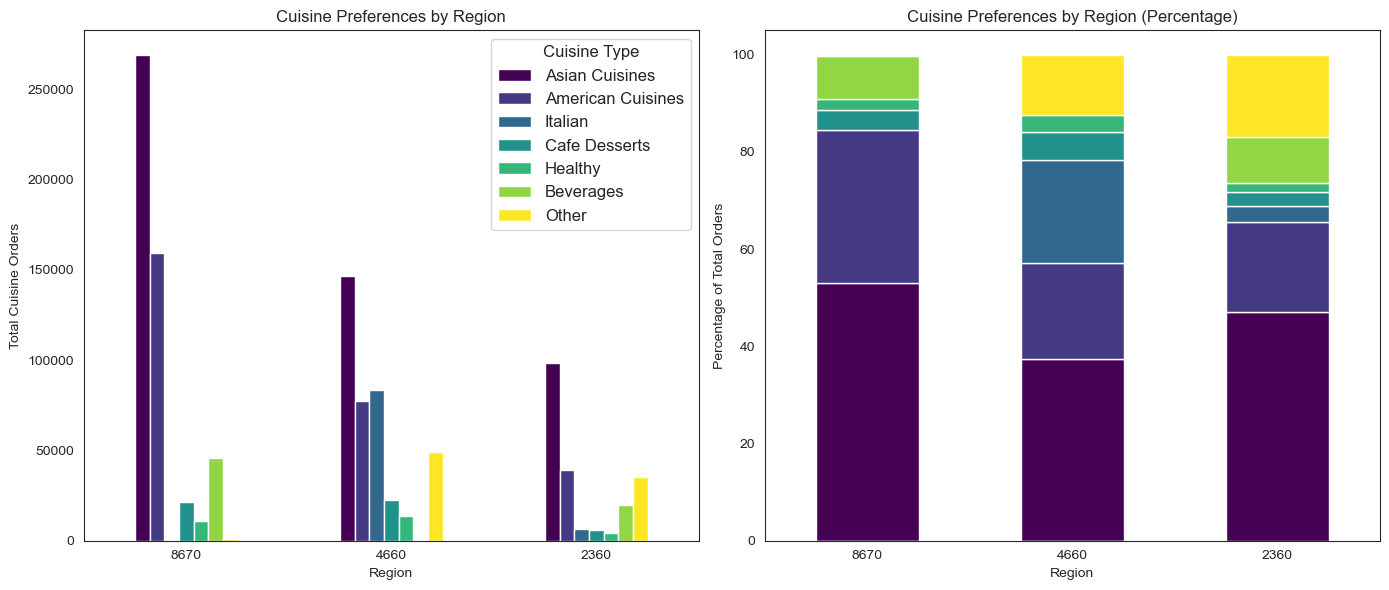

In [65]:
cuisine_per_region = df.groupby('customer_region')[cuisines_aggregated].sum()

cuisine_per_region.columns = [cuisine_replacement_updated.get(cuisine, cuisine.replace('CUI_', '')) 
                              for cuisine in cuisine_per_region.columns]

cuisine_percentage = cuisine_per_region.div(cuisine_per_region.sum(axis=1), axis=0) * 100

top_regions = cuisine_per_region.sum(axis=1).sort_values(ascending=False).head(3).index
cuisine_per_region = cuisine_per_region.loc[top_regions]
cuisine_percentage = cuisine_percentage.loc[top_regions]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

cuisine_per_region.plot(kind='bar', ax=axes[0], colormap='viridis', title='Cuisine Preferences by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Total Cuisine Orders')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Cuisine Type', fontsize=12, title_fontsize=12)

cuisine_percentage.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis', title='Cuisine Preferences by Region (Percentage)')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Percentage of Total Orders')
axes[1].legend().remove()
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


### Vendor Count and Cuisine Type Across Regions
The first plot displays the average number of vendors available for each cuisine type, segmented by customer regions.
The second plot illustrates the proportion of the total vendor count for each cuisine type, represented as percentages.

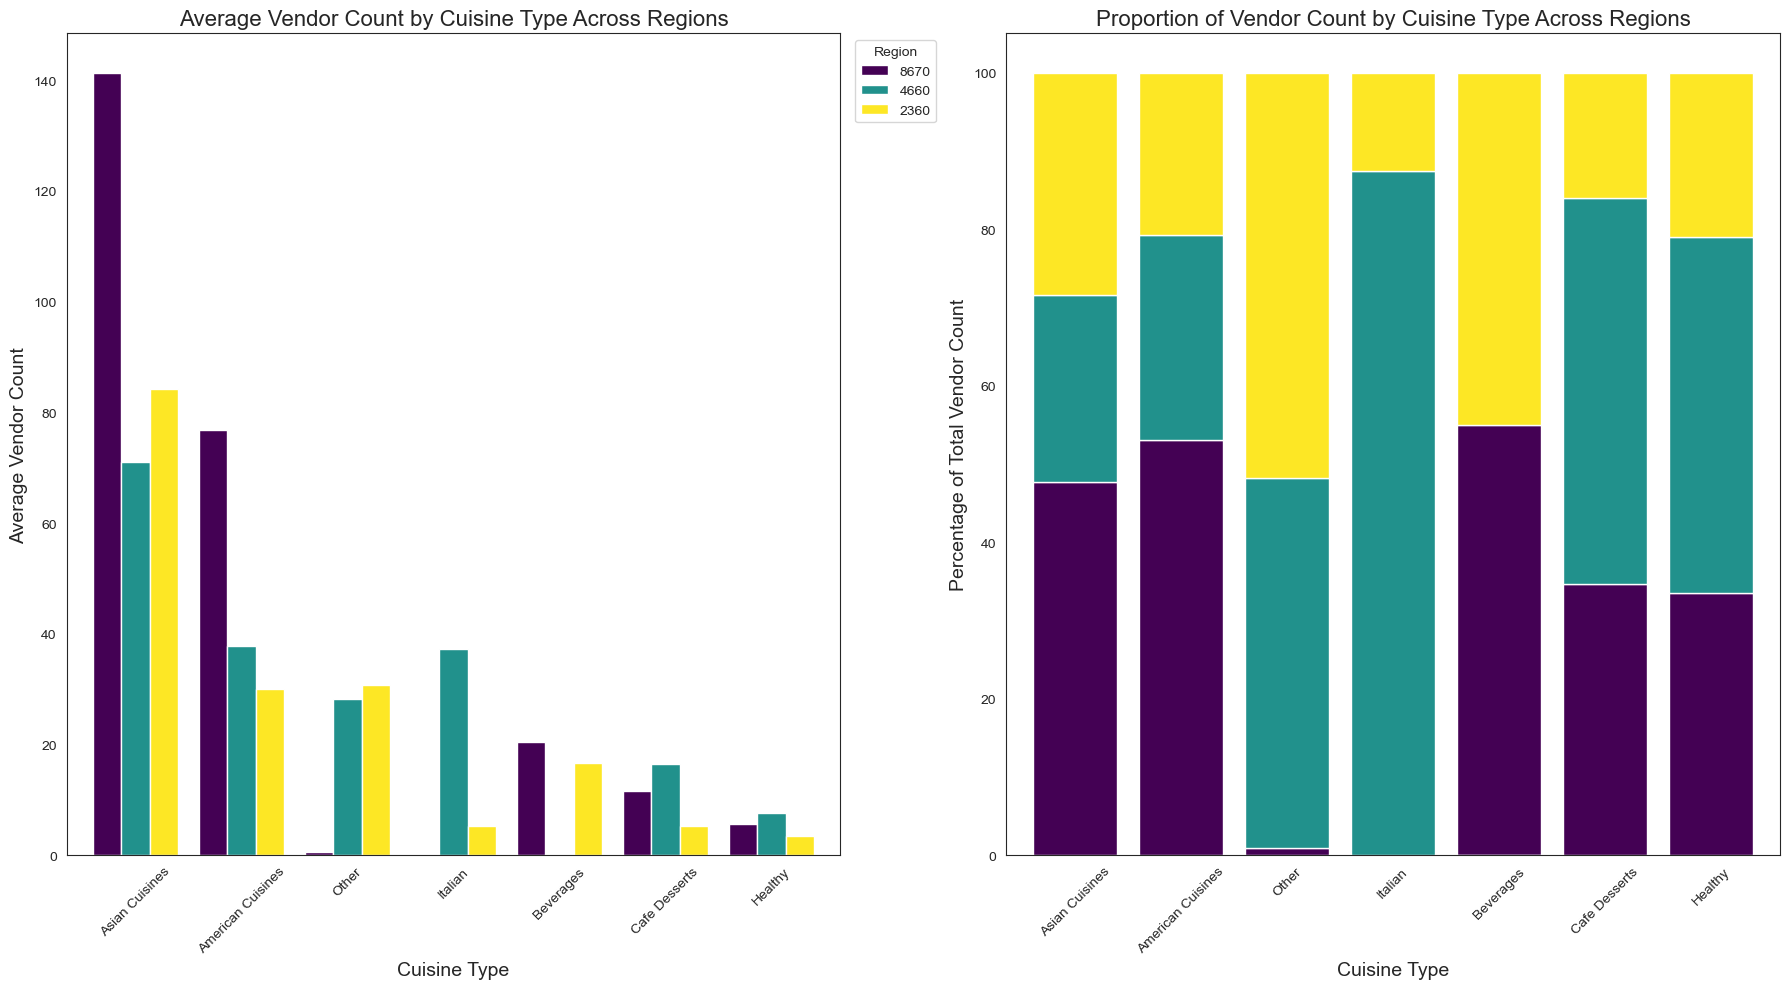

In [66]:
multiplied_data = df[cuisines_aggregated].multiply(df['vendor_count'], axis=0)

multiplied_data['customer_region'] = df['customer_region']

grouped_data = multiplied_data.groupby('customer_region').mean()

grouped_data = grouped_data.loc[top_regions]

grouped_data_proportion = grouped_data.div(grouped_data.sum(axis=0), axis=1) * 100 

grouped_data = grouped_data.transpose()
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

grouped_data_proportion = grouped_data_proportion.transpose()
grouped_data_proportion = grouped_data_proportion.loc[grouped_data.index]  

grouped_data.index = [cuisine_replacement_updated.get(cuisine, cuisine.replace('CUI_', '')) 
                      for cuisine in grouped_data.index]
grouped_data_proportion.index = grouped_data.index  

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

grouped_data.plot(kind='bar', ax=axes[0], colormap='viridis', width=0.8)


axes[0].set_title('Average Vendor Count by Cuisine Type Across Regions', fontsize=16)
axes[0].set_xlabel('Cuisine Type', fontsize=14)
axes[0].set_ylabel('Average Vendor Count', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Region', bbox_to_anchor=(1.01, 1), loc='upper left')

grouped_data_proportion.plot(kind='bar', ax=axes[1], colormap='viridis', width=0.8, stacked=True)
axes[1].set_title('Proportion of Vendor Count by Cuisine Type Across Regions', fontsize=16)
axes[1].set_xlabel('Cuisine Type', fontsize=14)
axes[1].set_ylabel('Percentage of Total Vendor Count', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().remove()

plt.tight_layout()
plt.show()

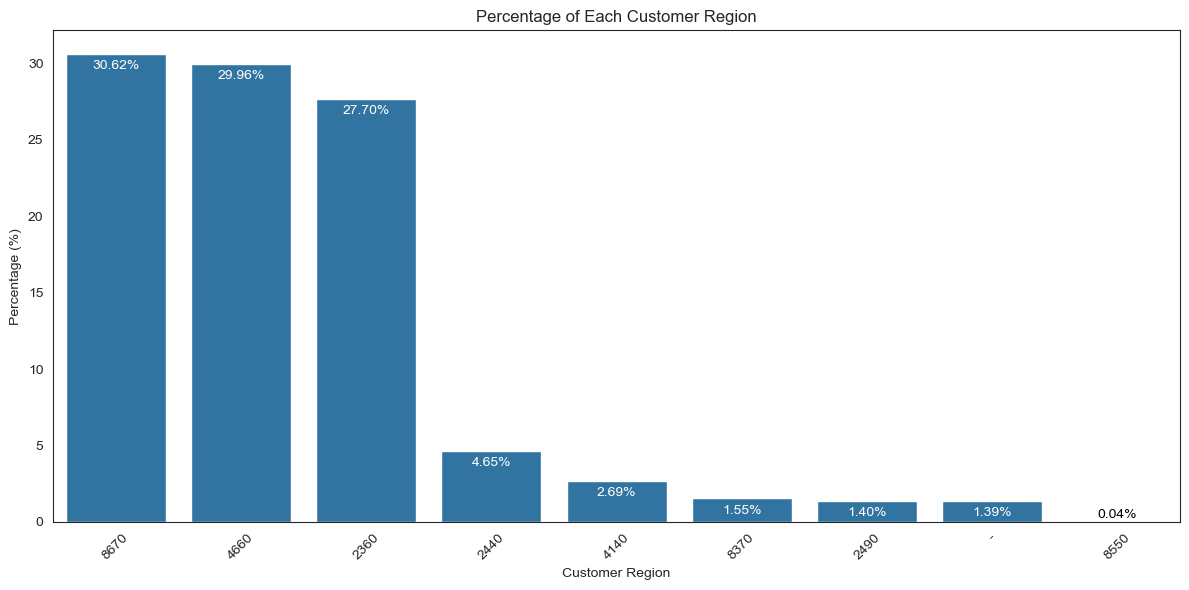

In [67]:
region_counts = df['customer_region'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)

for i, (region, value) in enumerate(zip(region_counts.index, region_counts.values)):
    if value < 1: 
        text_color = 'black'
        text_y_position = value  
    else:
        text_color = 'white'
        text_y_position = value - 1.2 

    plt.text(i, text_y_position, f'{value:.2f}%', ha='center', va='bottom', fontsize=10, color=text_color)

# Customize the plot
plt.title('Percentage of Each Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### Promotions by Payment Method
The first chart shows the count of promotions used by different payment methods, illustrating customer preferences. The second chart displays the percentage of promotions by payment method, highlighting the relative popularity of each promotion type. 

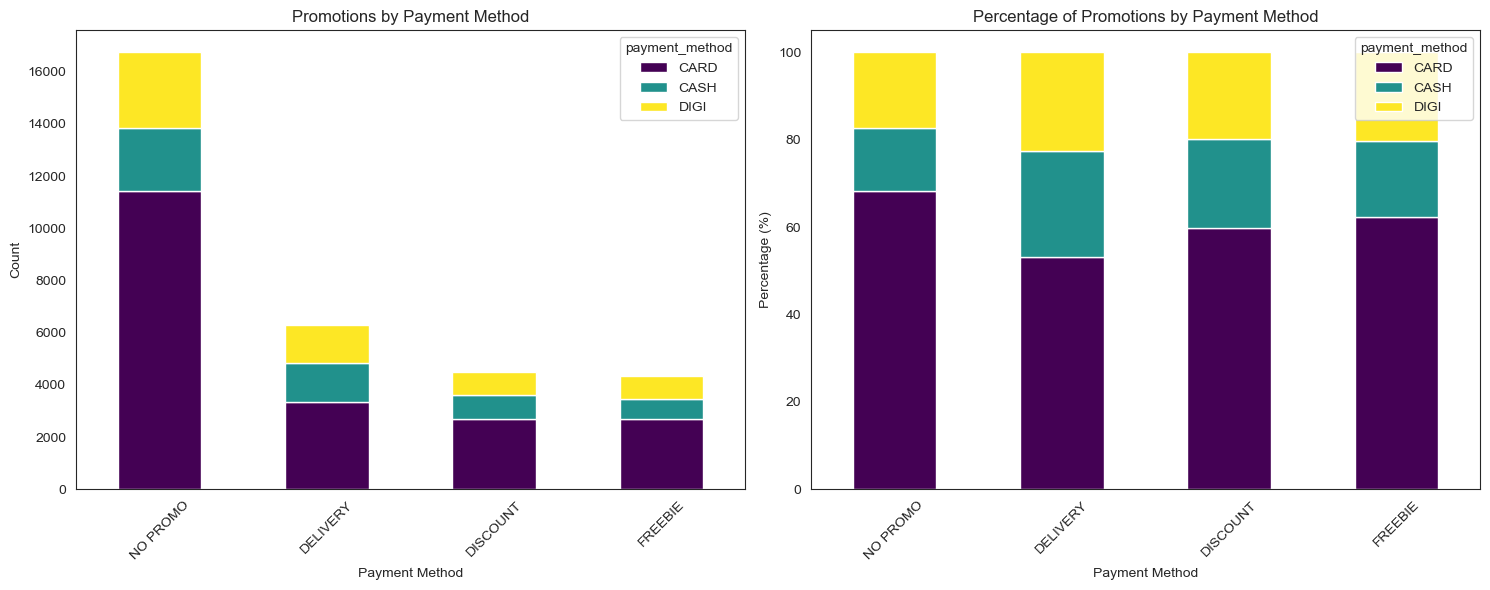

In [68]:
df['last_promo'] = df['last_promo'].replace('-', 'NO PROMO')

payment_promo_counts = df.groupby(['last_promo', 'payment_method']).size().unstack(fill_value=0)
payment_promo_counts['Total'] = payment_promo_counts.sum(axis=1)  # Add a column for total counts
payment_promo_counts = payment_promo_counts.sort_values(by='Total', ascending=False).drop(columns='Total')  # Sort by total and remove the column

fig, ax1 = plt.subplots(1, 2, figsize=(15, 6))


payment_promo_counts.plot(kind='bar', stacked=True, ax=ax1[0], colormap='viridis')
ax1[0].set_title('Promotions by Payment Method')
ax1[0].set_xlabel('Payment Method')
ax1[0].set_ylabel('Count')
ax1[0].set_xticks(range(len(payment_promo_counts.index)))
ax1[0].set_xticklabels(payment_promo_counts.index, rotation=45)

payment_promo_percentage = payment_promo_counts.div(payment_promo_counts.sum(axis=1), axis=0) * 100
payment_promo_percentage.plot(kind='bar', stacked=True, ax=ax1[1], colormap='viridis')
ax1[1].set_title('Percentage of Promotions by Payment Method')
ax1[1].set_xlabel('Payment Method')
ax1[1].set_ylabel('Percentage (%)')
ax1[1].set_xticks(range(len(payment_promo_counts.index)))
ax1[1].set_xticklabels(payment_promo_counts.index, rotation=45)

plt.tight_layout()
plt.show()

### Orders made with promotion and with no promotion

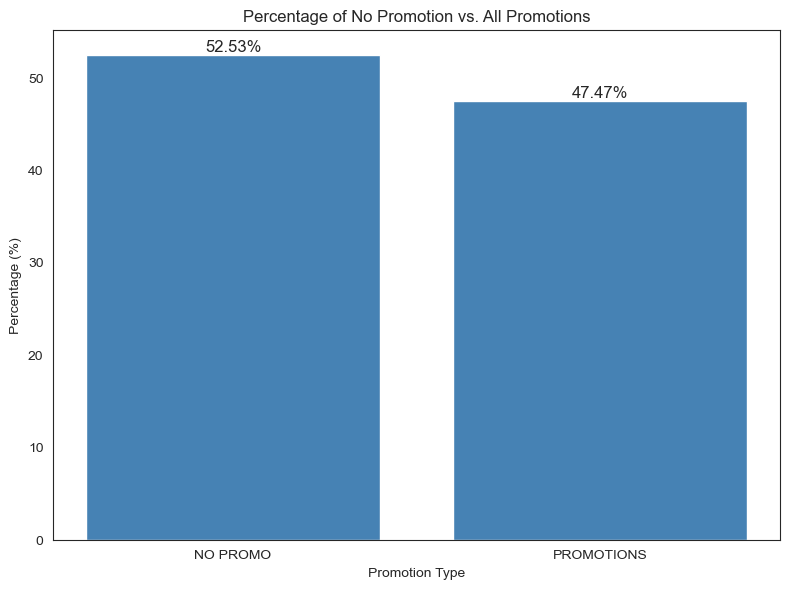

In [69]:
df['last_promo'] = df['last_promo'].replace('-', 'NO PROMO')

promo_counts = df['last_promo'].value_counts()

no_promo_count = promo_counts['NO PROMO']
total_promo_count = promo_counts.drop('NO PROMO').sum()

total_count = no_promo_count + total_promo_count

no_promo_percentage = (no_promo_count / total_count) * 100
total_promo_percentage = (total_promo_count / total_count) * 100

fig, ax = plt.subplots(figsize=(8, 6))

common_color = 'steelblue'

ax.bar('NO PROMO', no_promo_percentage, color=common_color)
ax.bar('PROMOTIONS', total_promo_percentage, color=common_color)

ax.text('NO PROMO', no_promo_percentage, f'{no_promo_percentage:.2f}%', ha='center', va='bottom', fontsize=12)
ax.text('PROMOTIONS', total_promo_percentage, f'{total_promo_percentage:.2f}%', ha='center', va='bottom', fontsize=12)

ax.set_title('Percentage of No Promotion vs. All Promotions')
ax.set_xlabel('Promotion Type')
ax.set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()


### Correlation Matrix of Cuisine Types
This heatmap illustrates the correlation between different cuisine types in the dataset. Each cell displays the correlation coefficient, indicating how strongly pairs of cuisines are related to each other.

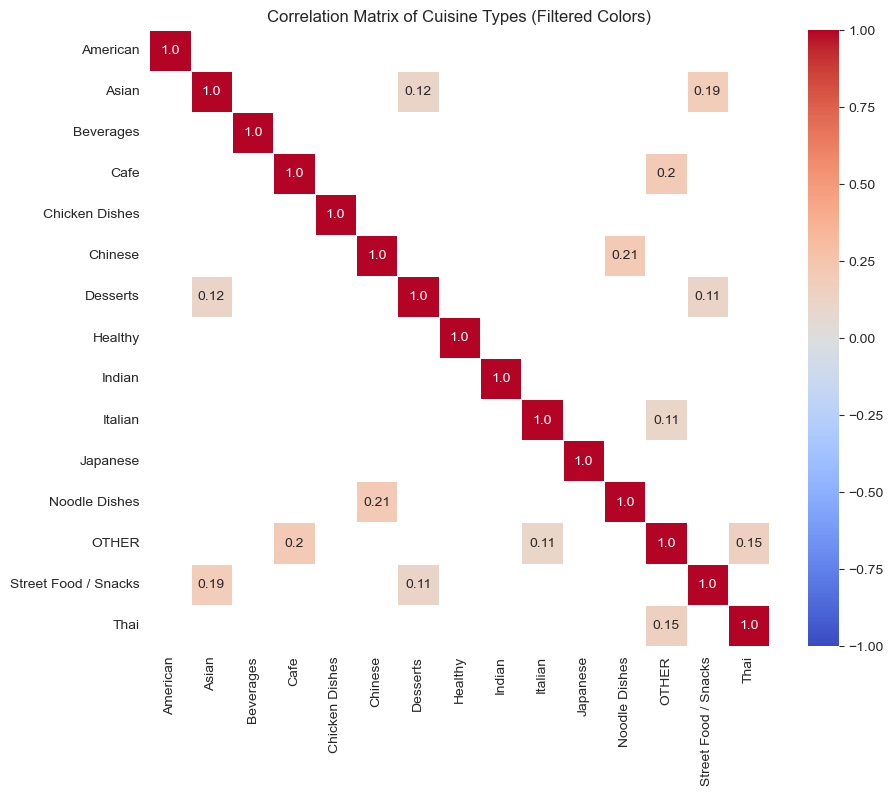

In [70]:
cuisine_data = df[[col for col in df.columns if col.startswith('CUI_')]]
cuisine_data.columns = [col.replace('CUI_', '') for col in cuisine_data.columns]

correlation_matrix = cuisine_data.corr()

mask_below_threshold = np.abs(correlation_matrix) < 0.1
annot = np.where(~mask_below_threshold, correlation_matrix.round(2), "")  

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask_below_threshold, annot=annot, cmap='coolwarm', fmt="", 
            linewidths=0.5, cbar=True, vmin=-1, vmax=1, edgecolor='black')
plt.title("Correlation Matrix of Cuisine Types (Filtered Colors)")
plt.show()

## RFM Analysis
RFM is a marketing analysis tool that segments the customers according to the recency of their purchases (last_order), the frequency (DOW_all) and the money spent (cuisine_all)
### Recency
This histogram depicts the distribution of customer recency, measured in days using the last order column. Customers are categorized into three terciles: "Least Recent", "Recent", and "Most Recent".


  Recency Category    Range  Number of Customers
0     Least Recent   0 - 58                10591
1           Recent  58 - 80                10898
2      Most Recent  80 - 90                10248


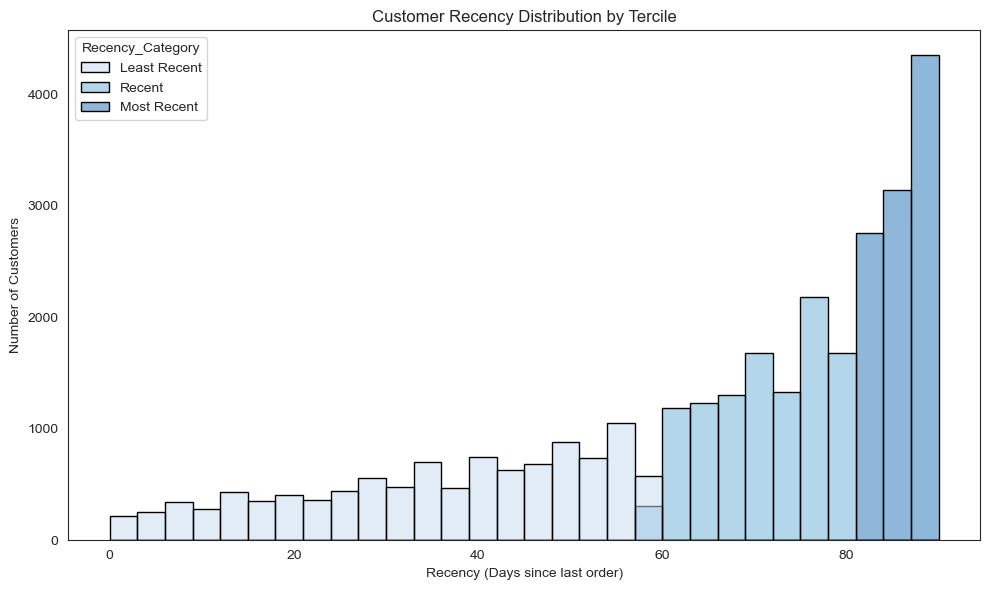

In [71]:
df_non_zero = df[df['cuisine_all'] > 0].copy()

df_non_zero['Recency'] = df_non_zero['last_order']  
df_non_zero['Recency_Category'] = pd.qcut(df_non_zero['Recency'], q=3, labels=['Least Recent', 'Recent', 'Most Recent']) 

recency_counts = df_non_zero['Recency_Category'].value_counts().reindex(['Least Recent', 'Recent', 'Most Recent'])

recency_tercile_limits = df_non_zero['Recency'].quantile([0, 1/3, 2/3, 1]).values

recency_terciles = pd.DataFrame({
    'Recency Category': ['Least Recent', 'Recent', 'Most Recent'],  
    'Range': [f"{recency_tercile_limits[0]:.0f} - {recency_tercile_limits[1]:.0f}", 
              f"{recency_tercile_limits[1]:.0f} - {recency_tercile_limits[2]:.0f}", 
              f"{recency_tercile_limits[2]:.0f} - {recency_tercile_limits[3]:.0f}"],  
    'Number of Customers': recency_counts.values  
})

print(recency_terciles)

fig, ax = plt.subplots(figsize=(10, 6))  
sns.histplot(data=df_non_zero, x='Recency', hue='Recency_Category', bins=30, kde=False, palette='Blues', edgecolor='black', ax=ax) 
ax.set_title('Customer Recency Distribution by Tercile') 
ax.set_xlabel('Recency (Days since last order)')  
ax.set_ylabel('Number of Customers')  
plt.tight_layout() 
plt.show() 

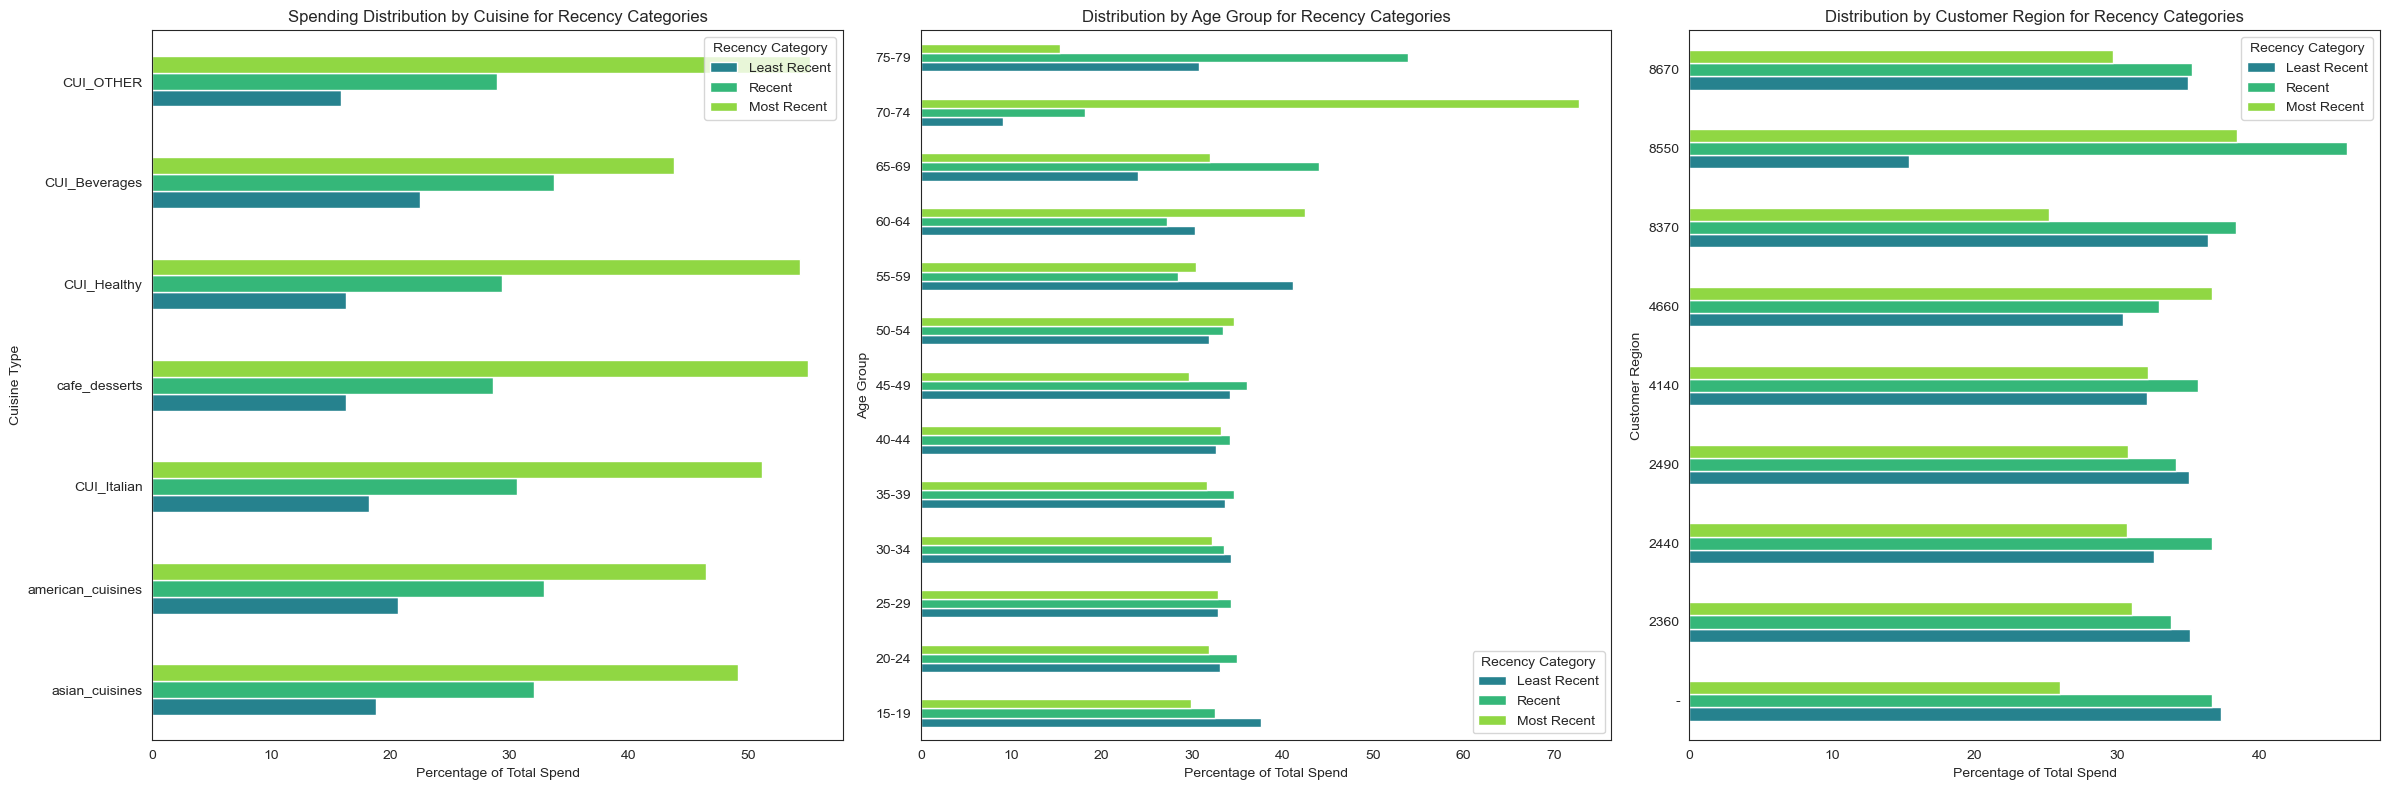

In [72]:
terciles = df['last_order'].quantile([0, 1/3, 2/3, 1]).values
df['recency_category'] = pd.qcut(df['last_order'], q=3, labels=['Least Recent', 'Recent', 'Most Recent'])

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

recency_by_cuisine = df.groupby('recency_category', observed = False)[cuisines_aggregated].sum().T
recency_by_cuisine = recency_by_cuisine.div(recency_by_cuisine.sum(axis=1), axis=0) * 100

recency_by_cuisine.plot(kind='barh', ax=axs[0], color=['#26828e', '#35b779', '#90d743'])
axs[0].set_title('Spending Distribution by Cuisine for Recency Categories')
axs[0].set_xlabel('Percentage of Total Spend')
axs[0].set_ylabel('Cuisine Type')
axs[0].legend(title='Recency Category', labels=['Least Recent', 'Recent', 'Most Recent'])

recency_by_age = df.groupby(['recency_category', 'age_bins'], observed=False).size().unstack().fillna(0)
recency_by_age = recency_by_age.div(recency_by_age.sum(axis=0), axis=1) * 100

recency_by_age.T.plot(kind='barh', ax=axs[1], color=['#26828e', '#35b779', '#90d743'])
axs[1].set_title('Distribution by Age Group for Recency Categories')
axs[1].set_xlabel('Percentage of Total Spend')
axs[1].set_ylabel('Age Group')
axs[1].legend(title='Recency Category', labels=['Least Recent', 'Recent', 'Most Recent'])

recency_by_region = df.groupby(['recency_category', 'customer_region'], observed=False).size().unstack().fillna(0)
recency_by_region = recency_by_region.div(recency_by_region.sum(axis=0), axis=1) * 100

recency_by_region.T.plot(kind='barh', ax=axs[2], color=['#26828e', '#35b779', '#90d743'])
axs[2].set_title('Distribution by Customer Region for Recency Categories')
axs[2].set_xlabel('Percentage of Total Spend')
axs[2].set_ylabel('Customer Region')
axs[2].legend(title='Recency Category', labels=['Least Recent', 'Recent', 'Most Recent'])

plt.tight_layout()
plt.show()

### Frequency
This bar chart presents the frequency of customer orders categorized into three levels: "Low Frequency", "Medium Frequency", and "High Frequency". Each category represents the number of customers based on their ordering frequency.

  Frequency Category   Range  Number of Customers
0      Low Frequency   1 - 2                14122
1   Medium Frequency   2 - 4                 8265
2     High Frequency  4 - 94                 9350


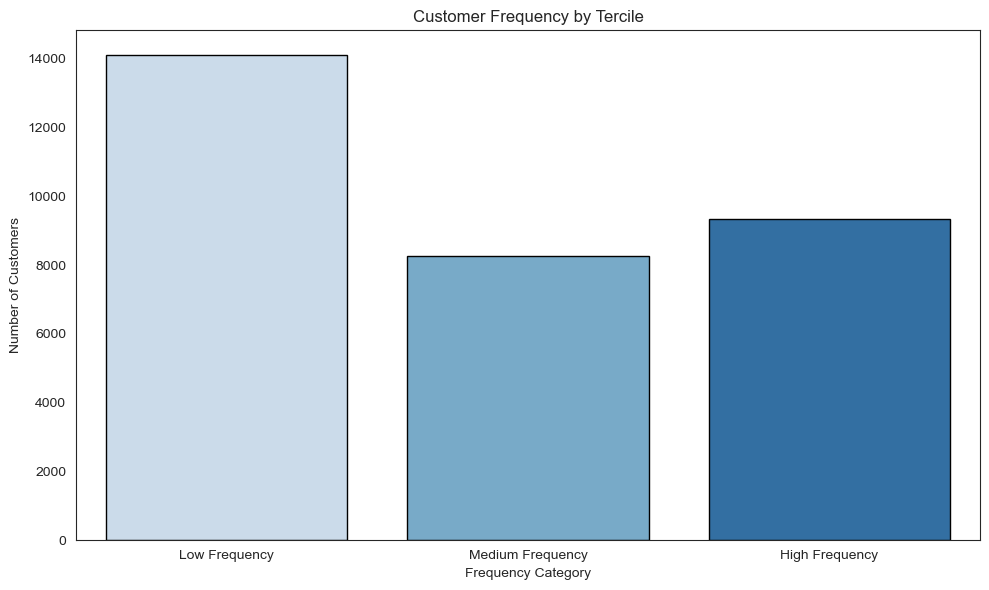

In [73]:
df_non_zero['Frequency_Category'] = pd.qcut(df_non_zero['DOW_all'], q=3, labels=['Low Frequency', 'Medium Frequency', 'High Frequency'])

frequency_counts = df_non_zero['Frequency_Category'].value_counts().reindex(['Low Frequency', 'Medium Frequency', 'High Frequency'])

tercile_limits = df_non_zero['DOW_all'].quantile([0, 1/3, 2/3, 1]).values
frequency_terciles = pd.DataFrame({
    'Frequency Category': ['Low Frequency', 'Medium Frequency', 'High Frequency'],
    'Range': [f"{tercile_limits[0]:.0f} - {tercile_limits[1]:.0f}",
              f"{tercile_limits[1]:.0f} - {tercile_limits[2]:.0f}",
              f"{tercile_limits[2]:.0f} - {tercile_limits[3]:.0f}"],
    'Number of Customers': frequency_counts.values
})

print(frequency_terciles)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=frequency_counts.index, y=frequency_counts.values, hue=frequency_counts.index, palette='Blues', edgecolor='black', ax=ax, legend=False)
ax.set_title('Customer Frequency by Tercile')
ax.set_xlabel('Frequency Category')
ax.set_ylabel('Number of Customers')
plt.tight_layout()
plt.show()

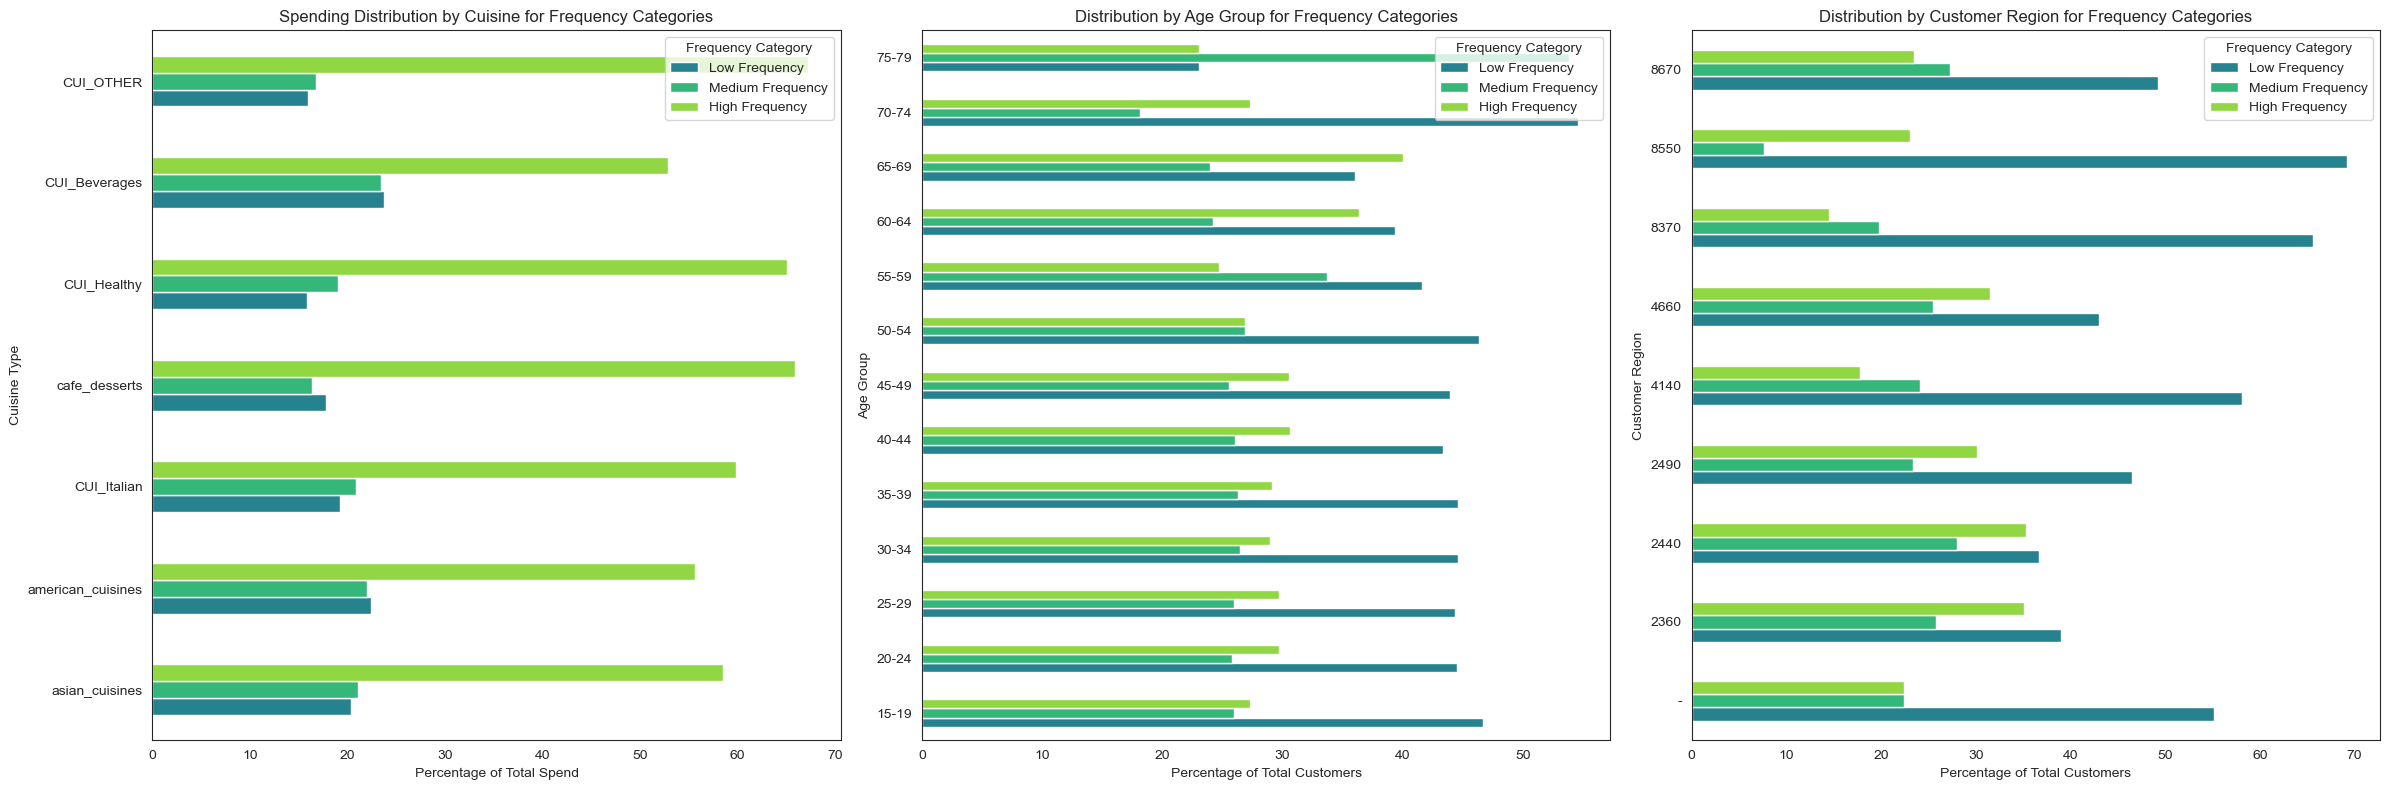

In [74]:
terciles = df_non_zero['DOW_all'].quantile([0, 1/3, 2/3, 1]).values
df_non_zero['Frequency_Category'] = pd.qcut(df_non_zero['DOW_all'], q=3, labels=['Low Frequency', 'Medium Frequency', 'High Frequency'])

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

frequency_by_cuisine = df_non_zero.groupby('Frequency_Category', observed=False)[cuisines_aggregated].sum().T
frequency_by_cuisine = frequency_by_cuisine.div(frequency_by_cuisine.sum(axis=1), axis=0) * 100

frequency_by_cuisine.plot(kind='barh', ax=axs[0], color=['#26828e', '#35b779', '#90d743'])
axs[0].set_title('Spending Distribution by Cuisine for Frequency Categories')
axs[0].set_xlabel('Percentage of Total Spend')
axs[0].set_ylabel('Cuisine Type')
axs[0].legend(title='Frequency Category', labels=['Low Frequency', 'Medium Frequency', 'High Frequency'])

frequency_by_age = df_non_zero.groupby(['Frequency_Category', 'age_bins'], observed=False).size().unstack().fillna(0)
frequency_by_age = frequency_by_age.div(frequency_by_age.sum(axis=0), axis=1) * 100

frequency_by_age.T.plot(kind='barh', ax=axs[1], color=['#26828e', '#35b779', '#90d743'])
axs[1].set_title('Distribution by Age Group for Frequency Categories')
axs[1].set_xlabel('Percentage of Total Customers')
axs[1].set_ylabel('Age Group')
axs[1].legend(title='Frequency Category', labels=['Low Frequency', 'Medium Frequency', 'High Frequency'])

frequency_by_region = df_non_zero.groupby(['Frequency_Category', 'customer_region'], observed=False).size().unstack().fillna(0)
frequency_by_region = frequency_by_region.div(frequency_by_region.sum(axis=0), axis=1) * 100

frequency_by_region.T.plot(kind='barh', ax=axs[2], color=['#26828e', '#35b779', '#90d743'])
axs[2].set_title('Distribution by Customer Region for Frequency Categories')
axs[2].set_xlabel('Percentage of Total Customers')
axs[2].set_ylabel('Customer Region')
axs[2].legend(title='Frequency Category', labels=['Low Frequency', 'Medium Frequency', 'High Frequency'])

plt.tight_layout()
plt.show()


### Monetary - Total Customers by Spending Category

We decided to classify customers according to their spending levels to better understanding their purchasing behavior and to enable more targeted marketing strategies. Although the maximum expenditure is approximately 1418, the graph only displays values up to 300, as there are very few customers beyond that value, making the corresponding bars less visible. Additionally, we excluded zero spending from the graph, as these represent errors.

Customers were classified based on values closest to the quantiles. The first quantile is 17.09, which we rounded up to 20 for simpler interpretation of the spending categories. The second quantile is approximately 35.87, and we chose 50 to create a clearer distinction, especially considering the presence of outliers in the data.

   Spend_Category   Interval  Number_of_Customers
0     Low Spender    [0, 20)                13654
1  Medium Spender   [20, 50)                11102
2    High Spender  [50, inf)                 6981


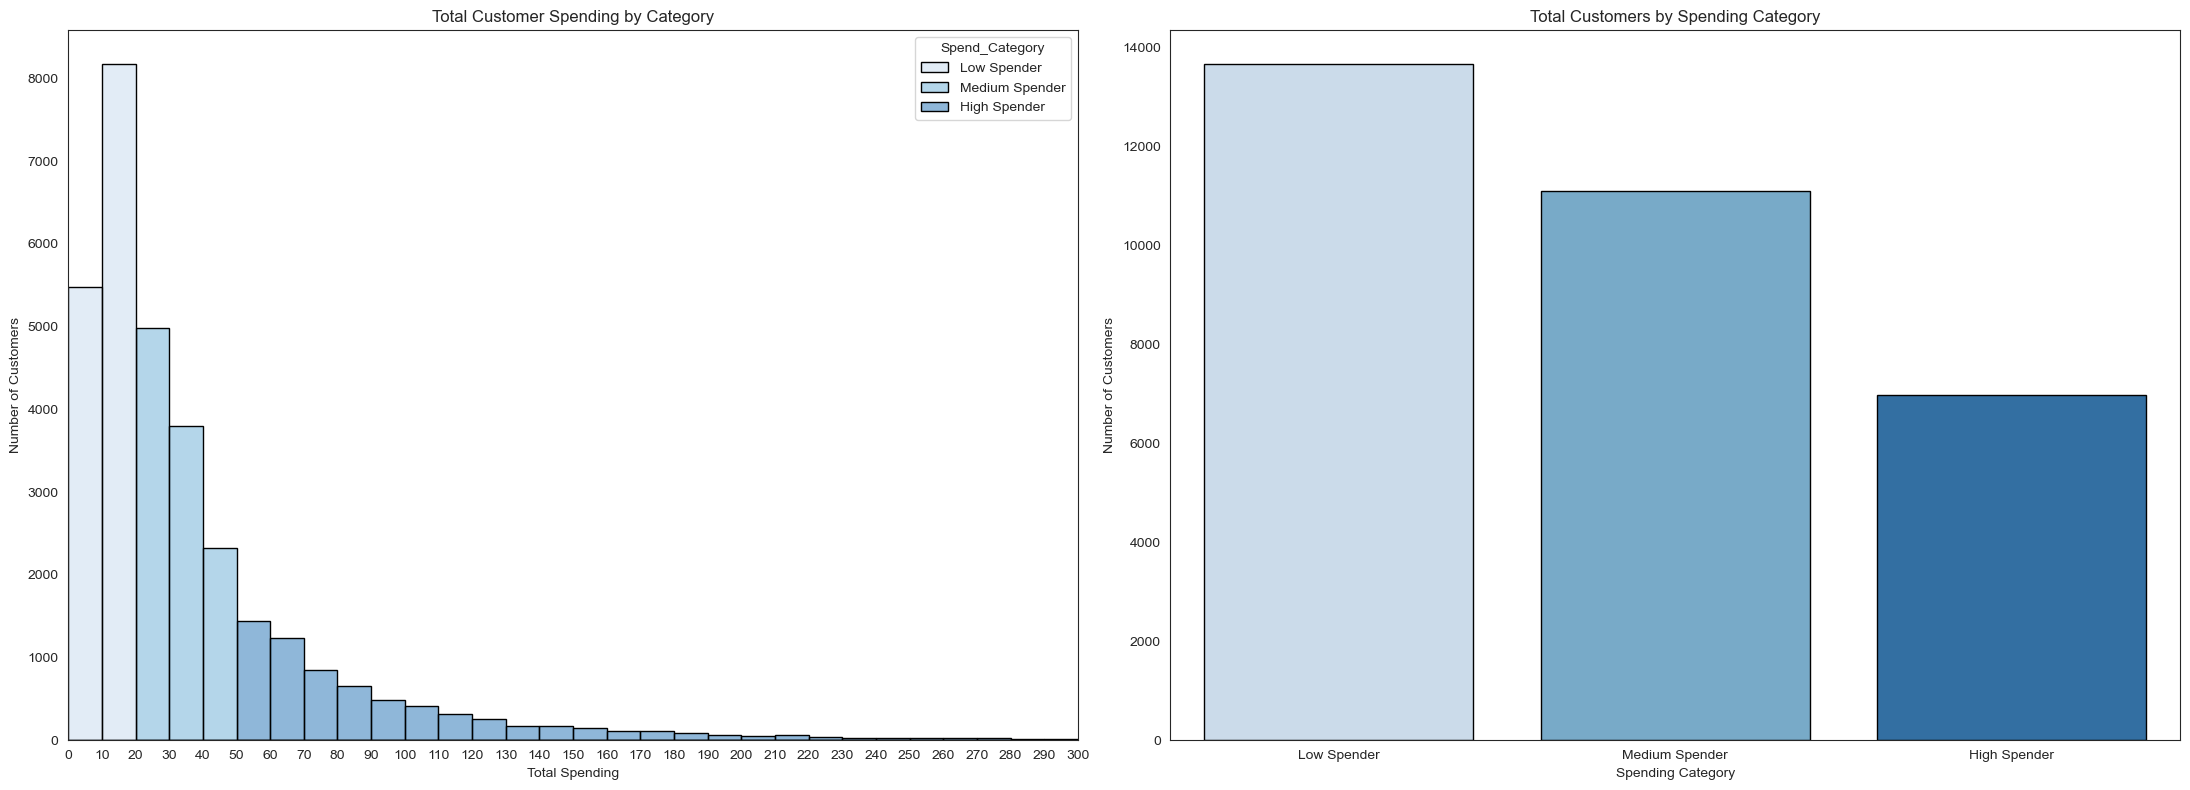

In [75]:
bins = [0, 20, 50, float('inf')]
labels = ['Low Spender', 'Medium Spender', 'High Spender']
df_non_zero['Spend_Category'] = pd.cut(df_non_zero['cuisine_all'], bins=bins, labels=labels, right=False)

spend_category_counts = df_non_zero['Spend_Category'].value_counts().reindex(labels)
spend_data = spend_category_counts.reset_index()
spend_data.columns = ['Spend_Category', 'Number_of_Customers']

spend_data['Interval'] = [f"[{bins[i]}, {bins[i+1]})" for i in range(len(bins)-1)]
spend_data = spend_data[['Spend_Category', 'Interval', 'Number_of_Customers']]

print(spend_data)

fig, axes = plt.subplots(1, 2, figsize=(22, 8))

bins_hist = list(range(0, 310, 10))
sns.histplot(data=df_non_zero, x='cuisine_all', hue='Spend_Category', bins=bins_hist, kde=False, 
             stat="count", palette='Blues', edgecolor='black', ax=axes[0])

axes[0].set_xlim(0, 300)
axes[0].set_title('Total Customer Spending by Category')
axes[0].set_xlabel('Total Spending')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xticks(bins_hist)
axes[0].grid(False)

sns.barplot(data=spend_data, x='Spend_Category', y='Number_of_Customers', hue='Spend_Category',
            palette='Blues', edgecolor='black', ax=axes[1])
axes[1].set_title('Total Customers by Spending Category')
axes[1].set_xlabel('Spending Category')
axes[1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()



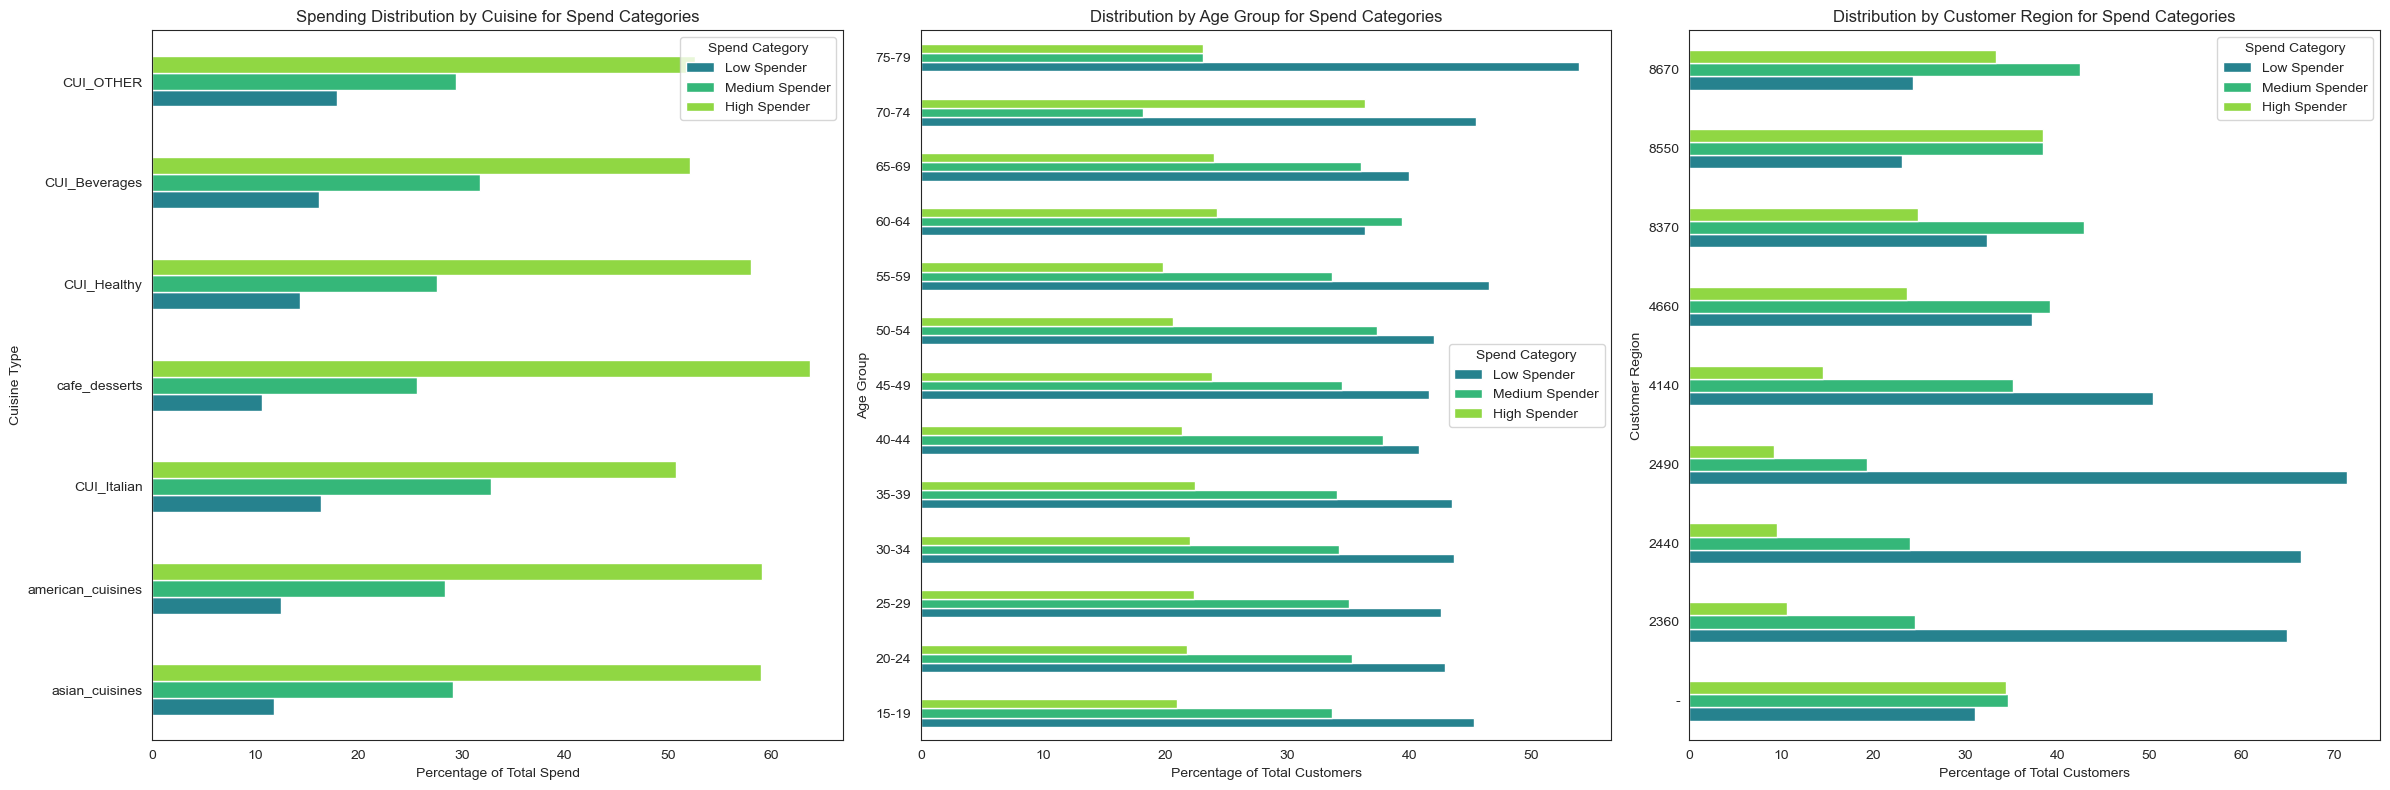

In [76]:
bins = [0, 20, 50, float('inf')]
labels = ['Low Spender', 'Medium Spender', 'High Spender']
df_non_zero['Spend_Category'] = pd.cut(df_non_zero['cuisine_all'], bins=bins, labels=labels, right=False)

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

spend_by_cuisine = df_non_zero.groupby('Spend_Category', observed=False)[cuisines_aggregated].sum().T
spend_by_cuisine = spend_by_cuisine.div(spend_by_cuisine.sum(axis=1), axis=0) * 100

spend_by_cuisine.plot(kind='barh', ax=axs[0], color=['#26828e', '#35b779', '#90d743'])
axs[0].set_title('Spending Distribution by Cuisine for Spend Categories')
axs[0].set_xlabel('Percentage of Total Spend')
axs[0].set_ylabel('Cuisine Type')
axs[0].legend(title='Spend Category', labels=['Low Spender', 'Medium Spender', 'High Spender'])

spend_by_age = df_non_zero.groupby(['Spend_Category', 'age_bins'], observed=False).size().unstack().fillna(0)
spend_by_age = spend_by_age.div(spend_by_age.sum(axis=0), axis=1) * 100

spend_by_age.T.plot(kind='barh', ax=axs[1], color=['#26828e', '#35b779', '#90d743'])
axs[1].set_title('Distribution by Age Group for Spend Categories')
axs[1].set_xlabel('Percentage of Total Customers')
axs[1].set_ylabel('Age Group')
axs[1].legend(title='Spend Category', labels=['Low Spender', 'Medium Spender', 'High Spender'])

spend_by_region = df_non_zero.groupby(['Spend_Category', 'customer_region'], observed=False).size().unstack().fillna(0)
spend_by_region = spend_by_region.div(spend_by_region.sum(axis=0), axis=1) * 100

spend_by_region.T.plot(kind='barh', ax=axs[2], color=['#26828e', '#35b779', '#90d743'])
axs[2].set_title('Distribution by Customer Region for Spend Categories')
axs[2].set_xlabel('Percentage of Total Customers')
axs[2].set_ylabel('Customer Region')
axs[2].legend(title='Spend Category', labels=['Low Spender', 'Medium Spender', 'High Spender'])

plt.tight_layout()
plt.show()

In [77]:
max_spender = df.loc[df['cuisine_all'].idxmax()]

print("Customer with the highest spending:")
max_spender.head(70)

Customer with the highest spending:


customer_id          92ced2dcb9
customer_region            2360
customer_age                 23
vendor_count                 40
product_count               269
                        ...    
cuisine_all             1418.33
asian_cuisines          1201.27
american_cuisines         31.42
cafe_desserts              18.3
repeat_customers           True
Name: 1270, Length: 70, dtype: object